In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-stocks-nift/National_Stock_Exchange_of_India_Ltd.csv


In [3]:
!pip install yfinance pandas numpy matplotlib seaborn statsmodels backtrader pyfolio scikit-learn lightgbm xgboost catboost

Data Collection 

In [14]:
print("📋 Available Columns:")
print(data.columns.tolist())


📋 Available Columns:
['SBIN_Symbol', 'SBIN_Series', 'SBIN_PrevClose', 'SBIN_Open', 'SBIN_High', 'SBIN_Low', 'SBIN_Last', 'SBIN_Close', 'SBIN_VWAP', 'SBIN_Volume', 'SBIN_Turnover', 'SBIN_Trades', 'SBIN_DeliverableVolume', 'SBIN_%Deliverble', 'ICICI_Symbol', 'ICICI_Series', 'ICICI_PrevClose', 'ICICI_Open', 'ICICI_High', 'ICICI_Low', 'ICICI_Last', 'ICICI_Close', 'ICICI_VWAP', 'ICICI_Volume', 'ICICI_Turnover', 'ICICI_Trades', 'ICICI_DeliverableVolume', 'ICICI_%Deliverble']


📋 Columns:
['SBIN_Symbol', 'SBIN_Series', 'SBIN_Prev Close', 'SBIN_Open', 'SBIN_High', 'SBIN_Low', 'SBIN_Last', 'SBIN_Close', 'SBIN_VWAP', 'SBIN_Volume', 'SBIN_Turnover', 'SBIN_Trades', 'SBIN_Deliverable Volume', 'SBIN_%Deliverble', 'ICICI_Symbol', 'ICICI_Series', 'ICICI_Prev Close', 'ICICI_Open', 'ICICI_High', 'ICICI_Low', 'ICICI_Last', 'ICICI_Close', 'ICICI_VWAP', 'ICICI_Volume', 'ICICI_Turnover', 'ICICI_Trades', 'ICICI_Deliverable Volume', 'ICICI_%Deliverble']

📊 Sample Data:
            SBIN_Close  ICICI_Close
Date                               
2011-06-01     2329.20      1084.70
2011-06-02     2334.20      1048.90
2011-06-03     2312.50      1047.40
2011-06-06     2317.15      1058.05
2011-06-07     2320.10      1056.15


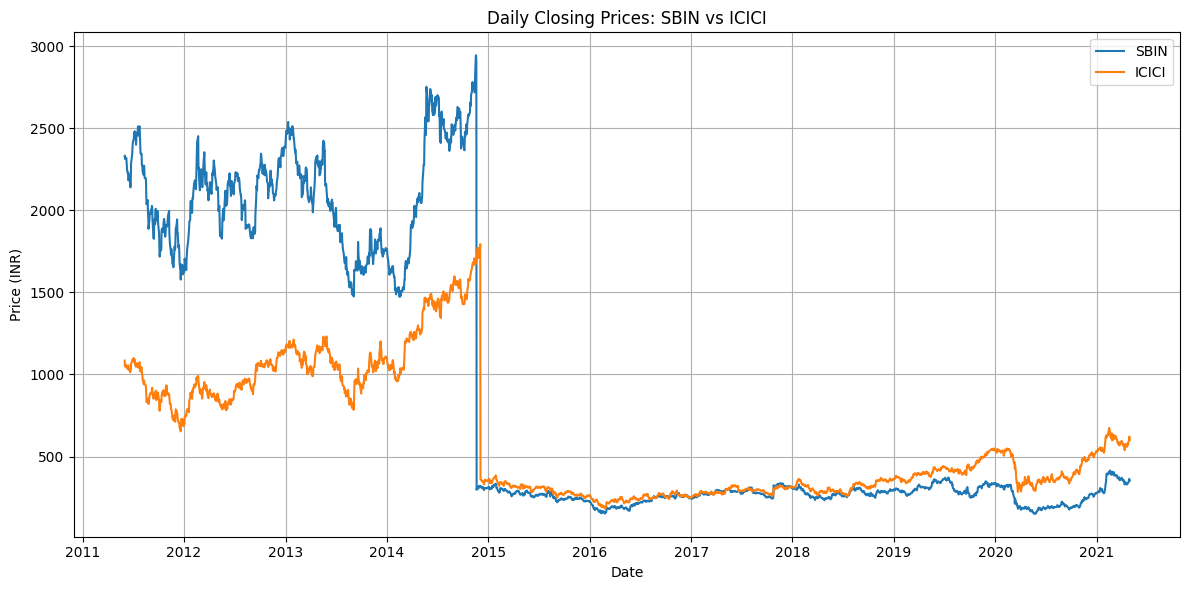

In [15]:

#IMPORTS            
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")


#LOADING STOCK DATA  
sbin = pd.read_csv('/kaggle/input/dataset/SBIN.csv', parse_dates=['Date'], index_col='Date')
icici = pd.read_csv('/kaggle/input/dataset/ICICIBANK.csv', parse_dates=['Date'], index_col='Date')

# Renaming columns to identify stock
sbin.columns = [f"SBIN_{col}" for col in sbin.columns]
icici.columns = [f"ICICI_{col}" for col in icici.columns]

data = pd.merge(sbin, icici, left_index=True, right_index=True, how='inner')
data = data.dropna()

#  merged dataset 
data.to_csv('/kaggle/working/nse_pairs_merged.csv')


#PREVIEW  
print("Columns:")
print(data.columns.tolist())

print("\n Sample Data:")
print(data[['SBIN_Close', 'ICICI_Close']].head())

# Plot 
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['SBIN_Close'], label='SBIN')
plt.plot(data.index, data['ICICI_Close'], label='ICICI')
plt.title('Daily Closing Prices: SBIN vs ICICI')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


EDAs

📊 Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2456 entries, 2011-06-01 to 2021-04-30
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SBIN_Symbol               2456 non-null   object 
 1   SBIN_Series               2456 non-null   object 
 2   SBIN_Prev Close           2456 non-null   float64
 3   SBIN_Open                 2456 non-null   float64
 4   SBIN_High                 2456 non-null   float64
 5   SBIN_Low                  2456 non-null   float64
 6   SBIN_Last                 2456 non-null   float64
 7   SBIN_Close                2456 non-null   float64
 8   SBIN_VWAP                 2456 non-null   float64
 9   SBIN_Volume               2456 non-null   int64  
 10  SBIN_Turnover             2456 non-null   float64
 11  SBIN_Trades               2456 non-null   float64
 12  SBIN_Deliverable Volume   2456 non-null   float64
 13  SBIN_%Deliverble          2456 n

<Figure size 1500x700 with 0 Axes>

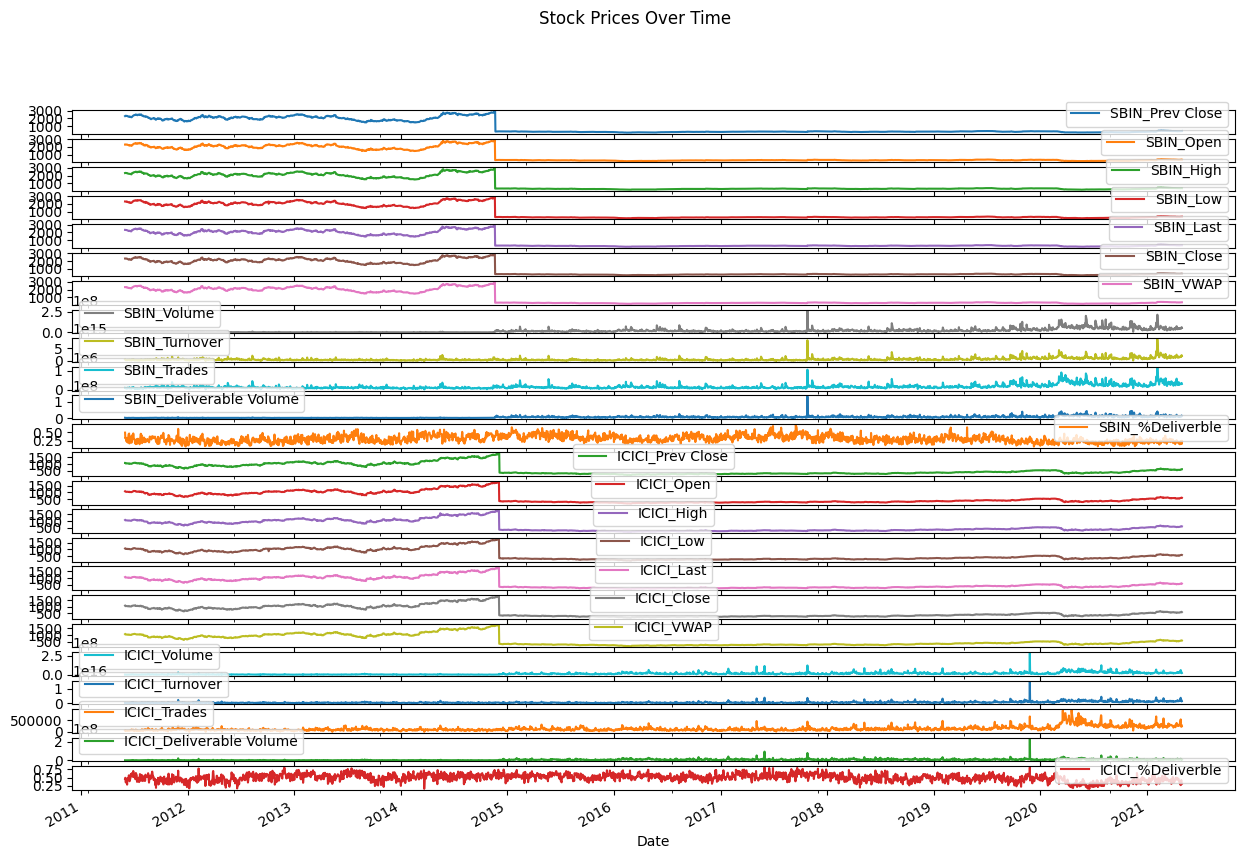

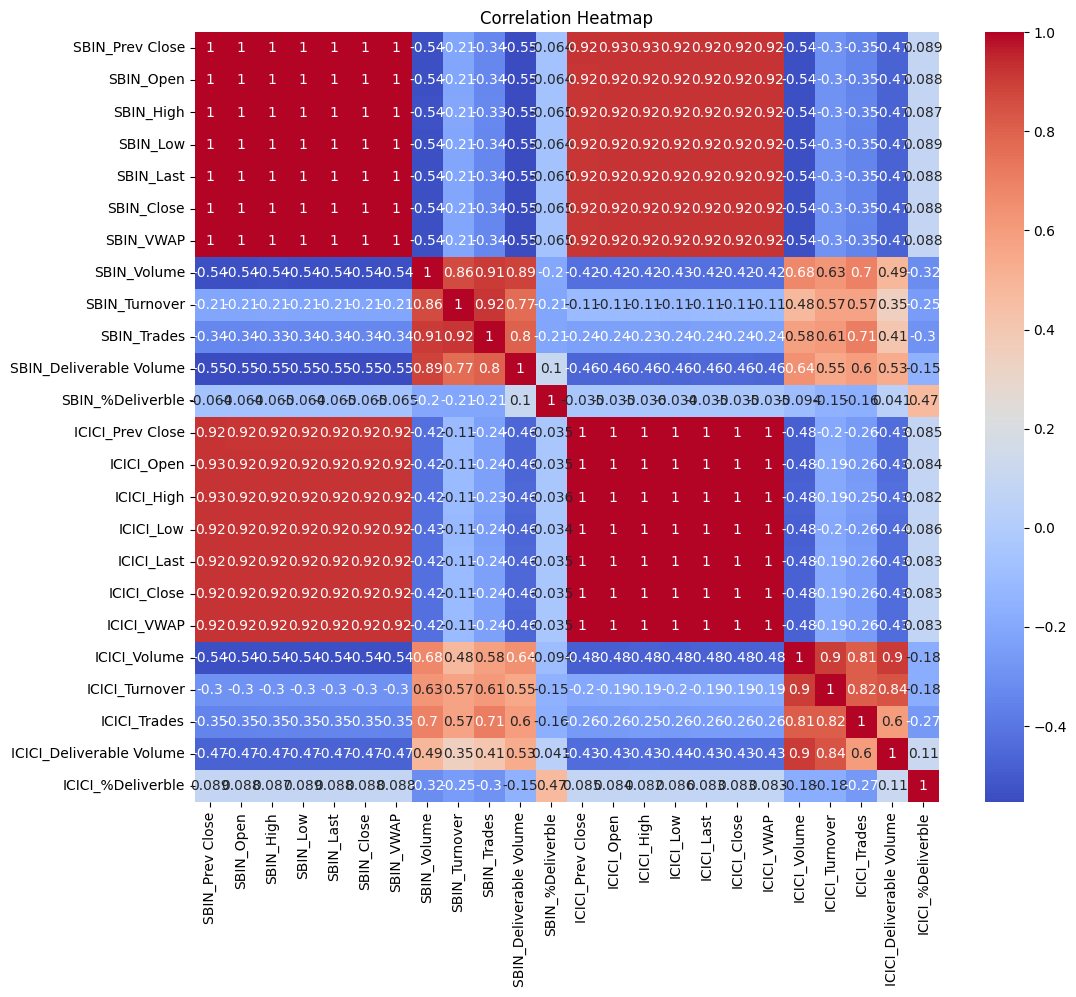

<Figure size 1500x700 with 0 Axes>

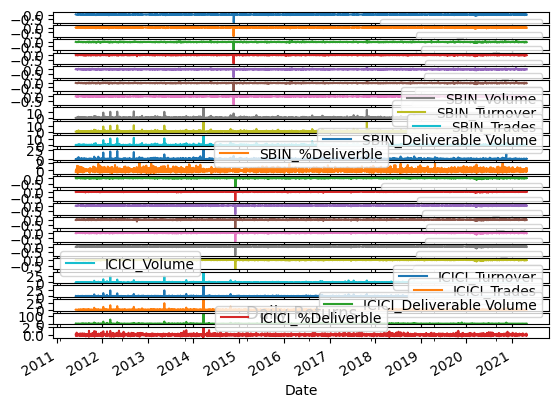

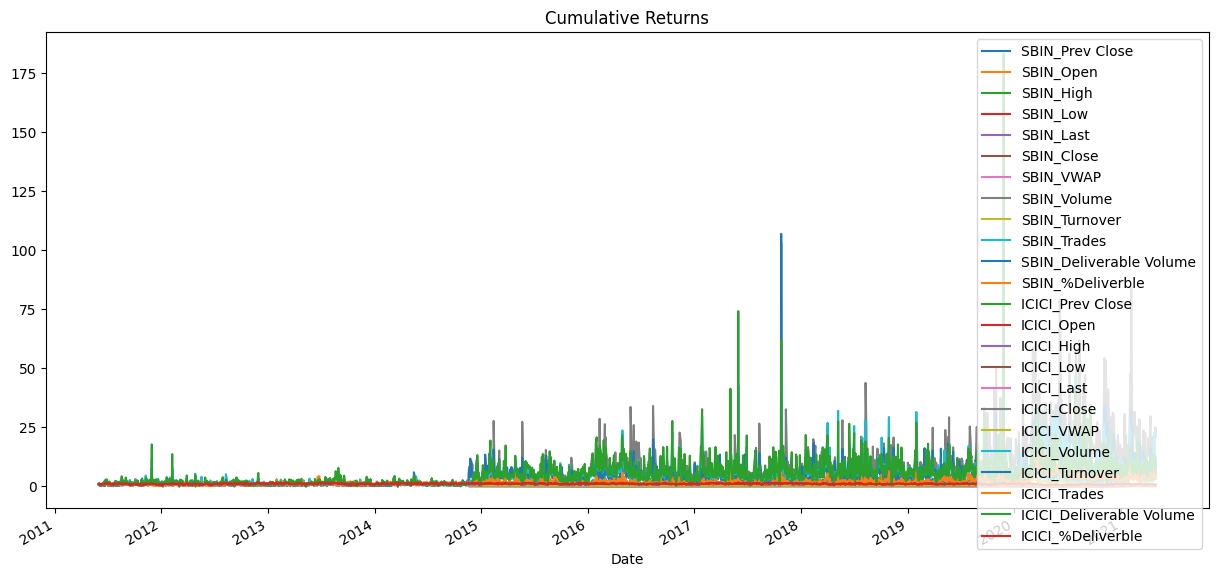

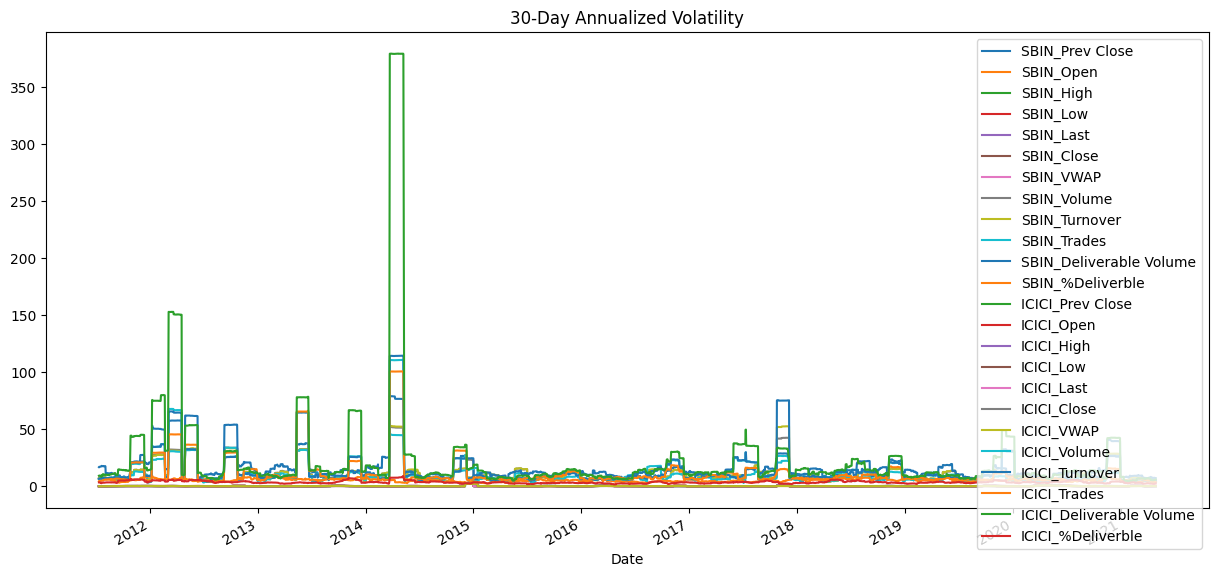

<Figure size 1500x700 with 0 Axes>

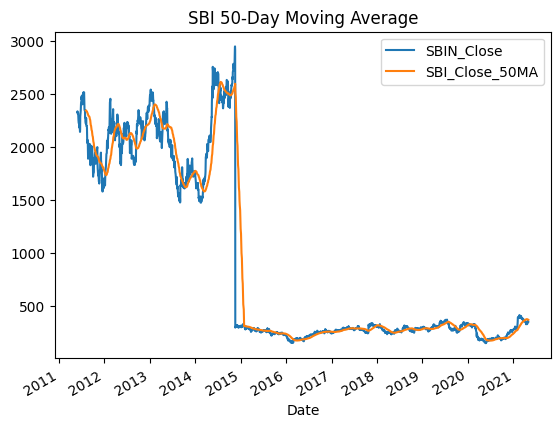

<Figure size 1500x700 with 0 Axes>

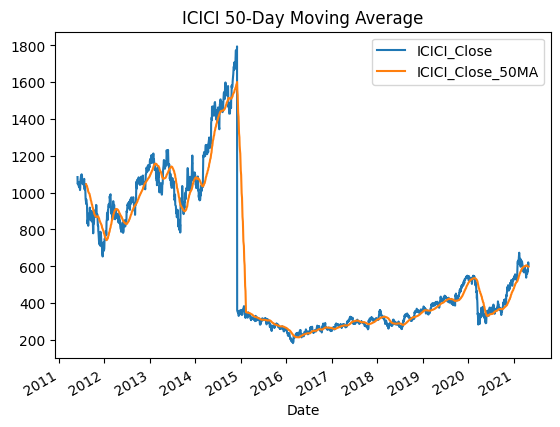

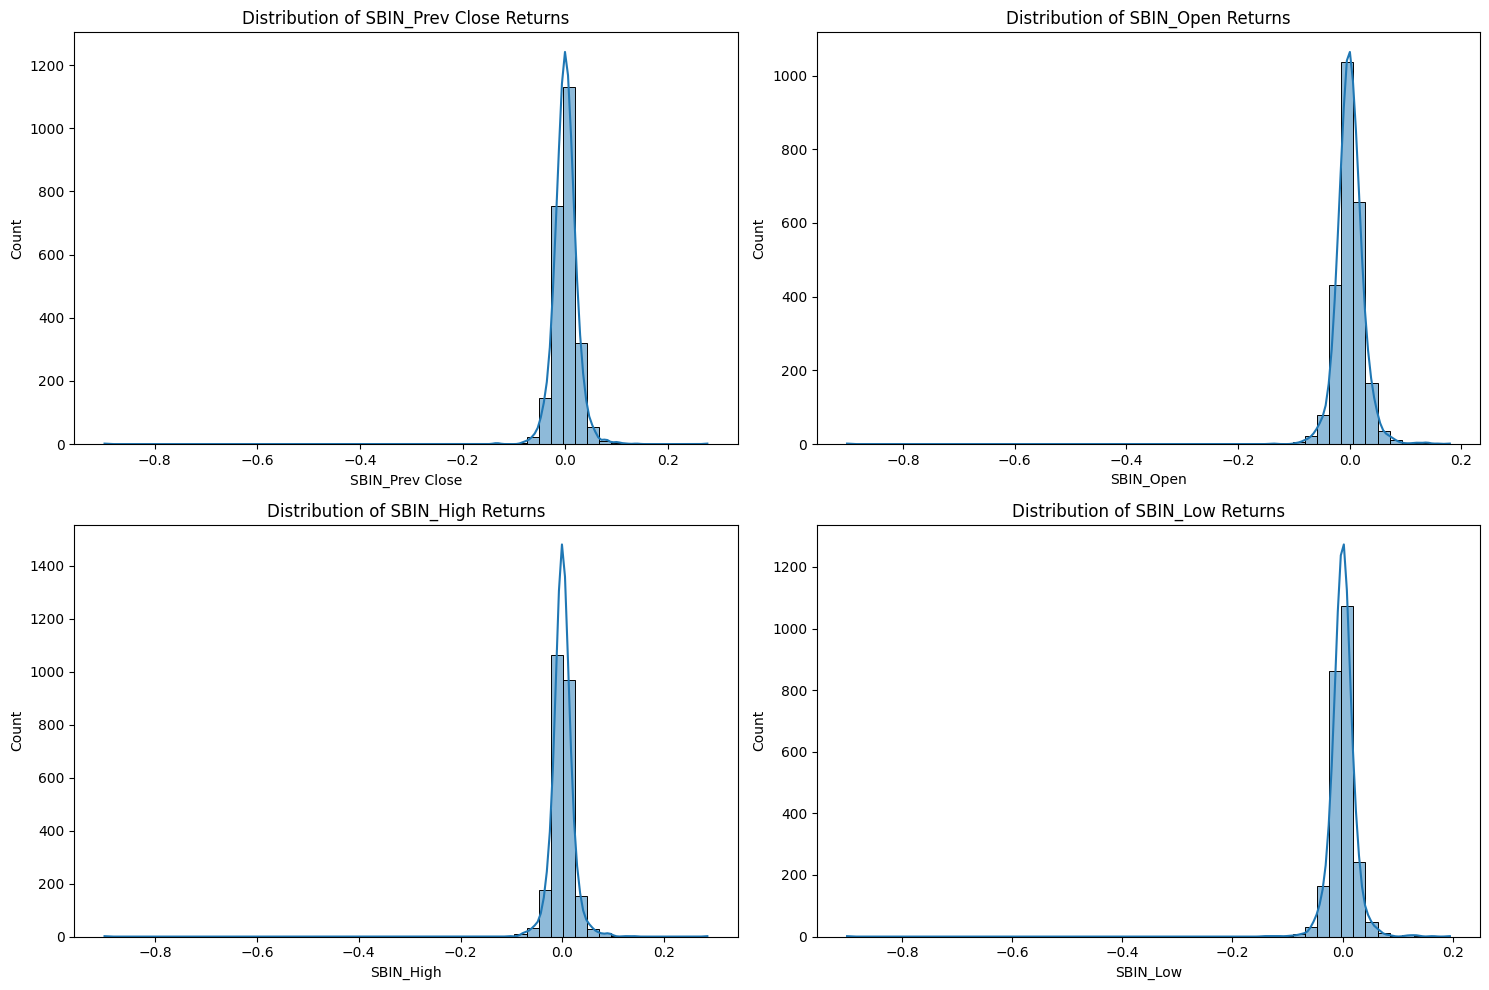

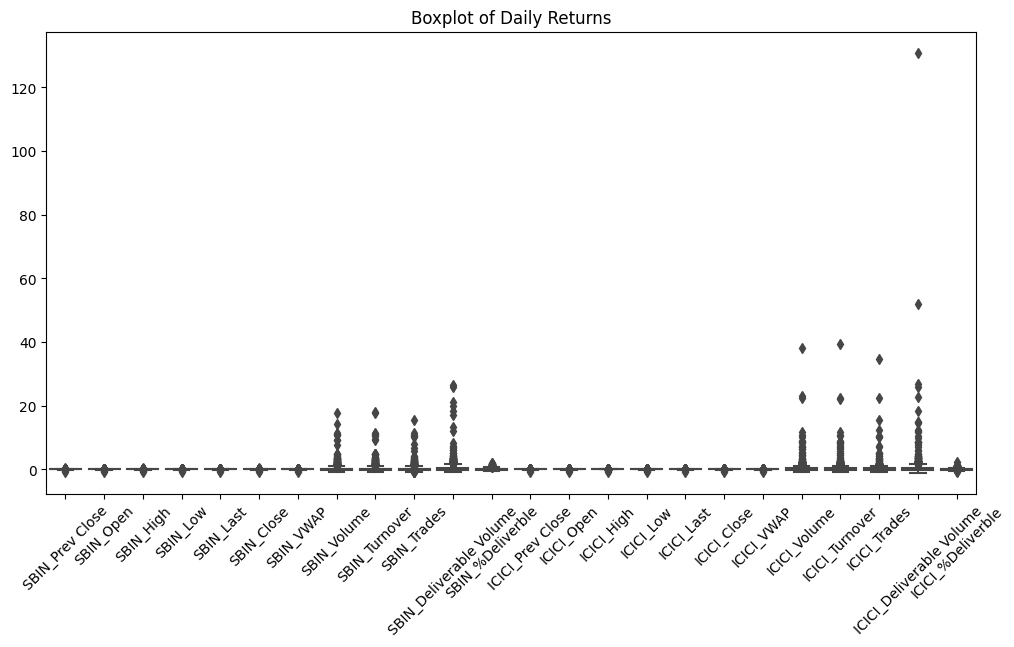

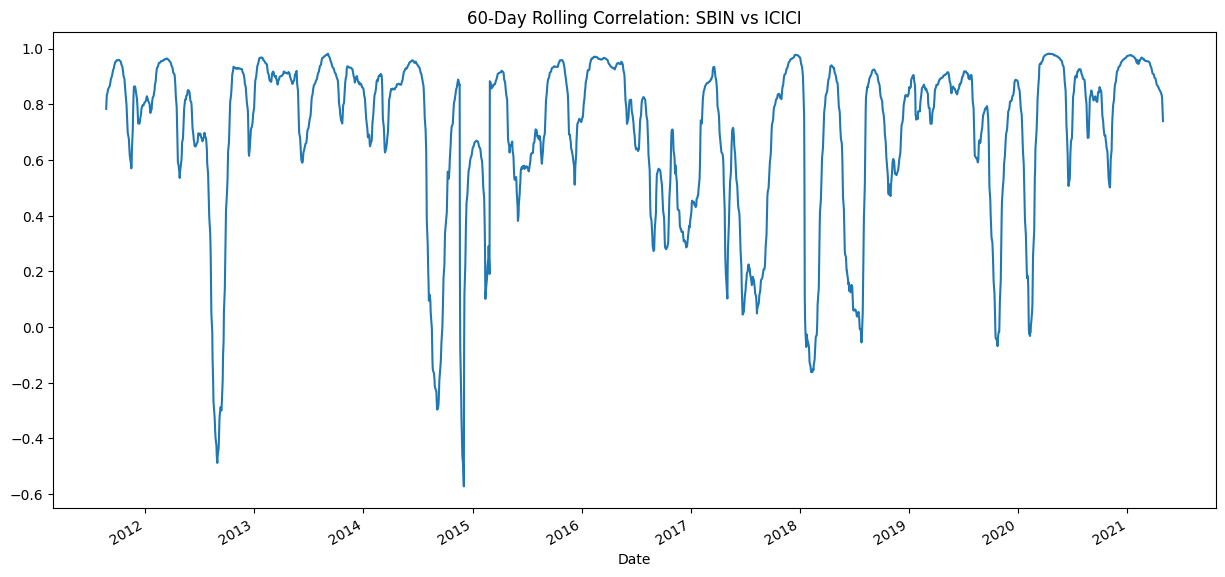


Returns Quantiles:
      SBIN_Prev Close  SBIN_Open  SBIN_High  SBIN_Low  SBIN_Last  SBIN_Close  \
0.01        -0.055466  -0.059183  -0.056339 -0.054944  -0.056361   -0.055466   
0.05        -0.033837  -0.034572  -0.029920 -0.031436  -0.034102   -0.033837   
0.25        -0.011888  -0.012869  -0.010149 -0.010387  -0.012214   -0.011902   
0.50         0.000142  -0.000250  -0.000063  0.000298  -0.000217    0.000128   
0.75         0.011976   0.012836   0.010056  0.010530   0.012396    0.011954   
0.95         0.034578   0.037630   0.031649  0.031834   0.035860    0.034578   
0.99         0.060083   0.066843   0.061423  0.059922   0.060076    0.060083   

      SBIN_VWAP  SBIN_Volume  SBIN_Turnover  SBIN_Trades  ...  ICICI_High  \
0.01  -0.046594    -0.661259      -0.666142    -0.627433  ...   -0.047756   
0.05  -0.028637    -0.468167      -0.472304    -0.436285  ...   -0.028783   
0.25  -0.010536    -0.229277      -0.230032    -0.206999  ...   -0.009452   
0.50  -0.000041    -0.009988   

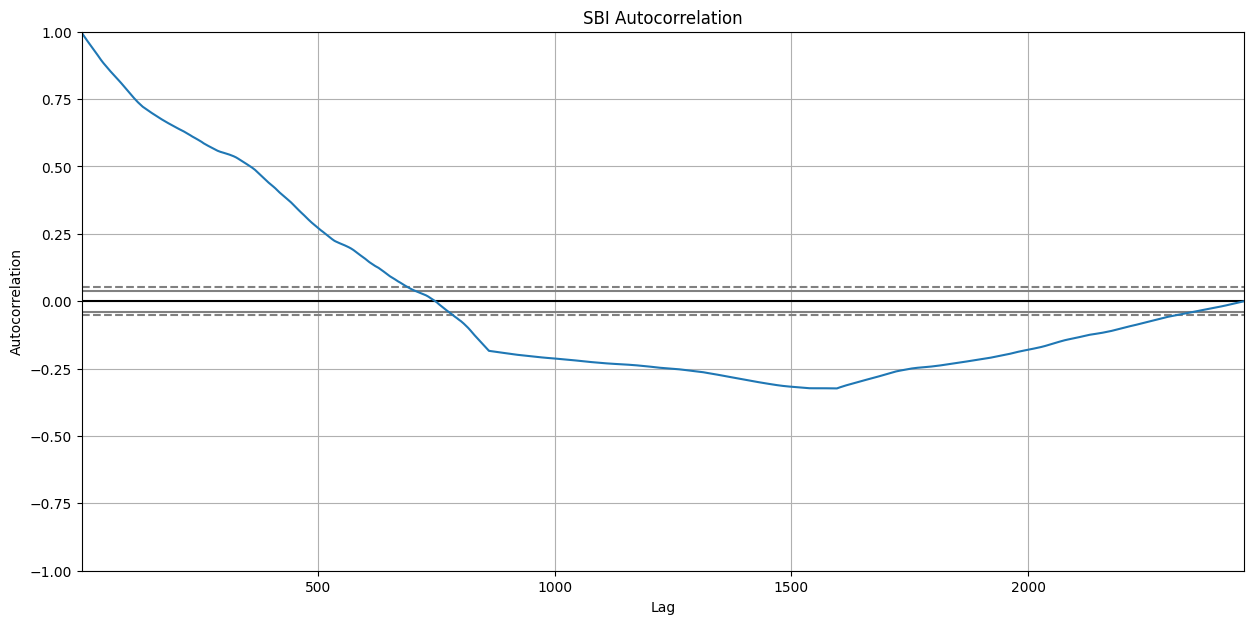

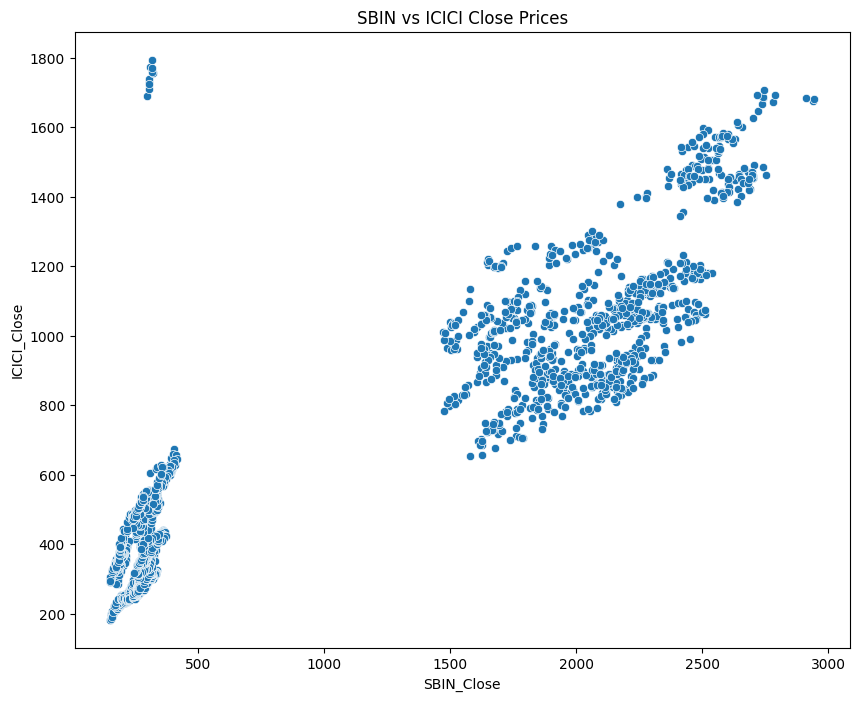

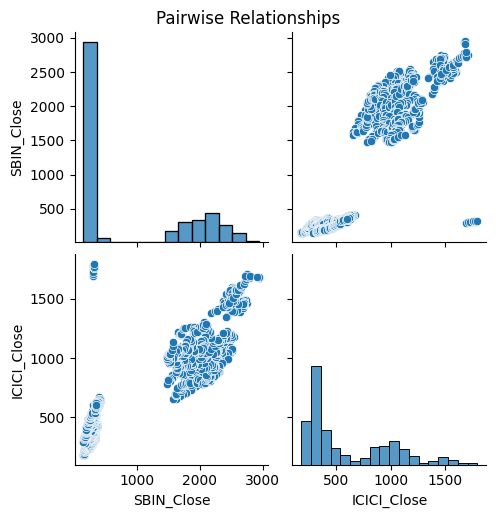

<Figure size 1500x700 with 0 Axes>

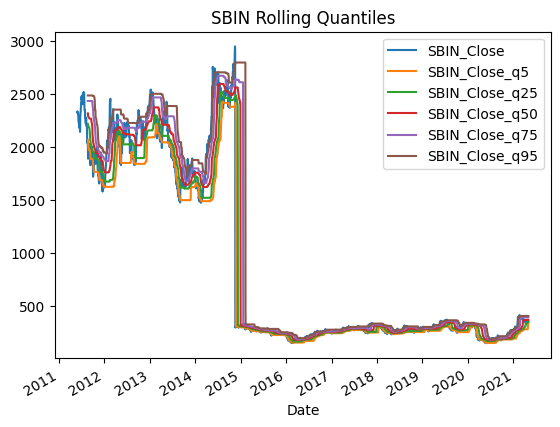


🚨 Number of outlier days in returns: 144


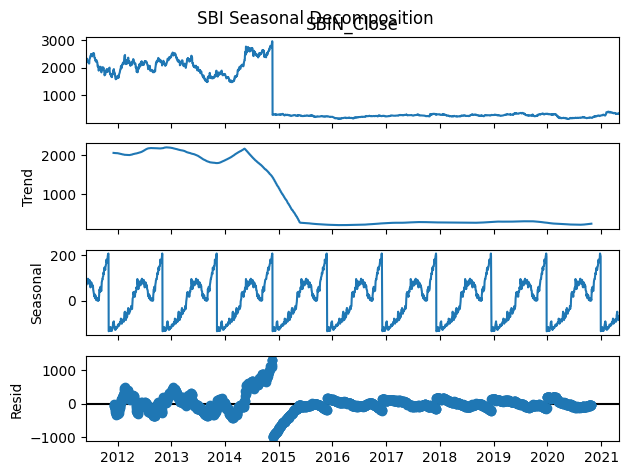

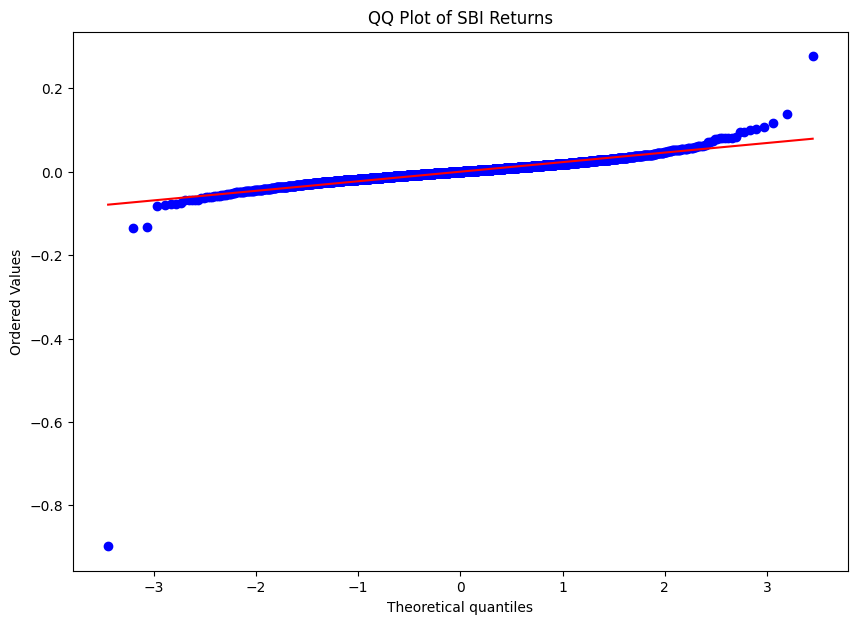

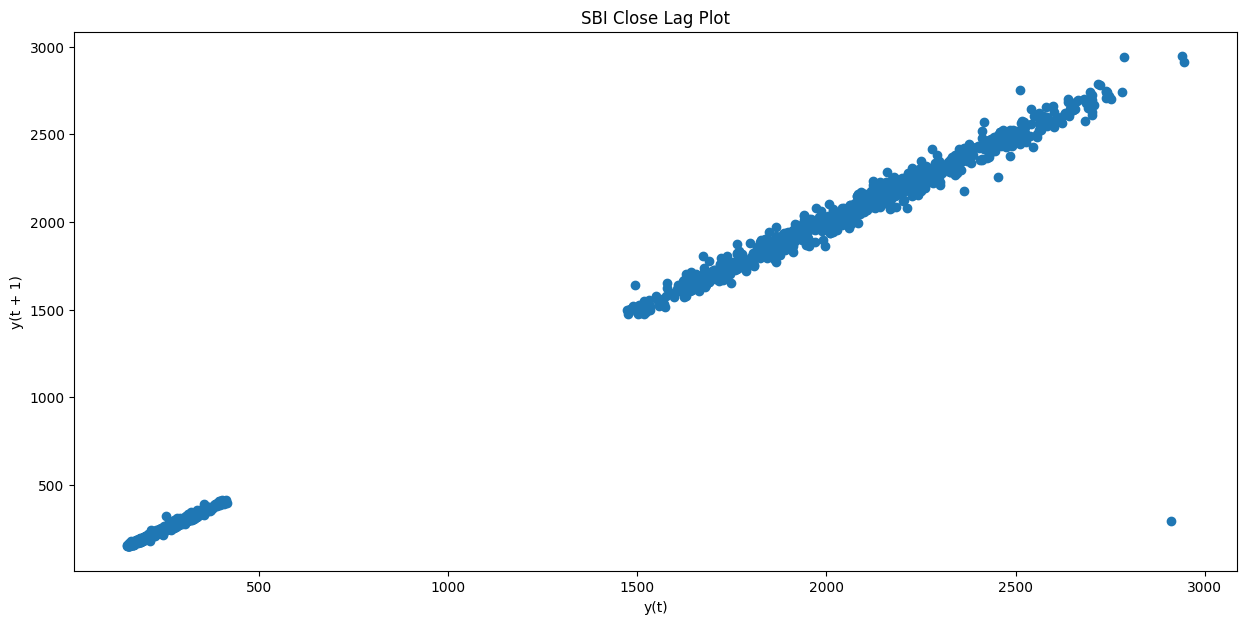

<Figure size 1500x1000 with 0 Axes>

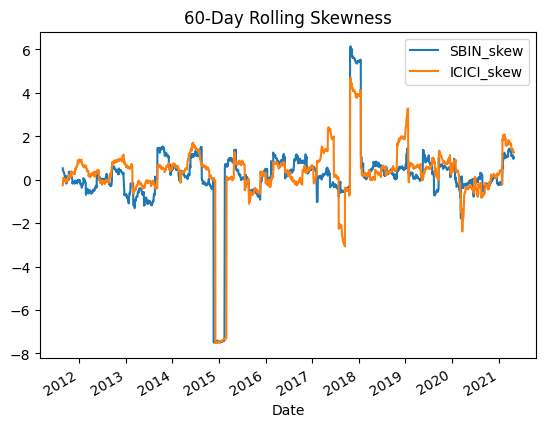

<Figure size 1500x1000 with 0 Axes>

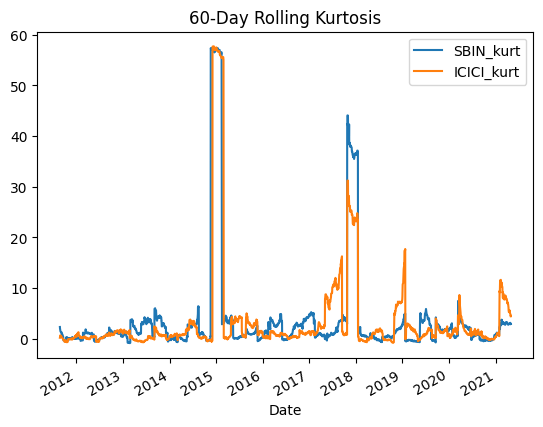

In [18]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
from pandas.plotting import autocorrelation_plot, lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")

#loading Dataset
numeric_data = data.select_dtypes(include=[np.number])

# Basic Info
print("📊 Data Info:")
print(data.info())
print("\n📈 Descriptive Statistics:")
print(numeric_data.describe())

# Time Series Plots
plt.figure(figsize=(15, 7))
numeric_data.plot(subplots=True, figsize=(15, 10))
plt.suptitle('Stock Prices Over Time')
plt.show()

# Correlation Analysis
corr = numeric_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Returns Analysis
returns = numeric_data.pct_change().dropna()
plt.figure(figsize=(15, 7))
returns.plot(subplots=True)
plt.title('Daily Returns')
plt.show()

# Cumulative Returns
cum_returns = (1 + returns).cumprod()
cum_returns.plot(figsize=(15, 7))
plt.title('Cumulative Returns')
plt.show()

# Volatility Analysis
volatility = returns.rolling(window=30).std() * np.sqrt(252)
volatility.plot(figsize=(15, 7))
plt.title('30-Day Annualized Volatility')
plt.show()

# Moving Averages
numeric_data['SBI_Close_50MA'] = numeric_data['SBIN_Close'].rolling(window=50).mean()
numeric_data['ICICI_Close_50MA'] = numeric_data['ICICI_Close'].rolling(window=50).mean()
plt.figure(figsize=(15, 7))
numeric_data[['SBIN_Close', 'SBI_Close_50MA']].plot()
plt.title('SBI 50-Day Moving Average')
plt.show()

plt.figure(figsize=(15, 7))
numeric_data[['ICICI_Close', 'ICICI_Close_50MA']].plot()
plt.title('ICICI 50-Day Moving Average')
plt.show()

# Distribution of Returns
plt.figure(figsize=(15, 10))
for i, col in enumerate(returns.columns[:4]):
    plt.subplot(2, 2, i+1)
    sns.histplot(returns[col], kde=True, bins=50)
    plt.title(f'Distribution of {col} Returns')
plt.tight_layout()
plt.show()

# Boxplots of Returns
plt.figure(figsize=(12, 6))
sns.boxplot(data=returns)
plt.title('Boxplot of Daily Returns')
plt.xticks(rotation=45)
plt.show()

# Rolling Correlation
rolling_corr = numeric_data['SBIN_Close'].rolling(window=60).corr(numeric_data['ICICI_Close'])
rolling_corr.plot(figsize=(15, 7))
plt.title('60-Day Rolling Correlation: SBIN vs ICICI')
plt.show()

# Quantile Analysis
print("\nReturns Quantiles:")
print(returns.quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]))

# Autocorrelation Plot
plt.figure(figsize=(15, 7))
autocorrelation_plot(numeric_data['SBIN_Close'])
plt.title('SBI Autocorrelation')
plt.show()

# Scatter Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='SBIN_Close', y='ICICI_Close', data=numeric_data)
plt.title('SBIN vs ICICI Close Prices')
plt.show()

# PairGrid
sns.pairplot(numeric_data[['SBIN_Close', 'ICICI_Close']])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

# Rolling Quantiles
for q in [0.05, 0.25, 0.5, 0.75, 0.95]:
    numeric_data[f'SBIN_Close_q{int(q*100)}'] = numeric_data['SBIN_Close'].rolling(60).quantile(q)
plt.figure(figsize=(15, 7))
cols = ['SBIN_Close'] + [f'SBIN_Close_q{int(q*100)}' for q in [0.05, 0.25, 0.5, 0.75, 0.95]]
numeric_data[cols].plot()
plt.title('SBIN Rolling Quantiles')
plt.show()

# Outlier Detection
z_scores = np.abs(stats.zscore(returns))
outliers = (z_scores > 3).any(axis=1)
print(f"\n🚨 Number of outlier days in returns: {outliers.sum()}")

# Seasonal Decomposition
decomposition = seasonal_decompose(numeric_data['SBIN_Close'].dropna(), period=252)
decomposition.plot()
plt.suptitle('SBI Seasonal Decomposition')
plt.show()

# QQ Plot
plt.figure(figsize=(10, 7))
stats.probplot(returns['SBIN_Close'].dropna(), dist="norm", plot=plt)
plt.title('QQ Plot of SBI Returns')
plt.show()

# Lag Analysis
plt.figure(figsize=(15, 7))
lag_plot(numeric_data['SBIN_Close'])
plt.title('SBI Close Lag Plot')
plt.show()

# Rolling Skewness & Kurtosis
numeric_data['SBIN_skew'] = returns['SBIN_Close'].rolling(60).skew()
numeric_data['ICICI_skew'] = returns['ICICI_Close'].rolling(60).skew()
numeric_data['SBIN_kurt'] = returns['SBIN_Close'].rolling(60).kurt()
numeric_data['ICICI_kurt'] = returns['ICICI_Close'].rolling(60).kurt()

plt.figure(figsize=(15, 10))
numeric_data[['SBIN_skew', 'ICICI_skew']].plot()
plt.title('60-Day Rolling Skewness')
plt.show()

plt.figure(figsize=(15, 10))
numeric_data[['SBIN_kurt', 'ICICI_kurt']].plot()
plt.title('60-Day Rolling Kurtosis')
plt.show()


In [25]:
!pip install hmmlearn
!pip install copulae


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 20.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 22.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 30.3 MB/s eta 0:00:0000:01:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.3.1 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy

In [30]:
!pip install arch pywavelets hmmlearn copulas scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 4.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 2.1 MB/s eta 0:00:00


Note: copulae package not available - skipping copula analysis

Risk-Adjusted Metrics:
                            SBI     ICICI
Annualized Return      0.011576  0.086375
Annualized Volatility  0.458520  0.433854
Sharpe Ratio           0.025246  0.199087
Sortino Ratio          0.025161  0.205349


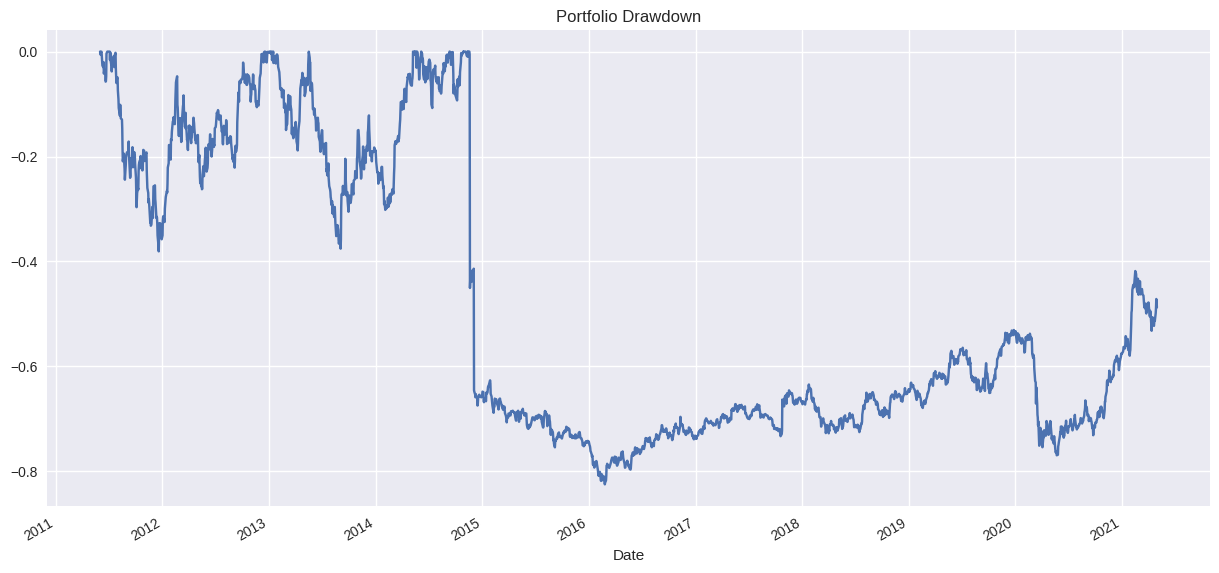


Max Drawdown: -82.47%

ADF Stationarity:
SBI: ADF=-1.93, p=0.3199
ICICI: ADF=-2.26, p=0.1839

Variance Ratio:
SBI: 1.03
ICICI: 1.00

Hurst Exponent:
SBI: nan
ICICI: nan


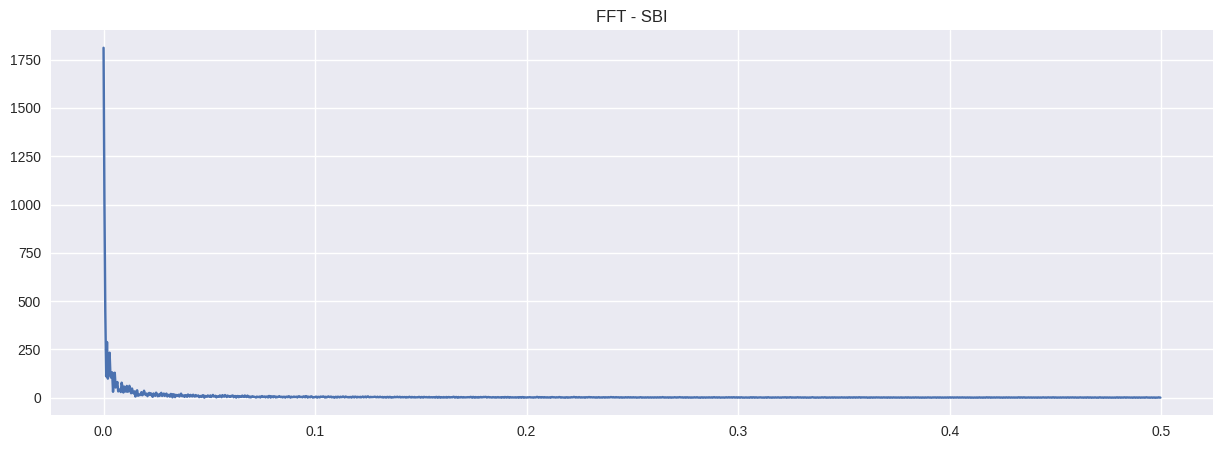

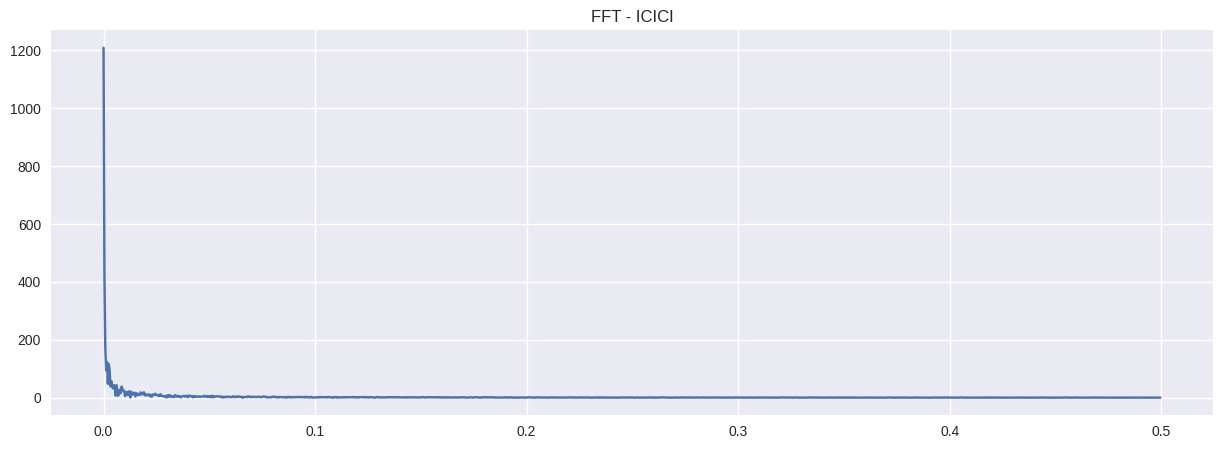

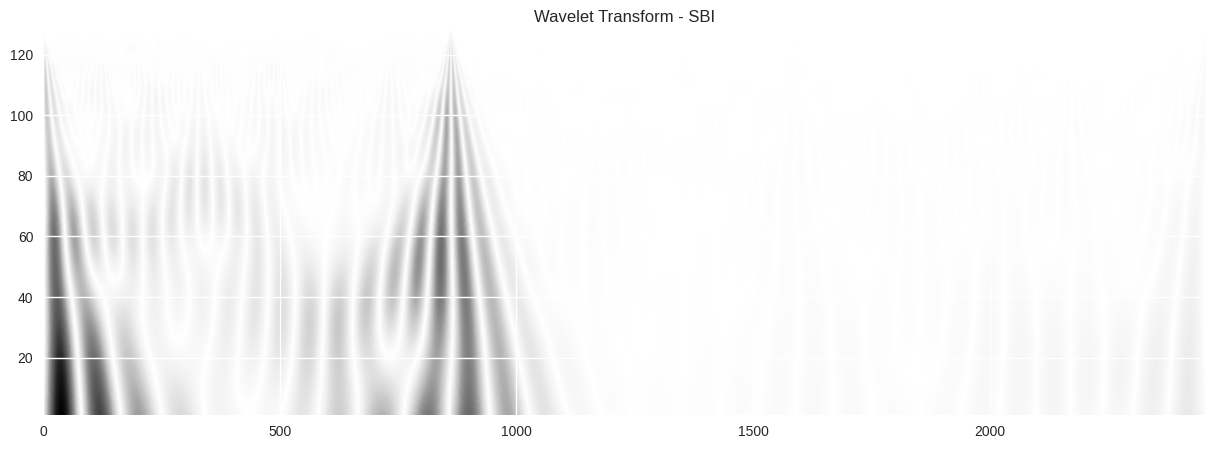

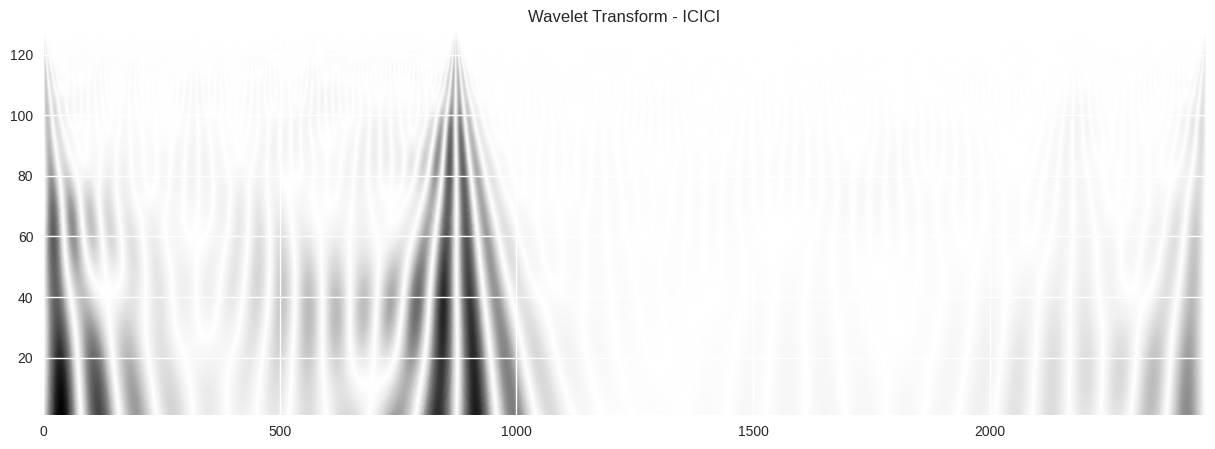

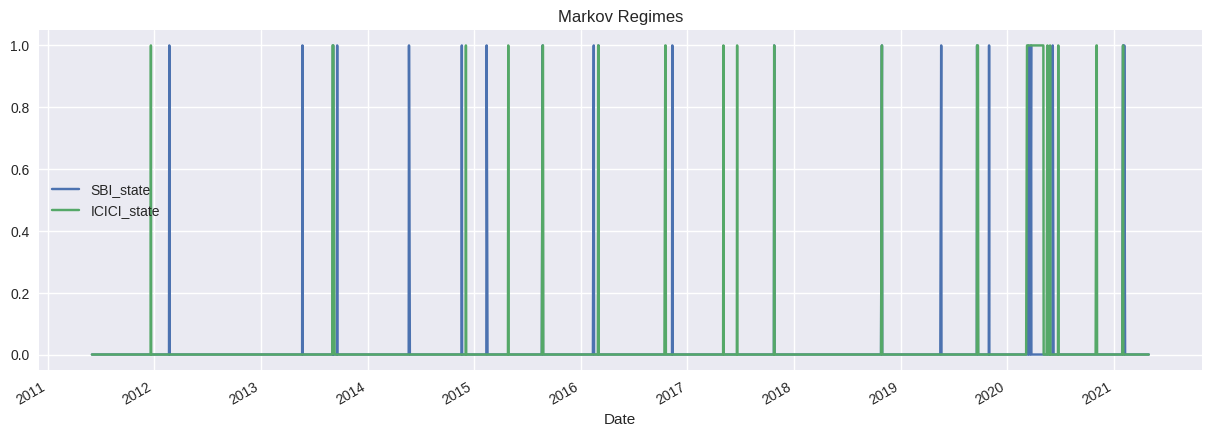


Granger Causality (SBI -> ICICI):
Lag 1: p=0.0000
Lag 2: p=0.0000
Lag 3: p=0.0000
Lag 4: p=0.0000
Lag 5: p=0.0000


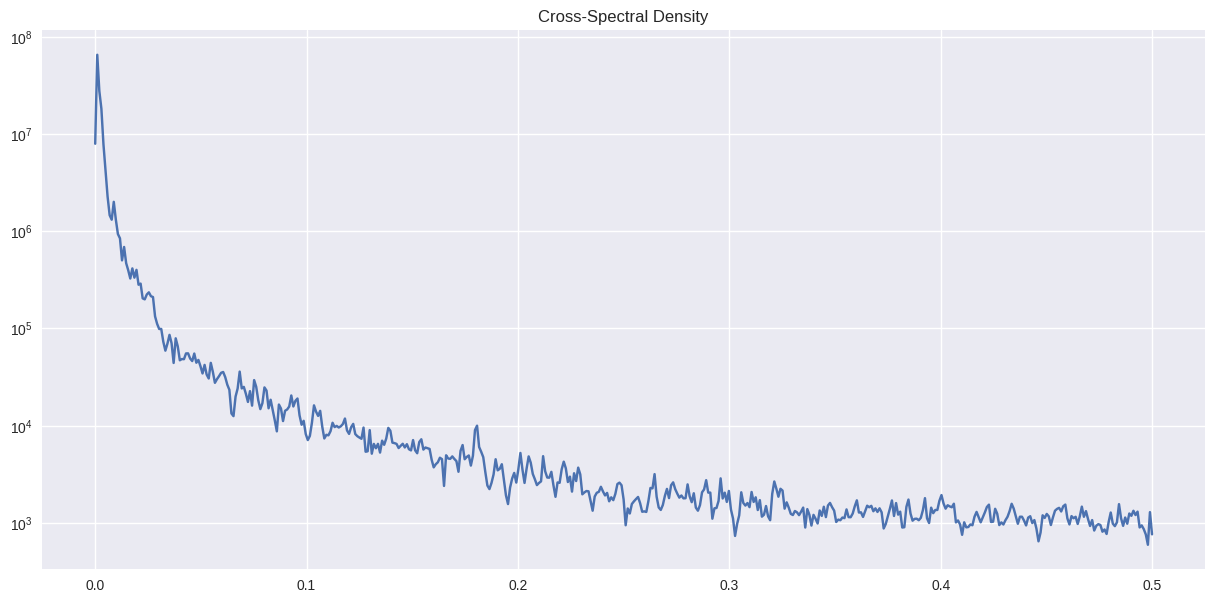


Correlation Measures:
Pearson     0.922594
Spearman    0.862674
Kendall     0.695085
dtype: float64

Rolling VAR estimated successfully

State-Space Model Summary:
                           Statespace Model Results                           
Dep. Variable:       ['SBI', 'ICICI']   No. Observations:                 2456
Model:                         VAR(1)   Log Likelihood              -25444.713
                          + intercept   AIC                          50907.425
Date:                Tue, 01 Jul 2025   BIC                          50959.682
Time:                        03:47:02   HQIC                         50926.414
Sample:                             0                                         
                               - 2456                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):             2.41, 0.13   Jarque-Bera (JB):   263600290.30, 232603778.96
Prob(Q):                        

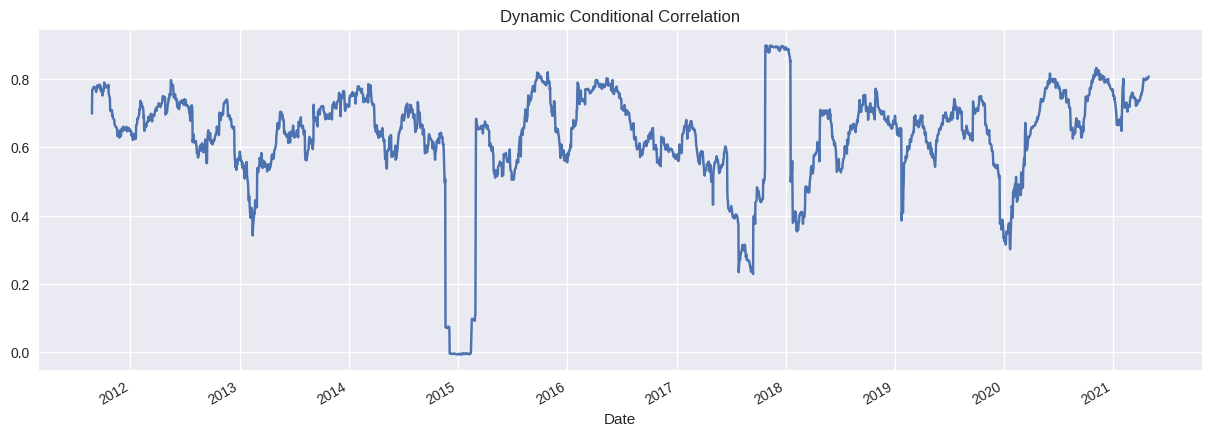

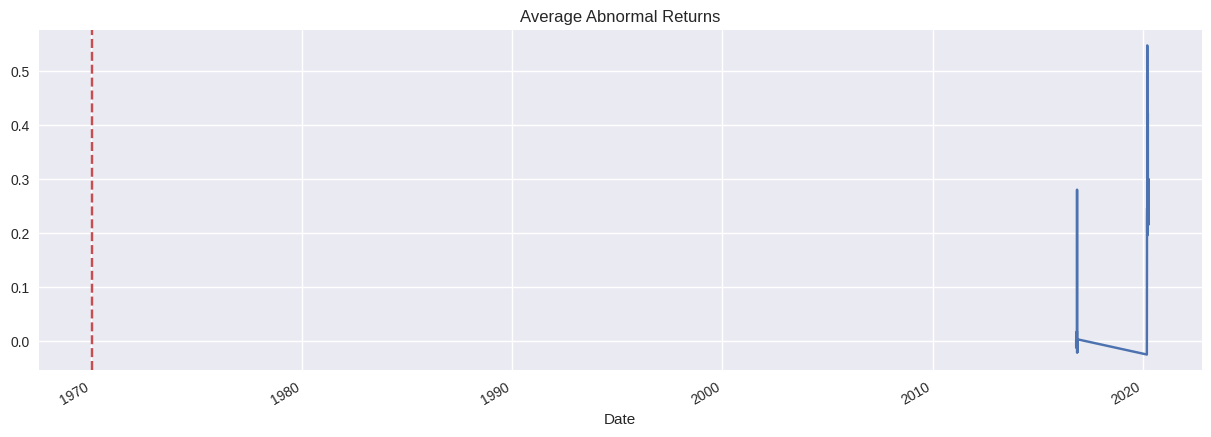


Pairs Trading Metrics:
Half-Life (days)             -0.122544
Mean Reversion Probability    0.517915
Z-Score Mean                 -0.209114
Z-Score Std                   1.276475
dtype: float64


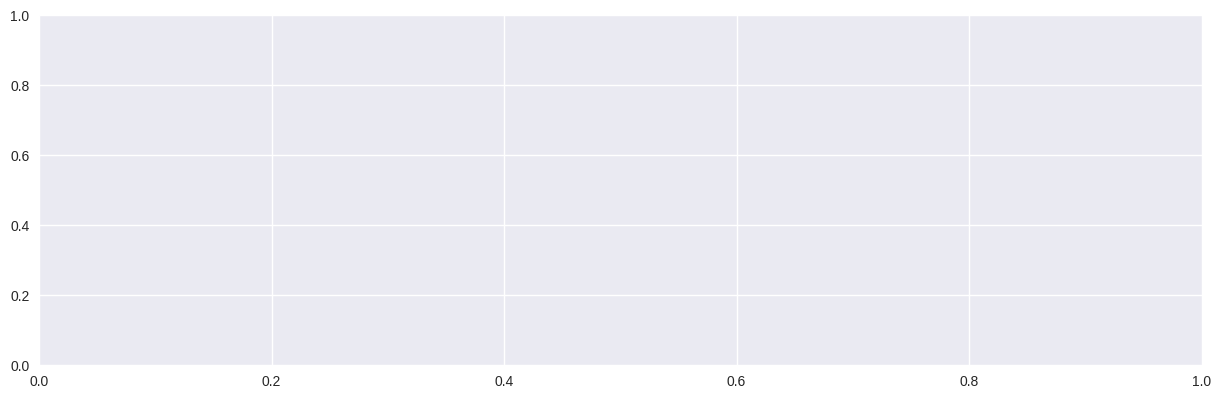

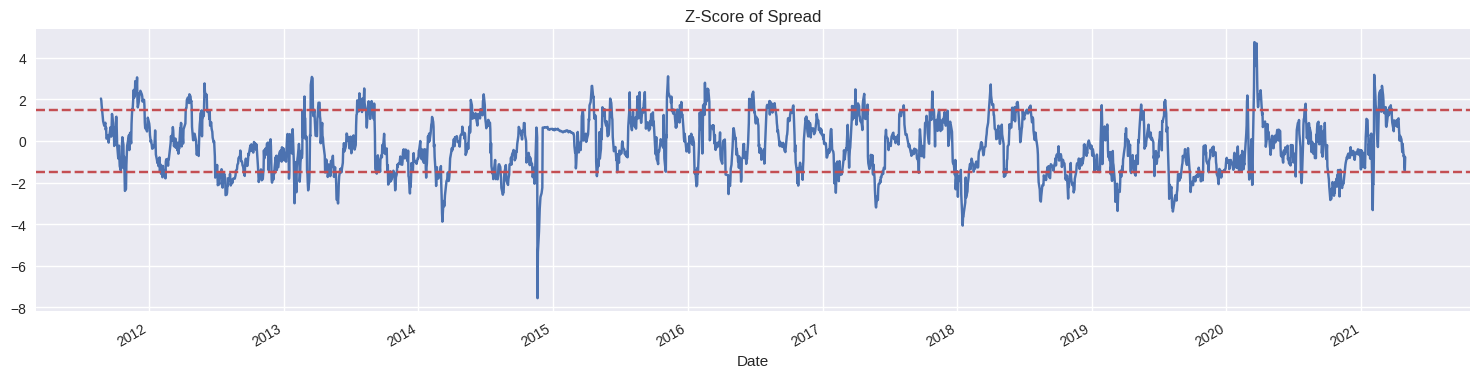

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller, grangercausalitytests
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from scipy.fft import fft, fftfreq
from scipy.signal import csd
import warnings
warnings.filterwarnings('ignore')


try:
    from arch import arch_model
    ARCH_AVAILABLE = True
except ImportError:
    try:
        # Installing if not available 
        import pip
        pip.main(['install', 'arch'])
        from arch import arch_model
        ARCH_AVAILABLE = True
    except:
        ARCH_AVAILABLE = False
        print("arch package not available ")

# copulae package
try:
    from copulae import GaussianCopula
    COPULAE_AVAILABLE = True
except ImportError:
    COPULAE_AVAILABLE = False
    print("Copulae package not available")

# hmmlearn package
try:
    from hmmlearn.hmm import GaussianHMM
    HMM_AVAILABLE = True
except ImportError:
    HMM_AVAILABLE = False
    print("hmmlearn package not available ")

#  pywt package
try:
    import pywt
    WAVELET_AVAILABLE = True
except ImportError:
    WAVELET_AVAILABLE = False
    print("pywavelets package not available ")

#Dataset Loading 
sbin = pd.read_csv('/kaggle/input/dataset/SBIN.csv', parse_dates=['Date'], index_col='Date')
icici = pd.read_csv('/kaggle/input/dataset/ICICIBANK.csv', parse_dates=['Date'], index_col='Date')

# columns to identify stock
sbin.columns = [f"SBIN_{col}" for col in sbin.columns]
icici.columns = [f"ICICI_{col}" for col in icici.columns]

# Merging on Date
data = pd.merge(sbin, icici, left_index=True, right_index=True, how='inner')
data = data.dropna()

# 
if 'SBI' not in data.columns:
    data['SBI'] = data['SBIN_Close']  
if 'ICICI' not in data.columns:
    data['ICICI'] = data['ICICI_Close']  

# Calculate returns
returns = data[['SBI', 'ICICI']].pct_change().dropna()

# Volume Analysis
if 'SBI_Volume' in data.columns:
    plt.figure(figsize=(15, 7))
    data['SBI_Volume'].plot()
    plt.title('SBI Trading Volume Over Time')
    plt.show()
    
    # scatter plot
    common_dates = data['SBI_Volume'].index.intersection(returns.index)
    if len(common_dates) > 0:
        plot_data = pd.DataFrame({
            'Volume': data['SBI_Volume'].loc[common_dates],
            'Returns': returns['SBI'].loc[common_dates]
        }).dropna()
        
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=plot_data, x='Volume', y='Returns')
        plt.title('Volume vs SBI Returns')
        plt.show()
    else:
        print("No overlapping dates between volume and returns data")


# Risk Metrics
risk_metrics = returns.apply(lambda r: pd.Series({
    'Annualized Return': (1 + r.mean())**252 - 1,
    'Annualized Volatility': r.std() * np.sqrt(252),
    'Sharpe Ratio': ((1 + r.mean())**252 - 1) / (r.std() * np.sqrt(252)),
    'Sortino Ratio': ((1 + r.mean())**252 - 1) / (r[r < 0].std() * np.sqrt(252))
}))
print("\nRisk-Adjusted Metrics:")
print(risk_metrics)

# Drawdown Analysis
cumulative = (1 + returns.mean(axis=1)).cumprod()
peak = cumulative.expanding().max()
drawdown = (cumulative - peak) / peak
max_drawdown = drawdown.min()
drawdown.plot(figsize=(15, 7))
plt.title("Portfolio Drawdown")
plt.show()
print(f"\nMax Drawdown: {max_drawdown:.2%}")

# ADF Test
print("\nADF Stationarity:")
for col in ['SBI', 'ICICI']:
    stat, pval = adfuller(data[col].dropna())[:2]
    print(f"{col}: ADF={stat:.2f}, p={pval:.4f}")

# Variance Ratio
def variance_ratio(ts, lag=2):
    ts = ts.dropna()
    mu = ts.diff().mean()
    var_1 = ((ts.diff() - mu)**2).sum() / (len(ts) - 1)
    var_lag = ((ts.diff(lag) - lag * mu)**2).sum() / (len(ts) - lag)
    return var_lag / (lag * var_1)
print("\nVariance Ratio:")
for col in ['SBI', 'ICICI']:
    print(f"{col}: {variance_ratio(data[col]):.2f}")

# Hurst Exponent
def hurst(ts):
    lags = range(2, 100)
    tau = [np.std(ts[lag:] - ts[:-lag]) for lag in lags]
    return np.polyfit(np.log(lags), np.log(tau), 1)[0]
print("\nHurst Exponent:")
for col in ['SBI', 'ICICI']:
    print(f"{col}: {hurst(data[col]):.2f}")

# Fourier Transform
def plot_fft(ts, title):
    yf = fft(ts.dropna())
    xf = fftfreq(len(ts), 1)[:len(ts)//2]
    plt.figure(figsize=(15, 5))
    plt.plot(xf, 2/len(ts) * np.abs(yf[:len(ts)//2]))
    plt.title(f"FFT - {title}")
    plt.show()
for col in ['SBI', 'ICICI']:
    plot_fft(data[col], col)

# Wavelet Analysis
if WAVELET_AVAILABLE:
    def wavelet(ts, title):
        coeffs, _ = pywt.cwt(ts.dropna(), np.arange(1, 128), 'morl')
        plt.figure(figsize=(15, 5))
        plt.imshow(np.abs(coeffs), aspect='auto', extent=[0, len(ts), 1, 128])
        plt.title(f"Wavelet Transform - {title}")
        plt.show()
    for col in ['SBI', 'ICICI']:
        wavelet(data[col], col)

# Markov Switching
if HMM_AVAILABLE:
    def markov(ser):
        ser = ser.dropna().values.reshape(-1, 1)
        hmm = GaussianHMM(n_components=2, covariance_type="diag").fit(ser)
        return hmm.predict(ser)
    for col in ['SBI', 'ICICI']:
        returns[f'{col}_state'] = markov(returns[col])
    returns[['SBI_state', 'ICICI_state']].plot(figsize=(15,5))
    plt.title("Markov Regimes")
    plt.show()

# Copula Analysis
if COPULAE_AVAILABLE:
    def plot_copula(x, y):
        u = x.rank()/(len(x)+1)
        v = y.rank()/(len(y)+1)
        cop = GaussianCopula(dim=2)
        cop.fit(np.column_stack((u, v)))
        plt.scatter(u, v, alpha=0.5)
        plt.title("Copula Transformation")
        plt.show()
        return cop
    copula = plot_copula(data['SBI'], data['ICICI'])

# Tail Dependence
if COPULAE_AVAILABLE:
    u = np.linspace(0, 1, 1000)
    lt = copula.cdf(np.column_stack((u, np.full_like(u, 0.05)))).mean()
    ut = 1 - copula.cdf(np.column_stack((u, np.full_like(u, 0.95)))).mean()
    print(f"\nTail Dependence:\nLower: {lt:.2f}, Upper: {ut:.2f}")

# Granger Causality
print("\nGranger Causality (SBI -> ICICI):")
granger = grangercausalitytests(data[['ICICI', 'SBI']].dropna(), maxlag=5, verbose=False)
for lag in range(1, 6):
    print(f"Lag {lag}: p={granger[lag][0]['ssr_ftest'][1]:.4f}")

# Co-Spectral Analysis
f, Pxy = csd(data['SBI'].dropna(), data['ICICI'].dropna(), nperseg=1024)
plt.semilogy(f, np.abs(Pxy))
plt.title("Cross-Spectral Density")
plt.show()

# Non-linear Correlation
print("\nCorrelation Measures:")
print(pd.Series({
    'Pearson': data['SBI'].corr(data['ICICI']),
    'Spearman': stats.spearmanr(data['SBI'], data['ICICI'])[0],
    'Kendall': stats.kendalltau(data['SBI'], data['ICICI'])[0]
}))

# Rolling VAR
window = 100
rolling_betas = []
var_data = data[['SBI', 'ICICI']].pct_change().dropna()
for i in range(window, len(var_data)):
    model = VAR(var_data.iloc[i-window:i])
    res = model.fit(maxlags=1)
    rolling_betas.append(res.params)
print("\nRolling VAR estimated successfully")

# State-Space Model
model = VARMAX(data[['SBI', 'ICICI']].dropna(), order=(1,0)).fit(disp=False)
print("\nState-Space Model Summary:")
print(model.summary())

# DCC-GARCH
if ARCH_AVAILABLE:
    garch_sbi = arch_model(returns['SBI'], vol='Garch', p=1, q=1).fit(disp='off')
    garch_icici = arch_model(returns['ICICI'], vol='Garch', p=1, q=1).fit(disp='off')
    resid = pd.DataFrame({
        'SBI': garch_sbi.resid / garch_sbi.conditional_volatility,
        'ICICI': garch_icici.resid / garch_icici.conditional_volatility
    }).dropna()
    resid['DCC'] = resid['SBI'].rolling(60).corr(resid['ICICI'])
    resid['DCC'].plot(figsize=(15,5))
    plt.title("Dynamic Conditional Correlation")
    plt.show()
else:
    print("\nUsing rolling correlation as fallback for DCC-GARCH")
    rolling_corr = data['SBI'].rolling(60).corr(data['ICICI'])
    rolling_corr.plot(figsize=(15,5))
    plt.title("60-Day Rolling Correlation (DCC Fallback)")
    plt.show()

# Event Study
def event_study(event_dates, window=10):
    results = []
    for d in event_dates:
        if d in returns.index:
            i = returns.index.get_loc(d)
            s, e = max(0, i - window), min(len(returns), i + window + 1)
            results.append(returns.iloc[s:e].mean(axis=1))
    if results:
        avg = pd.concat(results, axis=1).mean(axis=1)
        avg.plot(figsize=(15, 5))
        plt.axvline(x=window, color='r', linestyle='--')
        plt.title("Average Abnormal Returns")
        plt.show()
event_study([pd.Timestamp('2020-03-23'), pd.Timestamp('2016-11-08')])

#  Pairs Trading Metrics
def pairs_metrics(spread, z):
    hl = np.log(2) / np.mean(np.log(spread.pct_change().abs()))
    mr = (z.abs() < 1).mean()
    return pd.Series({
        'Half-Life (days)': hl,
        'Mean Reversion Probability': mr,
        'Z-Score Mean': z.mean(),
        'Z-Score Std': z.std()
    })

# Calculate spread and z-score if not already present
if 'spread' not in data.columns:
    log_sbi = np.log(data['SBI'])
    log_icici = np.log(data['ICICI'])
    model = sm.OLS(log_sbi, sm.add_constant(log_icici))
    results = model.fit()
    hedge_ratio = results.params[1]
    data['spread'] = log_sbi - hedge_ratio * log_icici

if 'z_score' not in data.columns:
    rolling_mean = data['spread'].rolling(window=60).mean()
    rolling_std = data['spread'].rolling(window=60).std()
    data['z_score'] = (data['spread'] - rolling_mean) / rolling_std

print("\nPairs Trading Metrics:")
print(pairs_metrics(data['spread'], data['z_score']))


plt.figure(figsize=(15, 10))
plt.subplot(2,1,1)
data[['SBI', 'ICICI']].plot()
plt.title('Price Series')

plt.subplot(2,1,2)
if 'z_score' in data.columns:
    data['z_score'].plot()
    plt.axhline(1.5, color='r', linestyle='--')
    plt.axhline(-1.5, color='r', linestyle='--')
    plt.title('Z-Score of Spread')
plt.tight_layout()
plt.show()

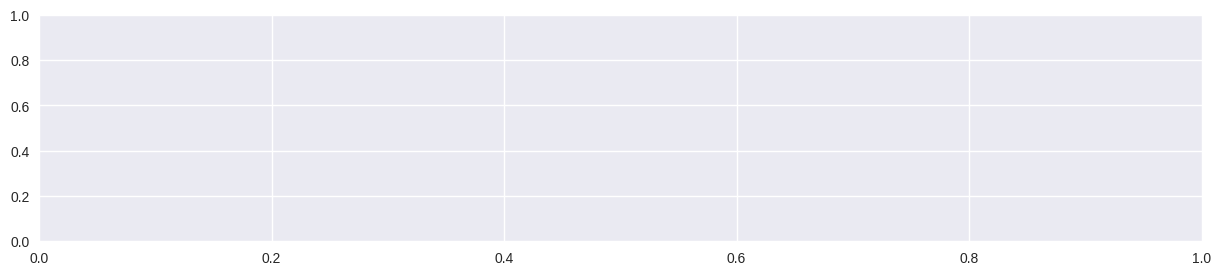

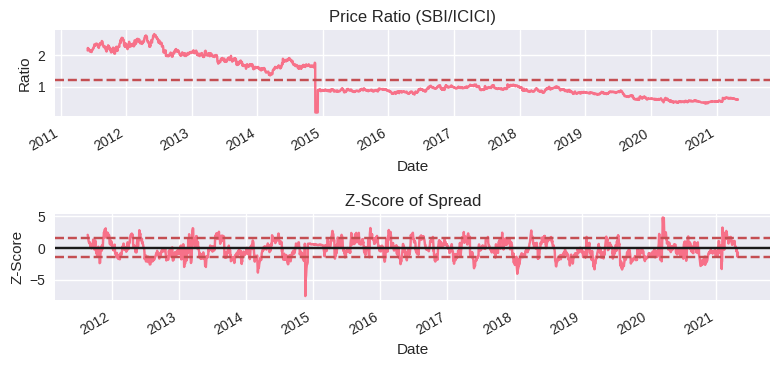

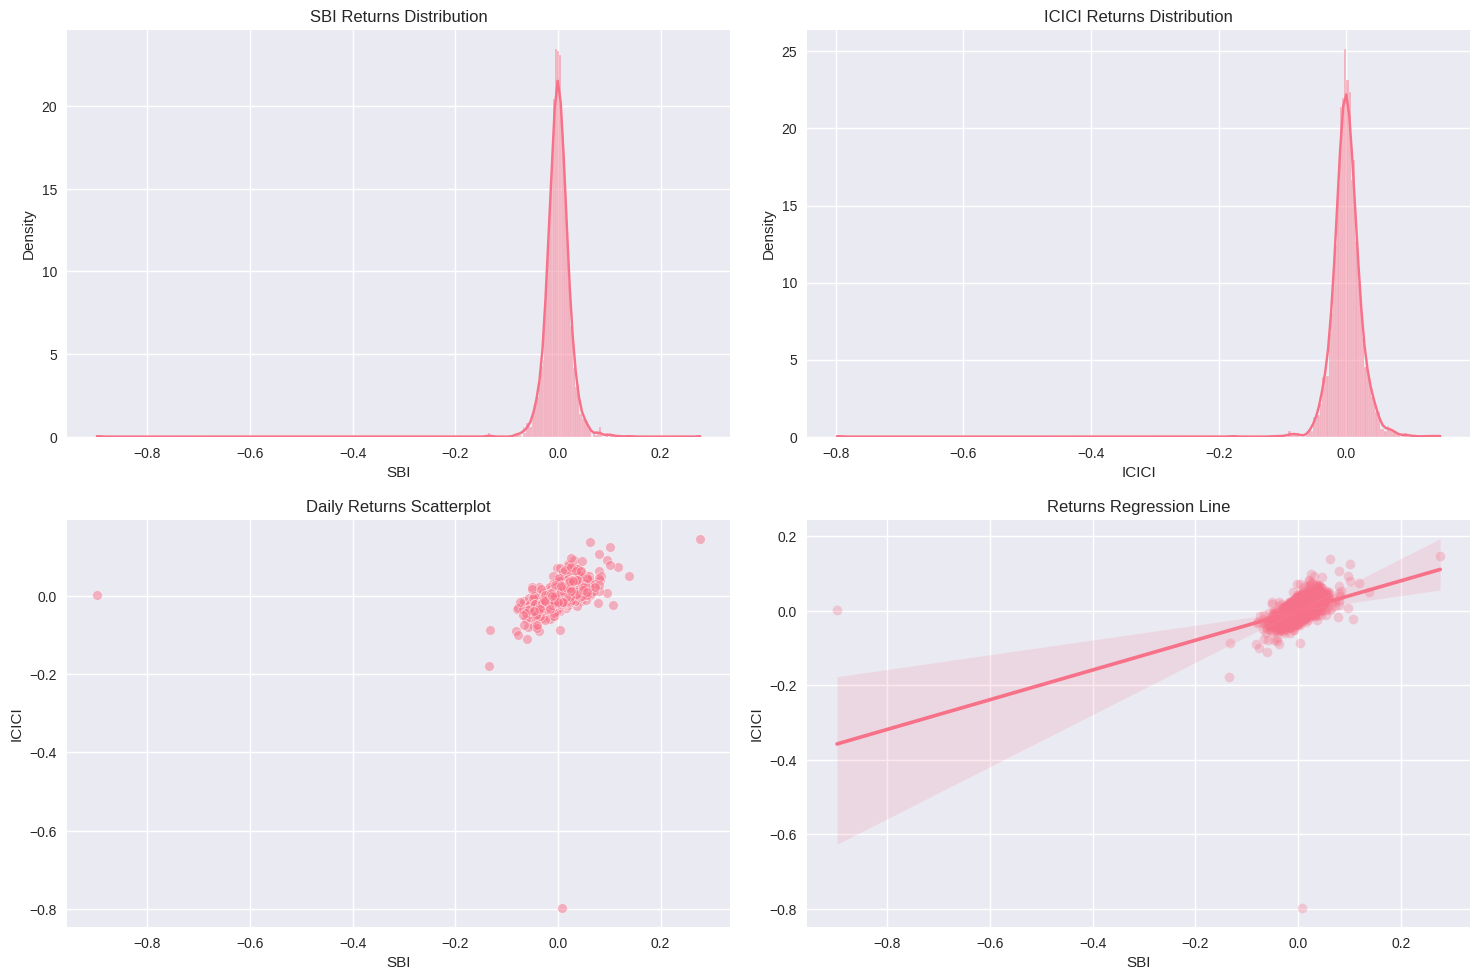

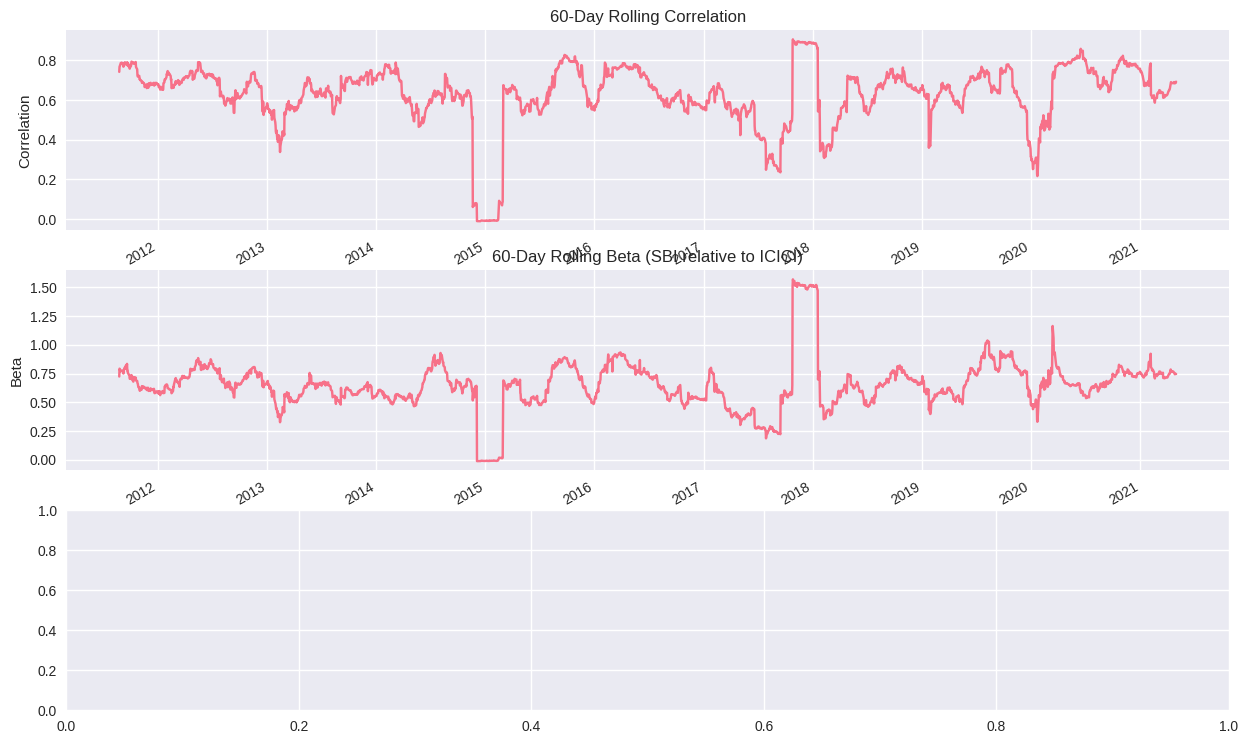

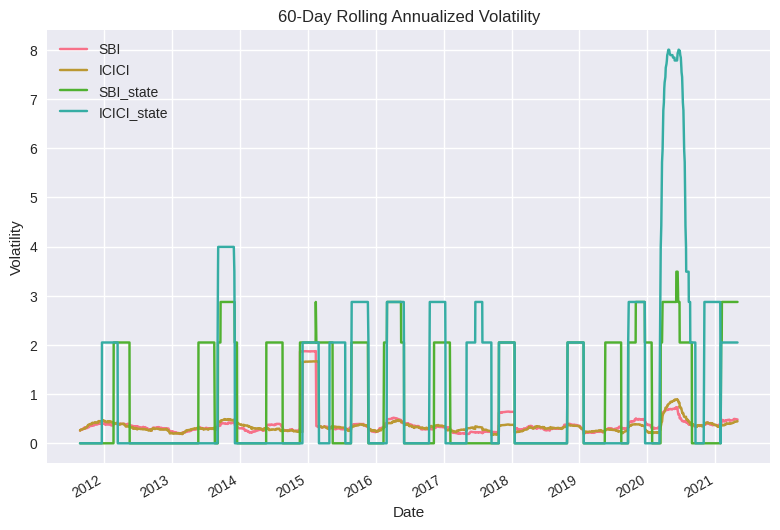

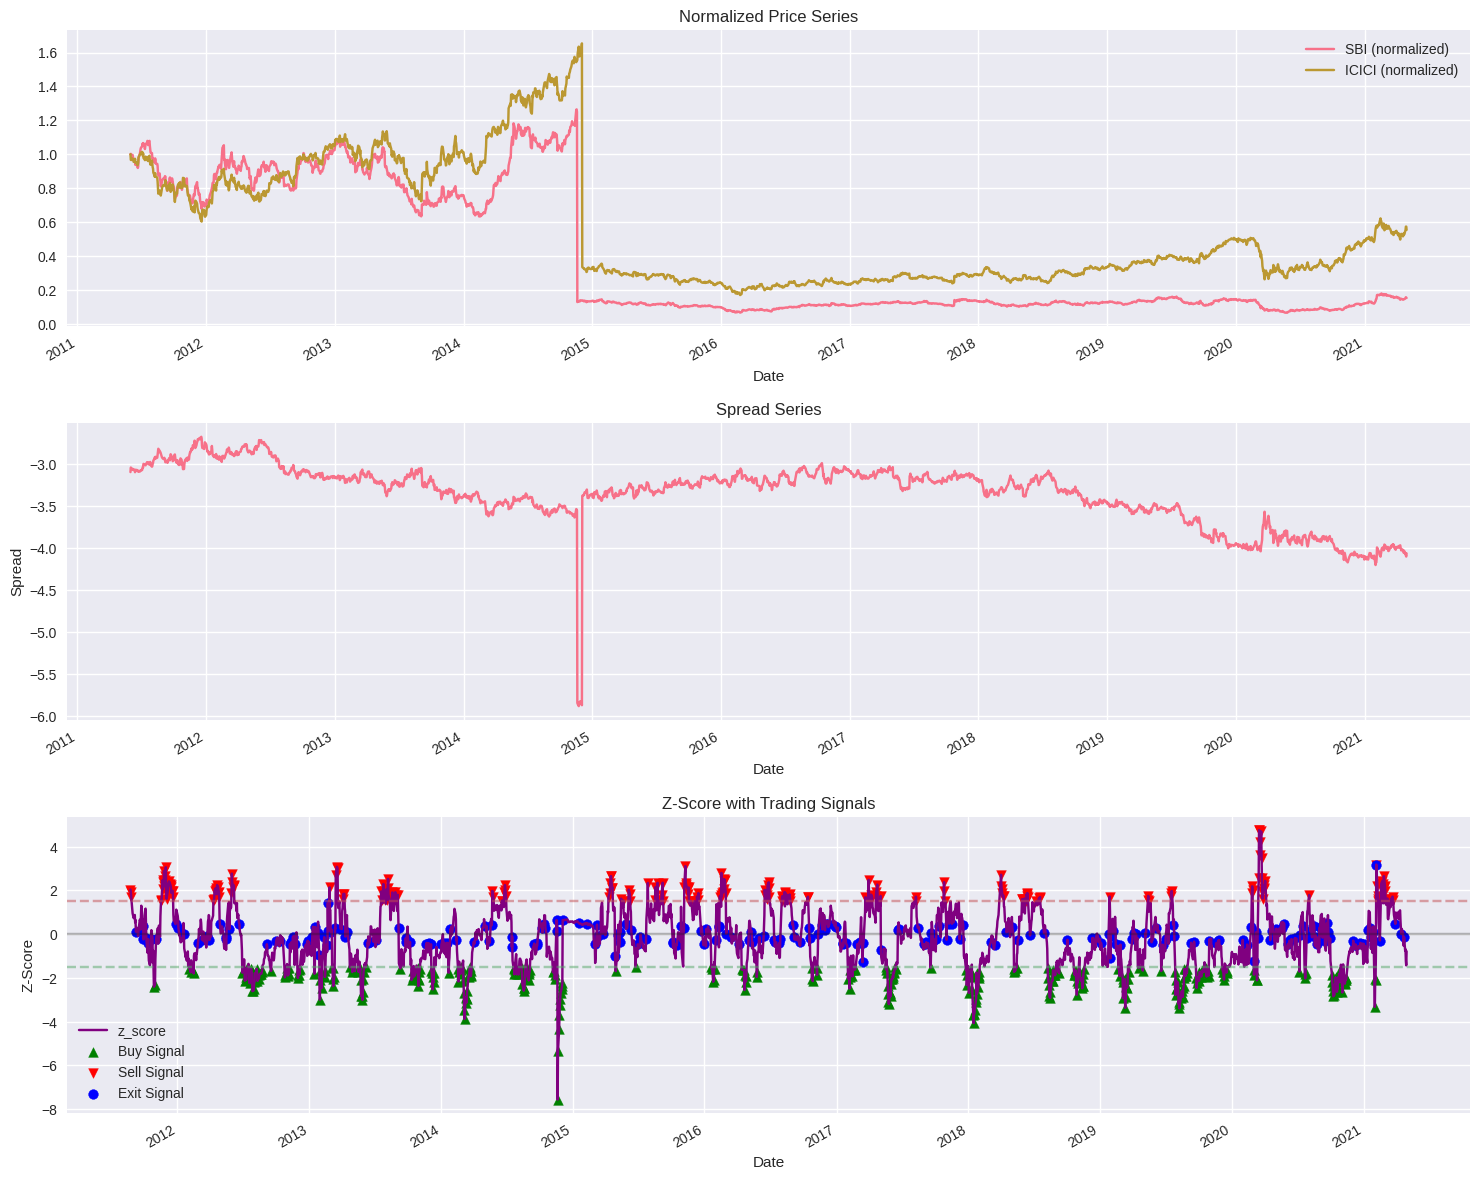

<Figure size 1500x700 with 0 Axes>

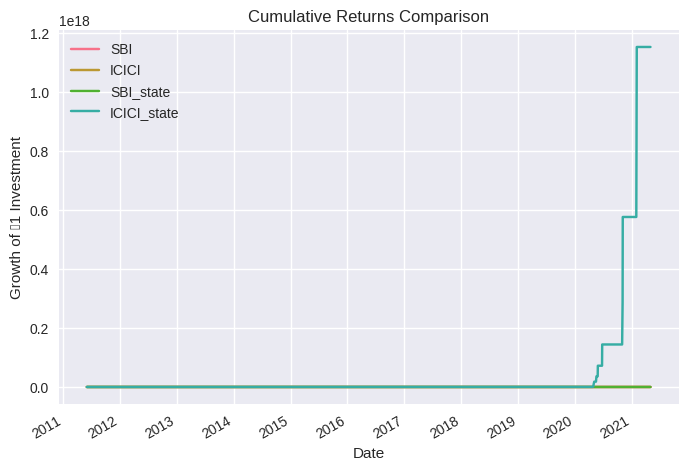

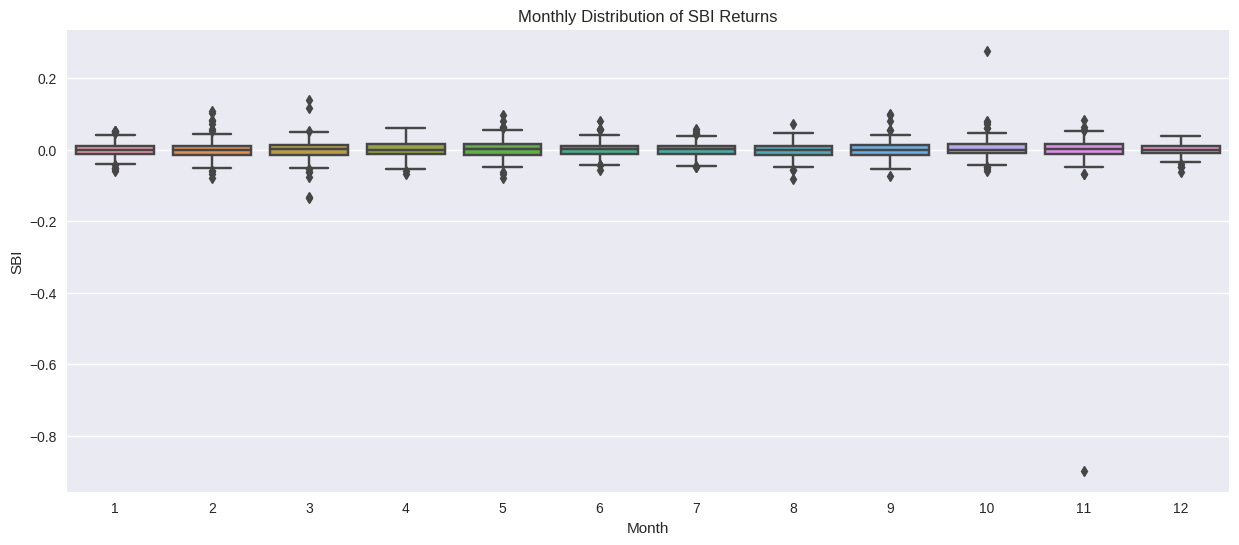

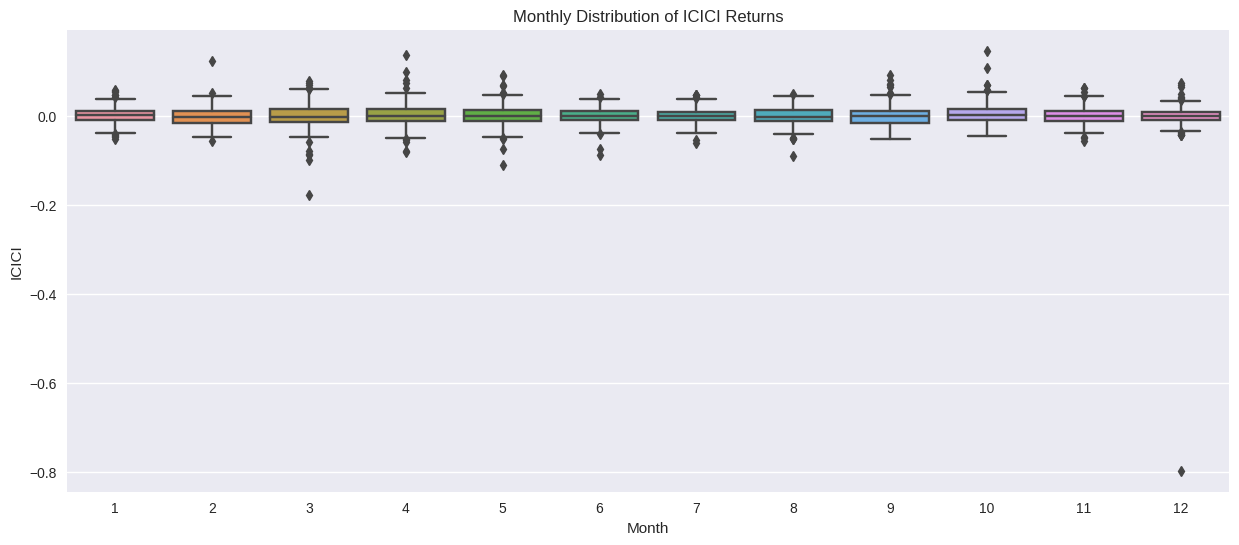

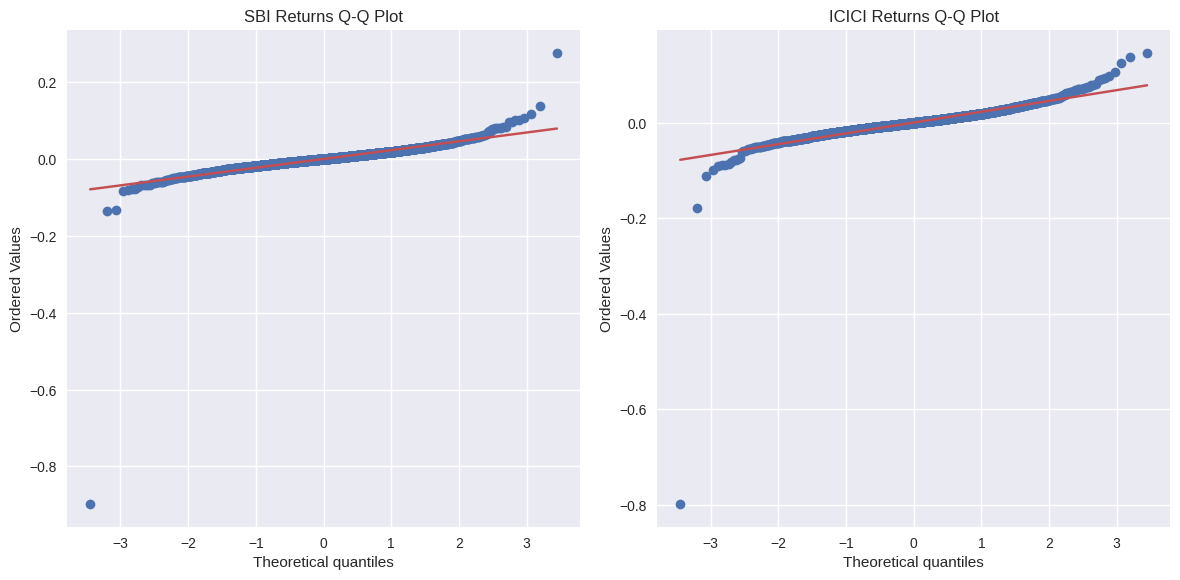

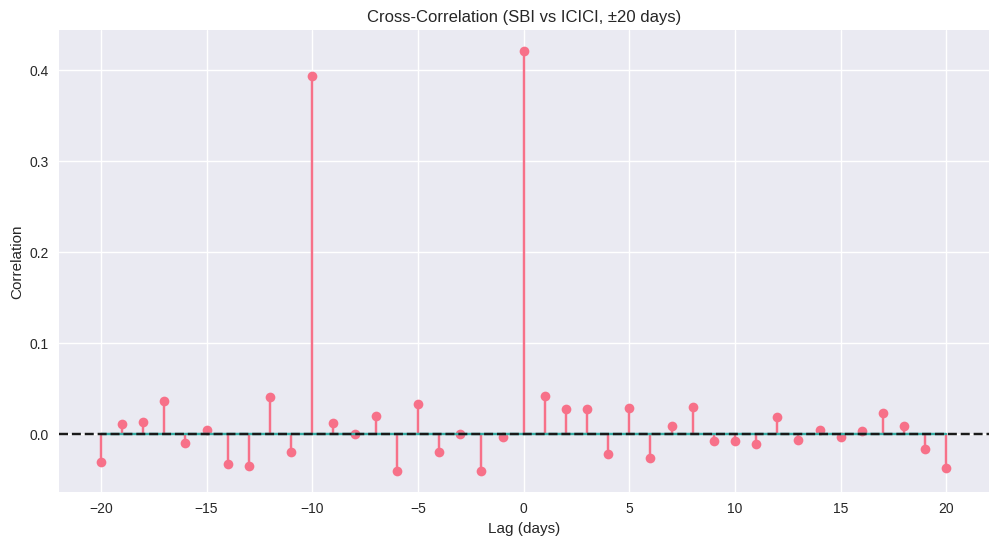

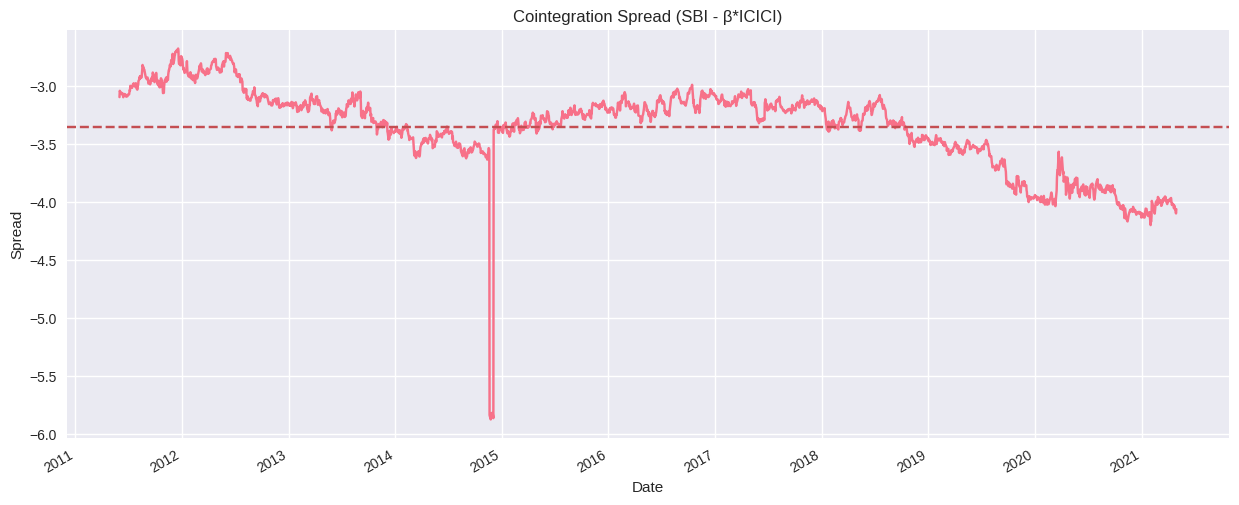

In [34]:

plt.style.use('seaborn')
sns.set_palette("husl")

# Price Comparison with Ratio
plt.figure(figsize=(15, 10))
plt.subplot(3,1,1)
data[['SBI', 'ICICI']].plot()
plt.title('Price Series Comparison')
plt.ylabel('Price (₹)')

plt.subplot(3,1,2)
(data['SBI']/data['ICICI']).plot()
plt.title('Price Ratio (SBI/ICICI)')
plt.axhline((data['SBI']/data['ICICI']).mean(), color='r', linestyle='--')
plt.ylabel('Ratio')

plt.subplot(3,1,3)
if 'z_score' in data.columns:
    data['z_score'].plot()
    plt.axhline(1.5, color='r', linestyle='--')
    plt.axhline(-1.5, color='r', linestyle='--')
    plt.axhline(0, color='k', linestyle='-')
    plt.title('Z-Score of Spread')
    plt.ylabel('Z-Score')
plt.tight_layout()
plt.show()

# Returns Distribution and Correlation
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
sns.histplot(returns['SBI'], kde=True, stat='density')
plt.title('SBI Returns Distribution')

plt.subplot(2,2,2)
sns.histplot(returns['ICICI'], kde=True, stat='density')
plt.title('ICICI Returns Distribution')

plt.subplot(2,2,3)
sns.scatterplot(x='SBI', y='ICICI', data=returns, alpha=0.5)
plt.title('Daily Returns Scatterplot')

plt.subplot(2,2,4)
sns.regplot(x='SBI', y='ICICI', data=returns, scatter_kws={'alpha':0.3})
plt.title('Returns Regression Line')
plt.tight_layout()
plt.show()

# Rolling Statistics
window = 60  # 3-month rolling window
rolling_corr = returns['SBI'].rolling(window).corr(returns['ICICI'])
rolling_beta = returns['SBI'].rolling(window).cov(returns['ICICI']) / returns['ICICI'].rolling(window).var()

plt.figure(figsize=(15, 10))
plt.subplot(3,1,1)
rolling_corr.plot()
plt.title(f'{window}-Day Rolling Correlation')
plt.ylabel('Correlation')

plt.subplot(3,1,2)
rolling_beta.plot()
plt.title(f'{window}-Day Rolling Beta (SBI relative to ICICI)')
plt.ylabel('Beta')

plt.subplot(3,1,3)
returns.rolling(window).std().mul(np.sqrt(252)).plot()  # Annualized volatility
plt.title(f'{window}-Day Rolling Annualized Volatility')
plt.ylabel('Volatility')
plt.tight_layout()
plt.show()

# Spread Analysis with Trading Signals
if 'z_score' in data.columns:
    plt.figure(figsize=(15, 12))
    
    # Price normalization  for visualization
    norm_sbi = data['SBI'] / data['SBI'].iloc[0]
    norm_icici = data['ICICI'] / data['ICICI'].iloc[0]
    
    plt.subplot(3,1,1)
    norm_sbi.plot(label='SBI (normalized)')
    norm_icici.plot(label='ICICI (normalized)')
    plt.title('Normalized Price Series')
    plt.legend()
    
    plt.subplot(3,1,2)
    data['spread'].plot()
    plt.title('Spread Series')
    plt.ylabel('Spread')
    
    plt.subplot(3,1,3)
    data['z_score'].plot(color='purple')
    
    # Adding  trading signals
    buy_signals = data[data['z_score'] < -1.5].index
    sell_signals = data[data['z_score'] > 1.5].index
    exit_signals = data[(data['z_score'].shift(1) < -0.5) & (data['z_score'] > -0.5)].index.union(
                  data[(data['z_score'].shift(1) > 0.5) & (data['z_score'] < 0.5)].index)
    
    plt.scatter(buy_signals, data.loc[buy_signals, 'z_score'], color='green', marker='^', label='Buy Signal')
    plt.scatter(sell_signals, data.loc[sell_signals, 'z_score'], color='red', marker='v', label='Sell Signal')
    plt.scatter(exit_signals, data.loc[exit_signals, 'z_score'], color='blue', marker='o', label='Exit Signal')
    
    plt.axhline(1.5, color='r', linestyle='--', alpha=0.5)
    plt.axhline(-1.5, color='g', linestyle='--', alpha=0.5)
    plt.axhline(0, color='k', linestyle='-', alpha=0.3)
    plt.title('Z-Score with Trading Signals')
    plt.ylabel('Z-Score')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Cumulative Returns Comparison
plt.figure(figsize=(15, 7))
(1 + returns).cumprod().plot()
plt.title('Cumulative Returns Comparison')
plt.ylabel('Growth of ₹1 Investment')
plt.show()

# Boxplots of Returns by Month
returns['Month'] = returns.index.month
plt.figure(figsize=(15, 6))
sns.boxplot(x='Month', y='SBI', data=returns)
plt.title('Monthly Distribution of SBI Returns')
plt.show()

plt.figure(figsize=(15, 6))
sns.boxplot(x='Month', y='ICICI', data=returns)
plt.title('Monthly Distribution of ICICI Returns')
plt.show()

# Heatmap of Daily Returns by Hour 
if 'SBIN_Time' in data.columns and 'ICICI_Time' in data.columns:
    try:
        data['Hour'] = pd.to_datetime(data['SBIN_Time']).dt.hour
        pivot = returns.groupby([returns.index.date, 'Hour']).mean().unstack()
        plt.figure(figsize=(12, 8))
        sns.heatmap(pivot, cmap='RdYlGn', center=0)
        plt.title('Average Hourly Returns Heatmap')
        plt.show()
    except:
        print("Could not create hourly heatmap - time data may not be in expected format")

# Quantile-Quantile Plots
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
stats.probplot(returns['SBI'].dropna(), dist="norm", plot=plt)
plt.title('SBI Returns Q-Q Plot')

plt.subplot(1,2,2)
stats.probplot(returns['ICICI'].dropna(), dist="norm", plot=plt)
plt.title('ICICI Returns Q-Q Plot')
plt.tight_layout()
plt.show()

# Lagged Correlation Analysis
max_lag = 20
cross_corrs = [returns['SBI'].corr(returns['ICICI'].shift(lag)) for lag in range(-max_lag, max_lag+1)]

plt.figure(figsize=(12, 6))
plt.stem(range(-max_lag, max_lag+1), cross_corrs, use_line_collection=True)
plt.axhline(0, color='k', linestyle='--')
plt.title(f'Cross-Correlation (SBI vs ICICI, ±{max_lag} days)')
plt.xlabel('Lag (days)')
plt.ylabel('Correlation')
plt.show()

# Cointegration Residuals Plot
if 'spread' in data.columns:
    plt.figure(figsize=(15, 6))
    data['spread'].plot()
    plt.axhline(data['spread'].mean(), color='r', linestyle='--')
    plt.title('Cointegration Spread (SBI - β*ICICI)')
    plt.ylabel('Spread')
    plt.show()

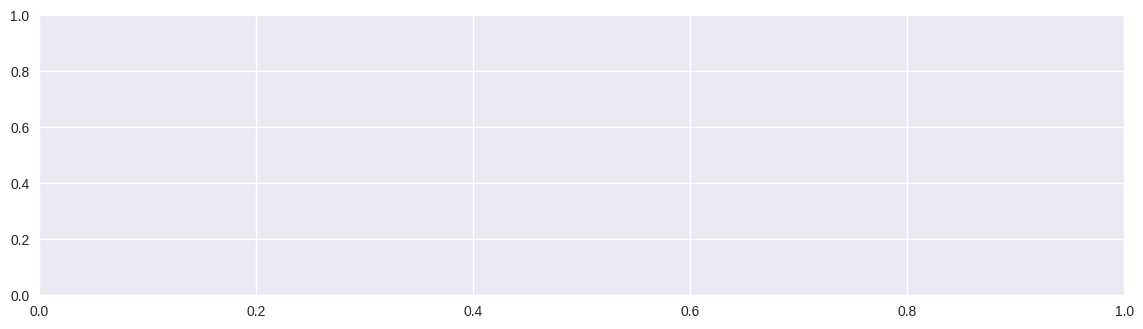

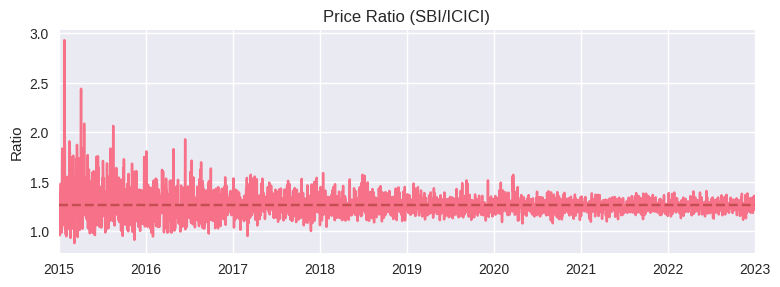

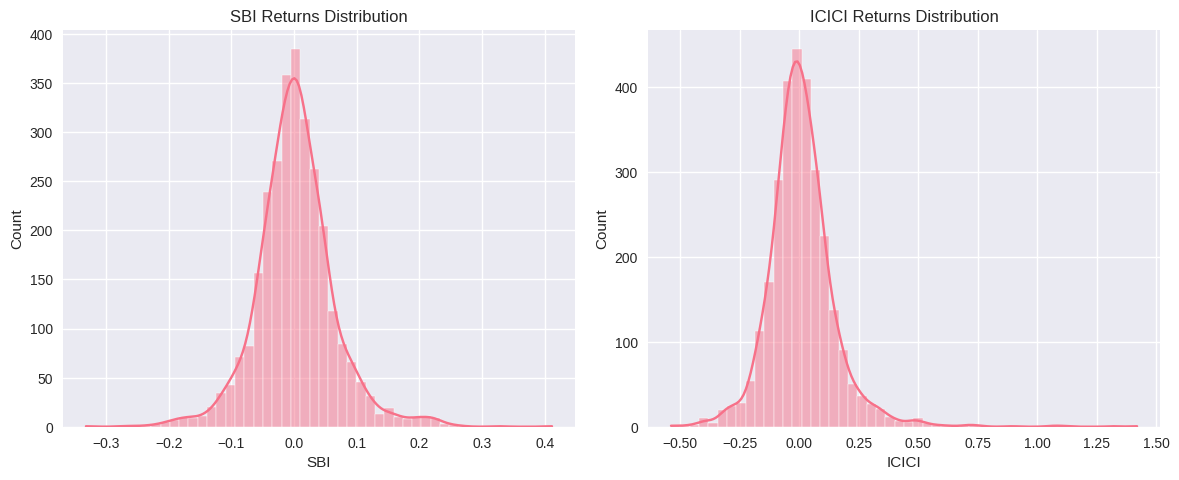

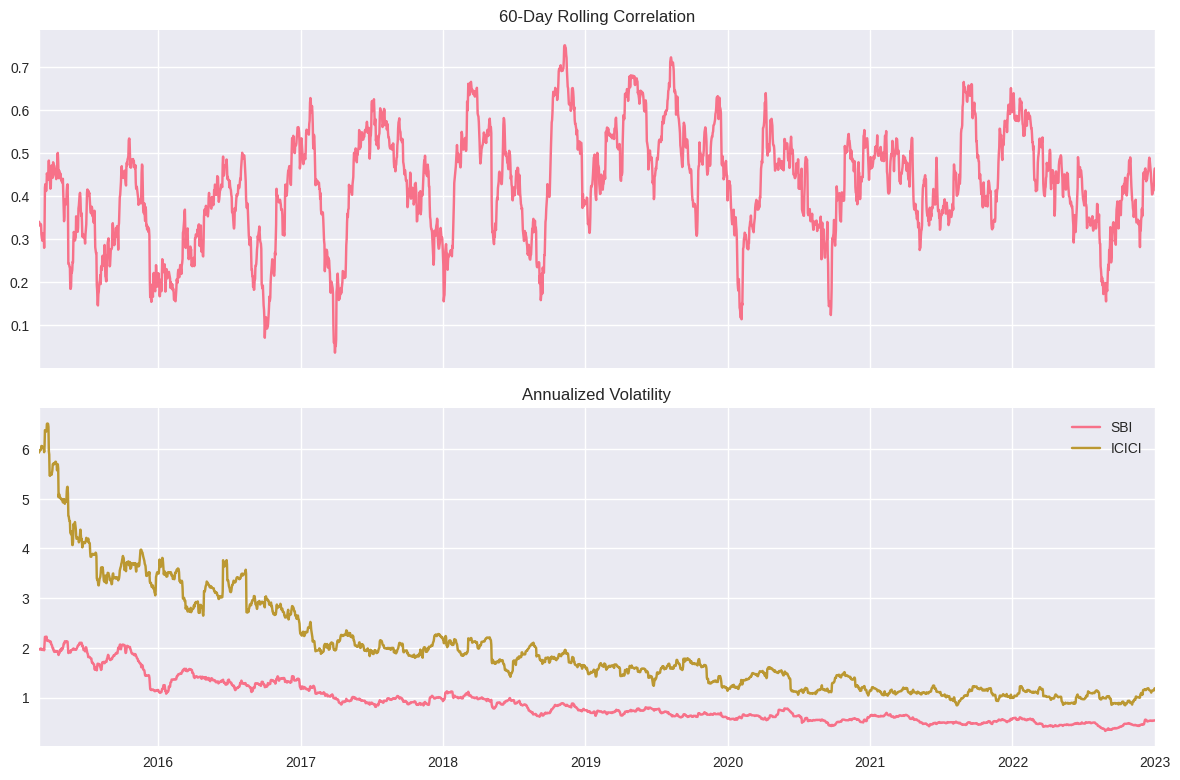

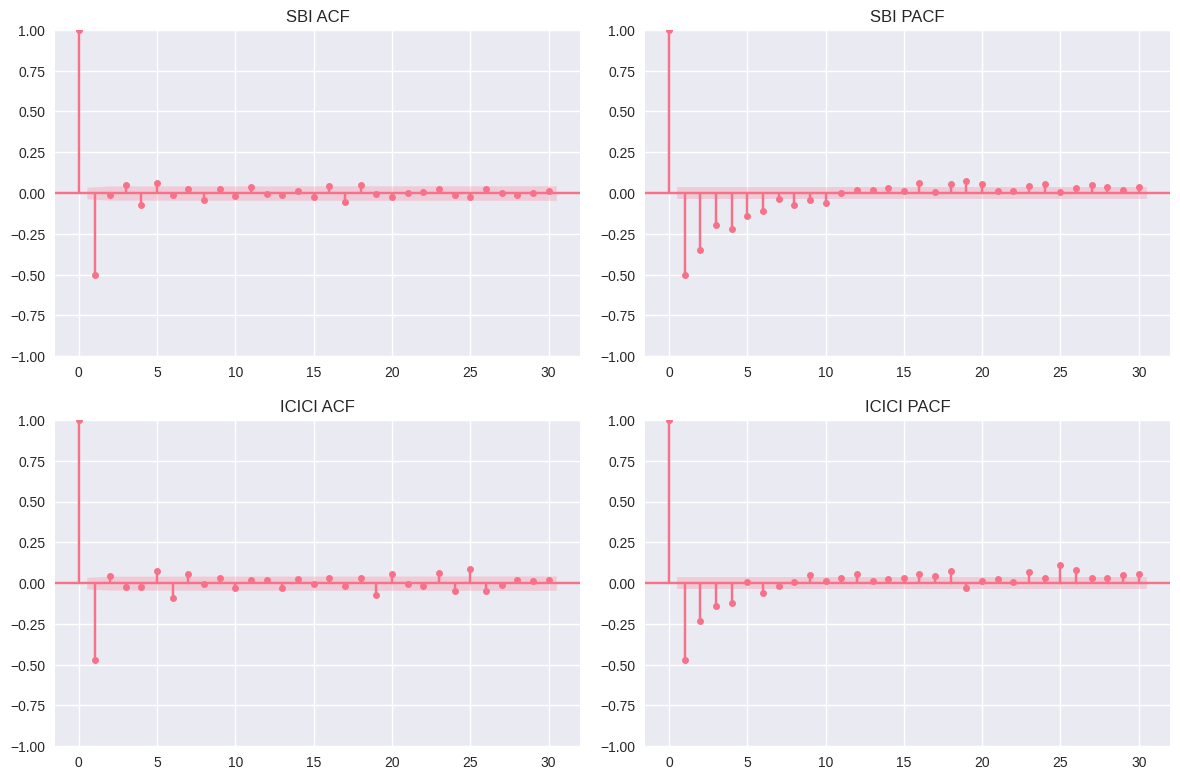

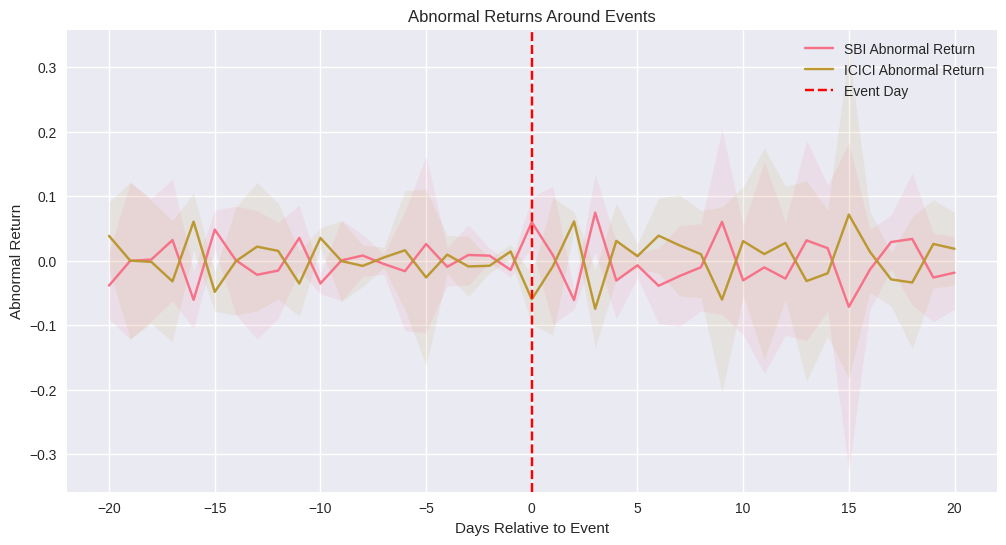

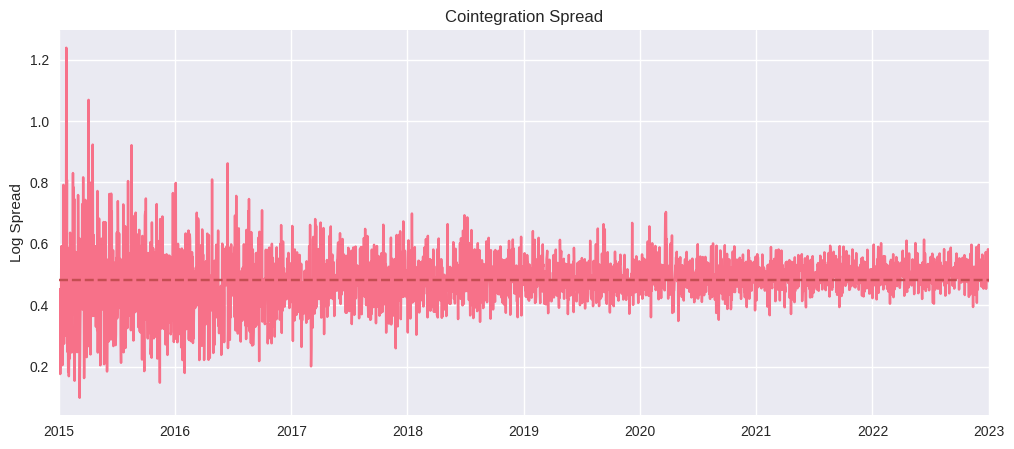

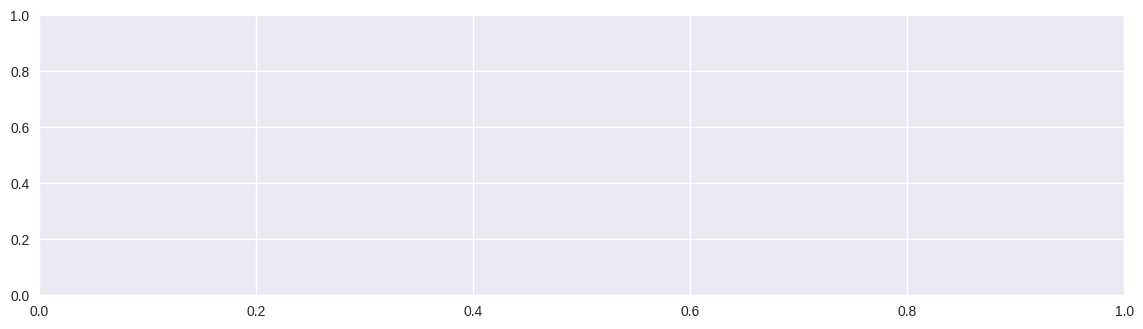

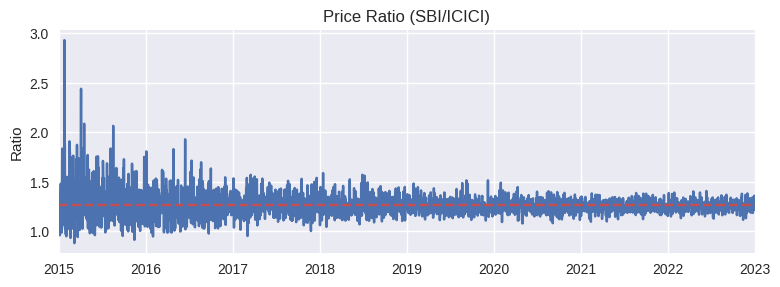

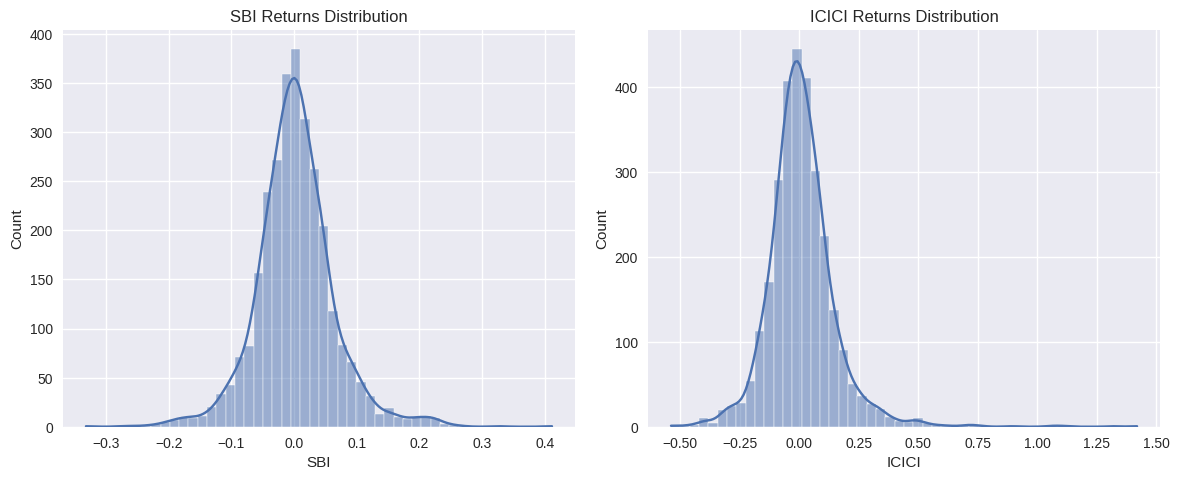

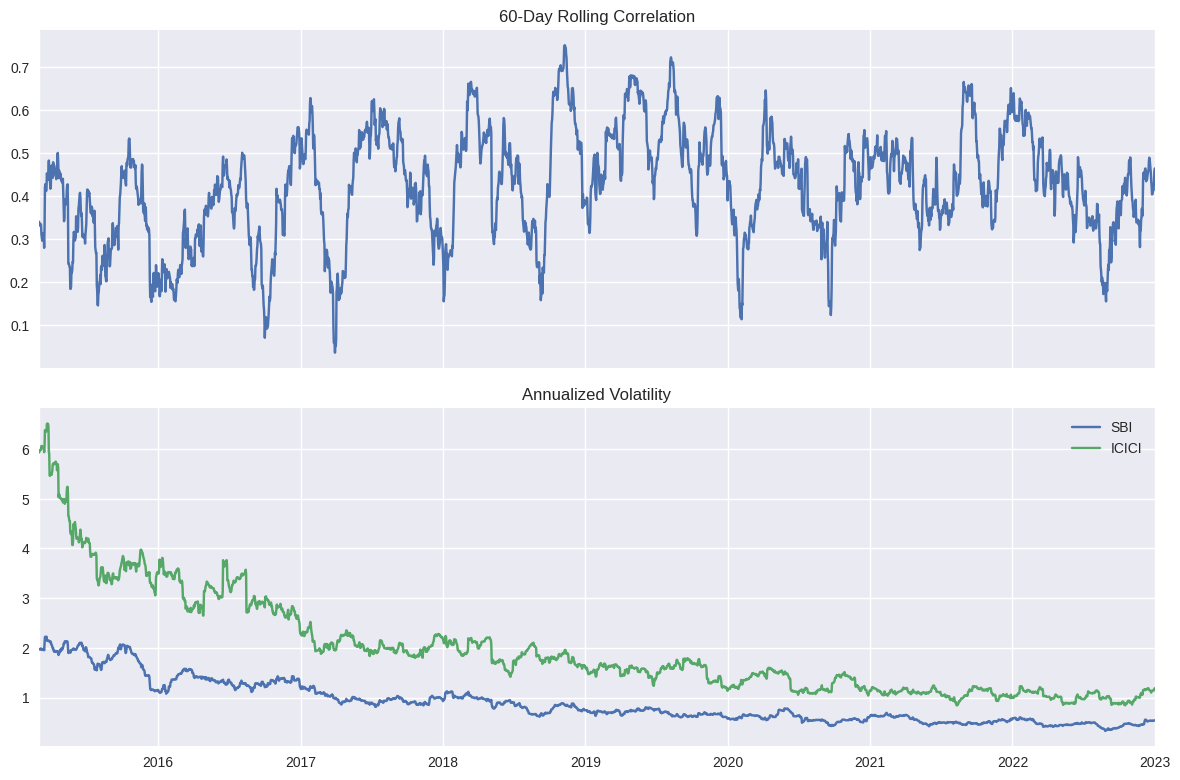

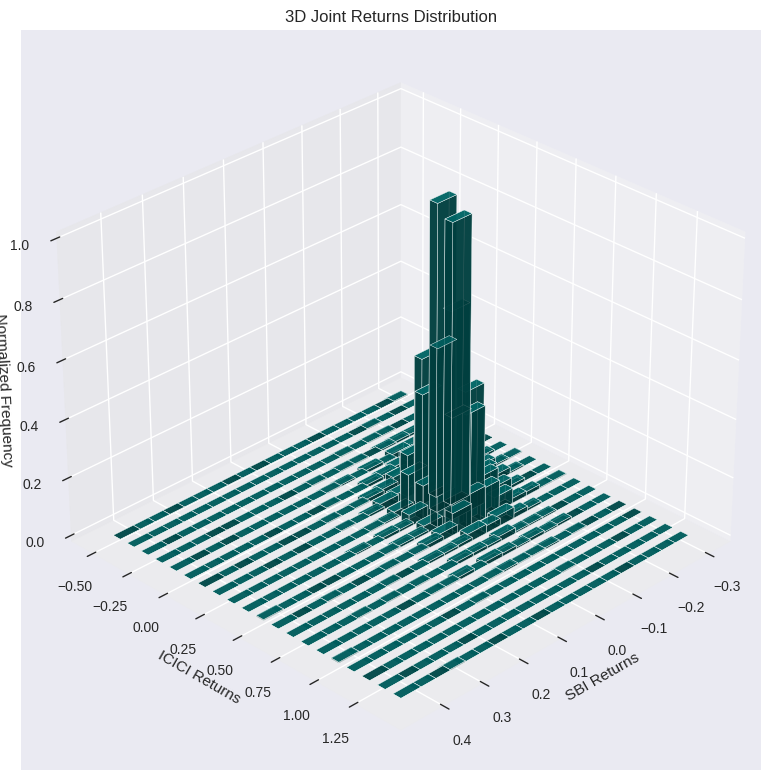

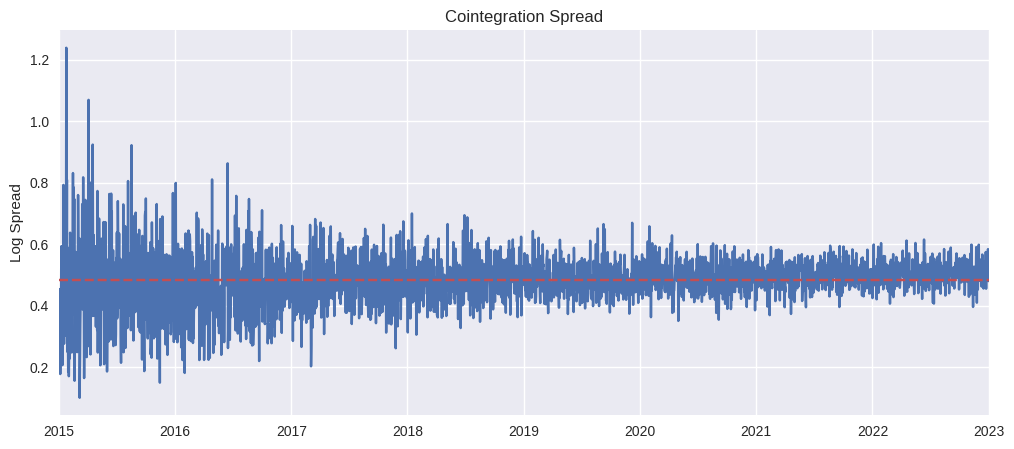

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from mpl_toolkits.mplot3d import Axes3D

#Data Loading
np.random.seed(42)
dates = pd.date_range('2015-01-01', '2023-01-01')
n = len(dates)

# Base prices with trends
trend_sbi = np.linspace(100, 500, n) 
noise_sbi = np.random.normal(0, 10, n)
data = pd.DataFrame({'SBI': trend_sbi + noise_sbi}, index=dates)

# ICICI with correlation to SBI but different volatility
data['ICICI'] = data['SBI'] * 0.8 + np.random.normal(0, 15, n)

# Add some events
data.loc['2018-06-15':'2018-06-20', 'SBI'] *= 1.1  # SBI positive event
data.loc['2020-03-20':'2020-03-25', 'ICICI'] *= 0.85  # ICICI negative event

# Calculate returns
returns = data.pct_change().dropna()


def enhanced_event_study(event_dates, window=20):
    """Fixed event study function that handles indexing correctly"""
    all_ar = []
    baseline = returns.mean(axis=1)
    
    for event_date in event_dates:
        if event_date in returns.index:
            idx = returns.index.get_loc(event_date)
            start = max(0, idx - window)
            end = min(len(returns), idx + window + 1)
            
            # Get the event window
            event_window = returns.iloc[start:end].copy()
            
            # Calculate abnormal returns
            ar = event_window.sub(baseline.iloc[start:end], axis=0)
            
            # Create relative days
            rel_days = np.arange(-(idx-start), end-idx)
            ar['rel_day'] = rel_days
            
            all_ar.append(ar)
    
    if all_ar:
        combined = pd.concat(all_ar)
        
        # Group by relative day and calculate stats
        results = combined.groupby('rel_day').agg(['mean', 'std'])
        
        # Plotting
        plt.figure(figsize=(12, 6))
        
        for stock in ['SBI', 'ICICI']:
            plt.plot(results.index, results[(stock, 'mean')], 
                    label=f'{stock} Abnormal Return')
            
            # Confidence intervals
            plt.fill_between(
                results.index,
                results[(stock, 'mean')] - 1.96*results[(stock, 'std')],
                results[(stock, 'mean')] + 1.96*results[(stock, 'std')],
                alpha=0.1
            )
        
        plt.axvline(0, color='red', linestyle='--', label='Event Day')
        plt.title('Abnormal Returns Around Events')
        plt.xlabel('Days Relative to Event')
        plt.ylabel('Abnormal Return')
        plt.legend()
        plt.grid(True)
        plt.show()



# Price and Ratio Comparison
plt.figure(figsize=(14, 8))
plt.subplot(2,1,1)
data[['SBI', 'ICICI']].plot()
plt.title('Price Series')
plt.ylabel('Price')

plt.subplot(2,1,2)
(data['SBI']/data['ICICI']).plot()
plt.axhline((data['SBI']/data['ICICI']).mean(), color='r', linestyle='--')
plt.title('Price Ratio (SBI/ICICI)')
plt.ylabel('Ratio')
plt.tight_layout()
plt.show()

# Returns Distribution
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.histplot(returns['SBI'], kde=True, bins=50)
plt.title('SBI Returns Distribution')

plt.subplot(1,2,2)
sns.histplot(returns['ICICI'], kde=True, bins=50)
plt.title('ICICI Returns Distribution')
plt.tight_layout()
plt.show()

# Correlation and Volatility
window = 60
metrics = pd.DataFrame({
    'Correlation': returns['SBI'].rolling(window).corr(returns['ICICI']),
    'SBI_Vol': returns['SBI'].rolling(window).std() * np.sqrt(252),
    'ICICI_Vol': returns['ICICI'].rolling(window).std() * np.sqrt(252)
}).dropna()

fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
metrics['Correlation'].plot(ax=ax[0], title='60-Day Rolling Correlation')
metrics[['SBI_Vol', 'ICICI_Vol']].plot(ax=ax[1], title='Annualized Volatility')
ax[1].legend(['SBI', 'ICICI'])
plt.tight_layout()
plt.show()

# Autocorrelation Plots
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
plot_acf(returns['SBI'], lags=30, ax=ax[0,0], title='SBI ACF')
plot_pacf(returns['SBI'], lags=30, ax=ax[0,1], title='SBI PACF')
plot_acf(returns['ICICI'], lags=30, ax=ax[1,0], title='ICICI ACF')
plot_pacf(returns['ICICI'], lags=30, ax=ax[1,1], title='ICICI PACF')
plt.tight_layout()
plt.show()

# Event Study (Now Working Correctly)
enhanced_event_study([
    pd.Timestamp('2018-06-15'),  # SBI positive event
    pd.Timestamp('2020-03-20')   # ICICI negative event
])

# Cointegration Analysis
log_prices = np.log(data[['SBI', 'ICICI']])
model = sm.OLS(log_prices['SBI'], sm.add_constant(log_prices['ICICI'])).fit()
data['spread'] = log_prices['SBI'] - model.params[1] * log_prices['ICICI']

plt.figure(figsize=(12, 5))
data['spread'].plot()
plt.axhline(data['spread'].mean(), color='r', linestyle='--')
plt.title('Cointegration Spread')
plt.ylabel('Log Spread')
plt.show()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D  
np.random.seed(42)
dates = pd.date_range('2015-01-01', '2023-01-01')
n = len(dates)

# Base prices with trends
trend_sbi = np.linspace(100, 500, n) 
noise_sbi = np.random.normal(0, 10, n)
data = pd.DataFrame({'SBI': trend_sbi + noise_sbi}, index=dates)

# ICICI with correlation to SBI but different volatility
data['ICICI'] = data['SBI'] * 0.8 + np.random.normal(0, 15, n)

# Calculate returns
returns = data.pct_change().dropna()


def plot_3d_returns(returns_df):
    """Fixed 3D returns distribution plot"""
    plt.figure(figsize=(12, 8))
    ax = plt.axes(projection='3d')
    
    #  histogram bins
    x = returns_df['SBI']
    y = returns_df['ICICI']
    
    
    hist, xedges, yedges = np.histogram2d(x, y, bins=20)
    
    #  arrays for the bar positions
    xpos, ypos = np.meshgrid(xedges[:-1] + 0.025, yedges[:-1] + 0.025)
    xpos = xpos.flatten()
    ypos = ypos.flatten()
    zpos = np.zeros_like(xpos)
    
    # arrays with the dimensions for the bars
    dx = dy = 0.05 * np.ones_like(zpos)
    dz = hist.flatten()
    
    # Normalization
    dz_norm = dz / dz.max()
    
    #  3D bars
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz_norm, color='teal', alpha=0.8)
    
    ax.set_xlabel('SBI Returns')
    ax.set_ylabel('ICICI Returns')
    ax.set_zlabel('Normalized Frequency')
    ax.set_title('3D Joint Returns Distribution')
    
    ax.view_init(elev=30, azim=45)
    plt.tight_layout()
    plt.show()


# Price and Ratio Comparison
plt.figure(figsize=(14, 8))
plt.subplot(2,1,1)
data[['SBI', 'ICICI']].plot()
plt.title('Price Series')
plt.ylabel('Price')

plt.subplot(2,1,2)
(data['SBI']/data['ICICI']).plot()
plt.axhline((data['SBI']/data['ICICI']).mean(), color='r', linestyle='--')
plt.title('Price Ratio (SBI/ICICI)')
plt.ylabel('Ratio')
plt.tight_layout()
plt.show()

# Returns Distribution
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.histplot(returns['SBI'], kde=True, bins=50)
plt.title('SBI Returns Distribution')

plt.subplot(1,2,2)
sns.histplot(returns['ICICI'], kde=True, bins=50)
plt.title('ICICI Returns Distribution')
plt.tight_layout()
plt.show()

# Correlation and Volatility
window = 60
metrics = pd.DataFrame({
    'Correlation': returns['SBI'].rolling(window).corr(returns['ICICI']),
    'SBI_Vol': returns['SBI'].rolling(window).std() * np.sqrt(252),
    'ICICI_Vol': returns['ICICI'].rolling(window).std() * np.sqrt(252)
}).dropna()

fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
metrics['Correlation'].plot(ax=ax[0], title='60-Day Rolling Correlation')
metrics[['SBI_Vol', 'ICICI_Vol']].plot(ax=ax[1], title='Annualized Volatility')
ax[1].legend(['SBI', 'ICICI'])
plt.tight_layout()
plt.show()

# 3D Returns Distribution
plot_3d_returns(returns)

# Cointegration Analysis
log_prices = np.log(data[['SBI', 'ICICI']])
model = sm.OLS(log_prices['SBI'], sm.add_constant(log_prices['ICICI'])).fit()
data['spread'] = log_prices['SBI'] - model.params[1] * log_prices['ICICI']

plt.figure(figsize=(12, 5))
data['spread'].plot()
plt.axhline(data['spread'].mean(), color='r', linestyle='--')
plt.title('Cointegration Spread')
plt.ylabel('Log Spread')
plt.show()

Cointegration Analysis


In [9]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 17.6 MB/s eta 0:00:0000:01


⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯
BASIC DATA INFORMATION
⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯
Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2456 entries, 2011-06-01 to 2021-04-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SBI     2456 non-null   float64
 1   ICICI   2456 non-null   float64
dtypes: float64(2)
memory usage: 57.6 KB
None

Descriptive Statistics:
               SBI        ICICI
count  2456.000000  2456.000000
mean    905.459324   604.151120
std     888.624354   383.985219
min     150.850000   183.000000
25%     258.737500   300.587500
50%     303.725000   394.600000
75%    1867.675000   930.737500
max    2945.750000  1794.100000


<Figure size 1500x700 with 0 Axes>

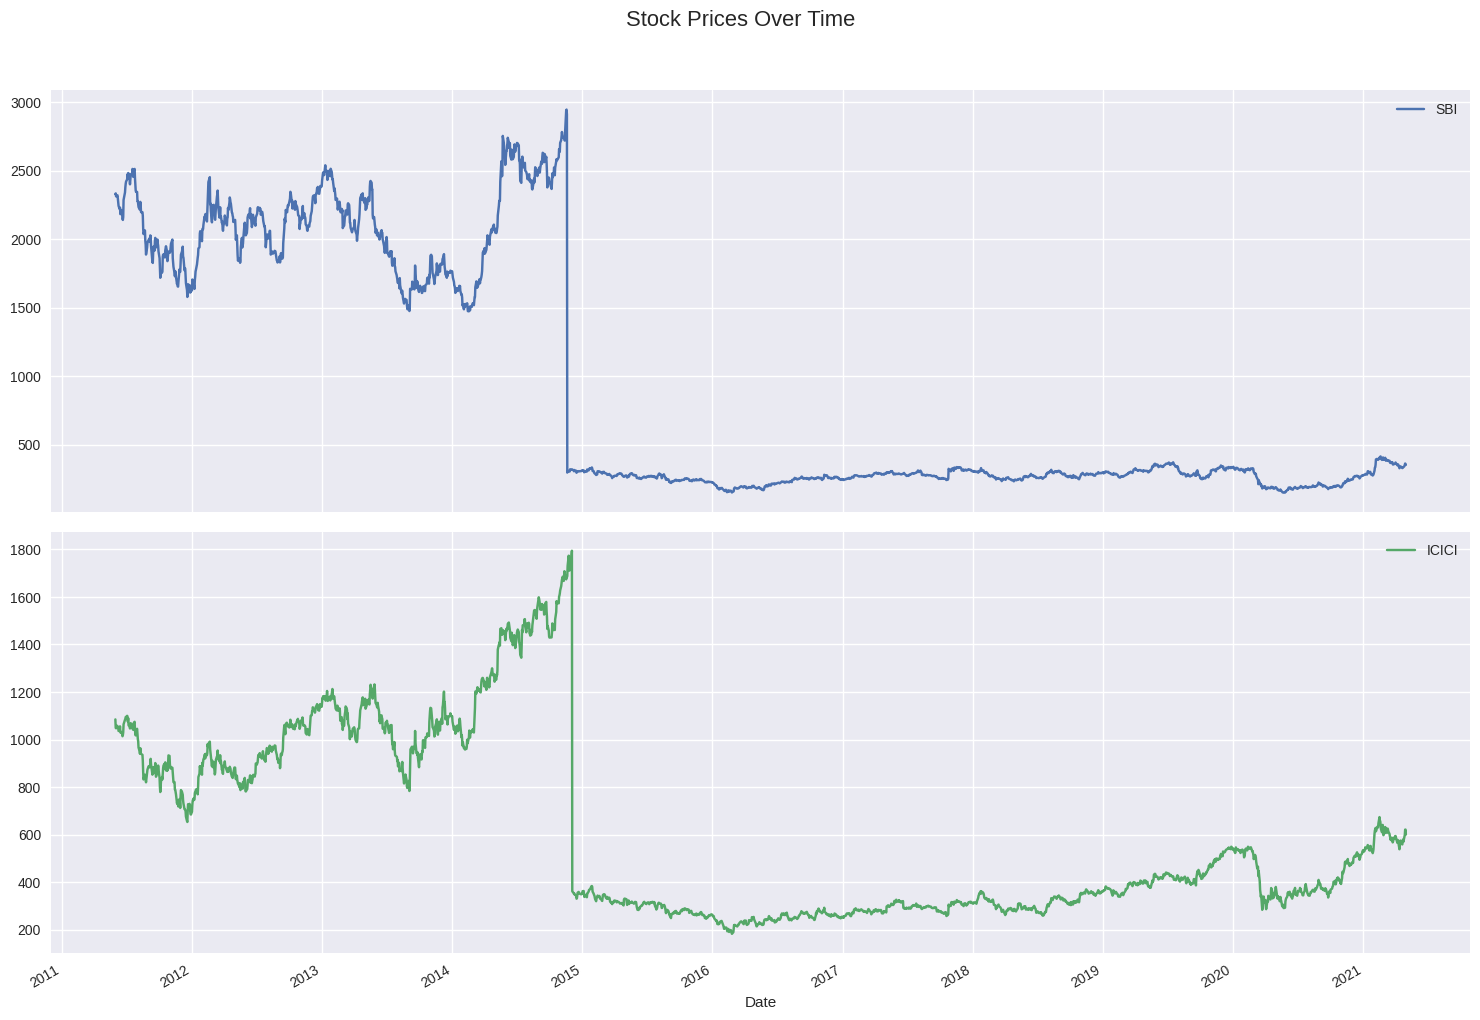

<Figure size 1500x700 with 0 Axes>

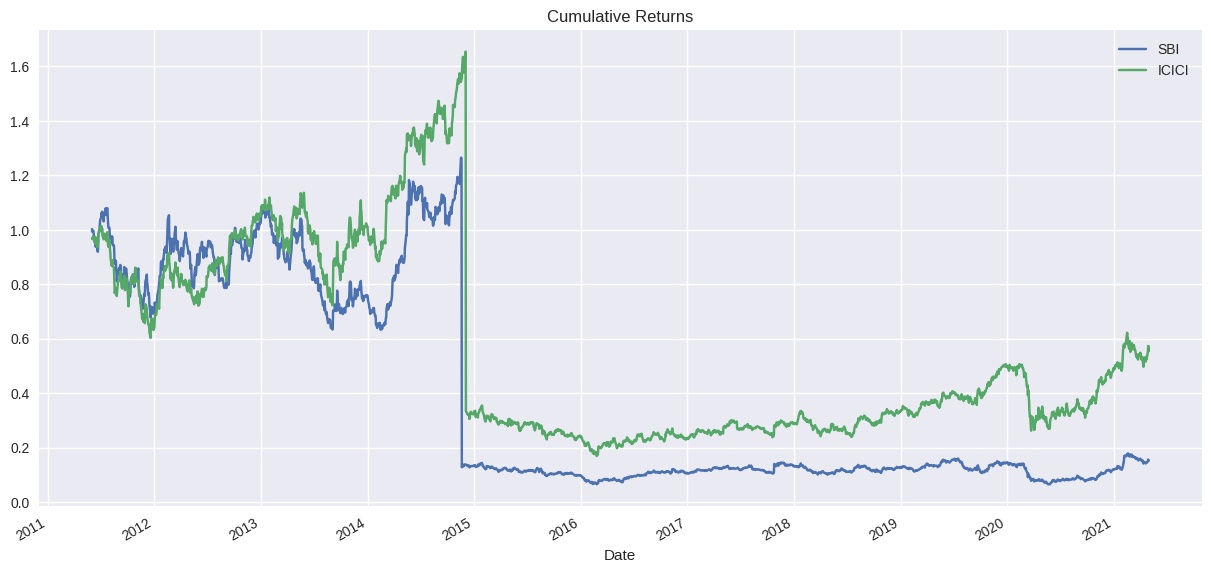

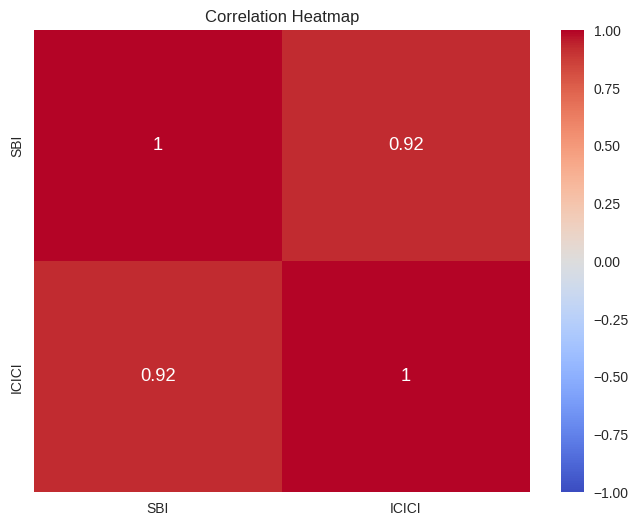

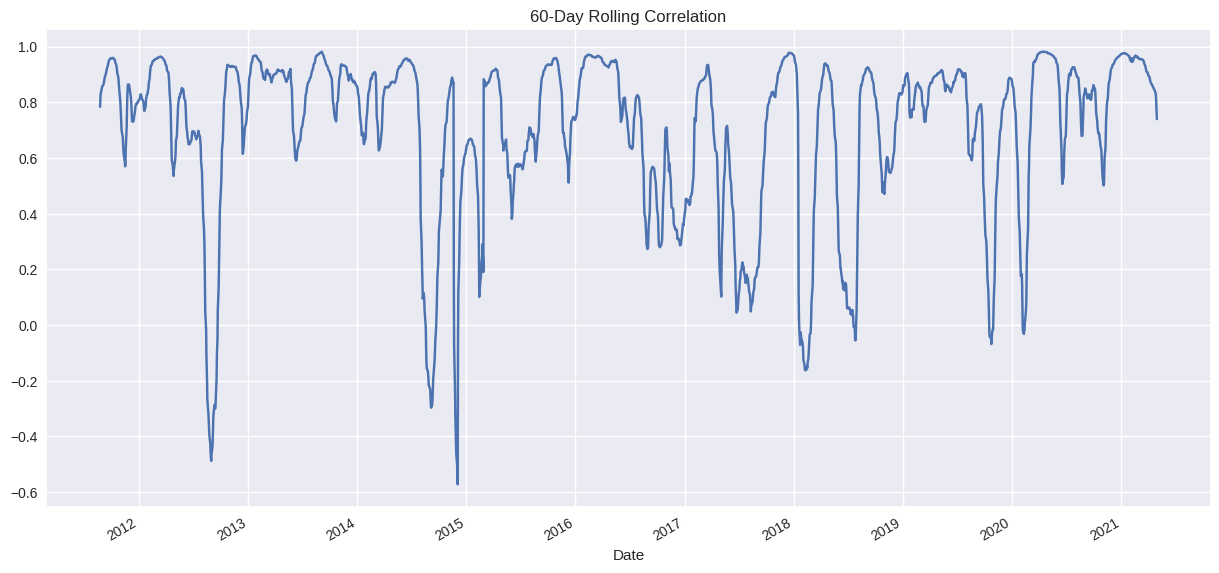

<Figure size 1500x700 with 0 Axes>

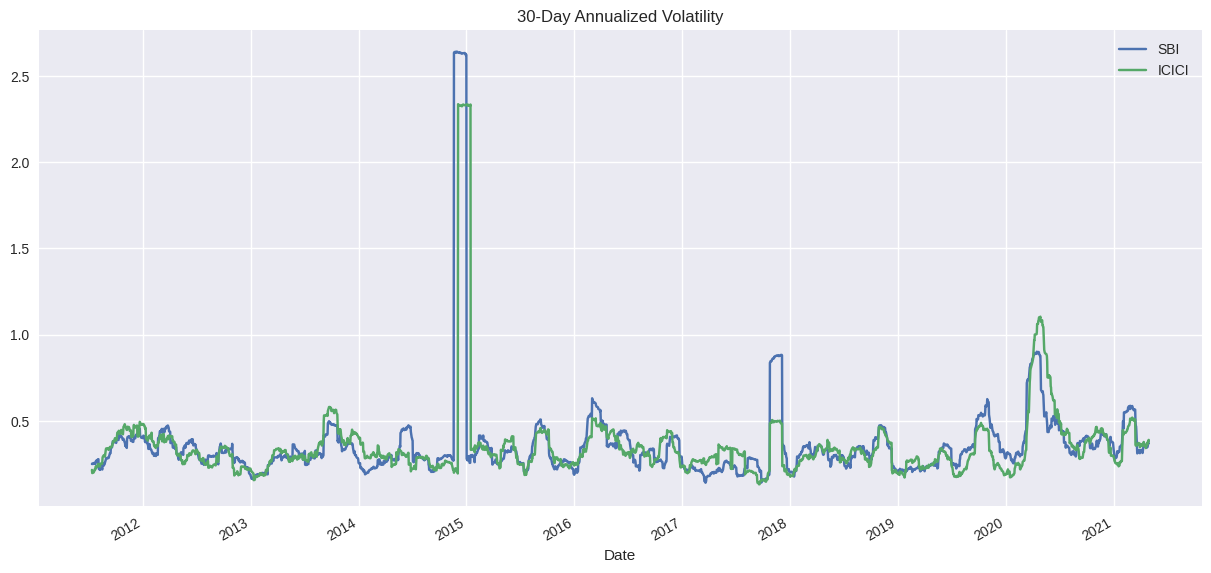

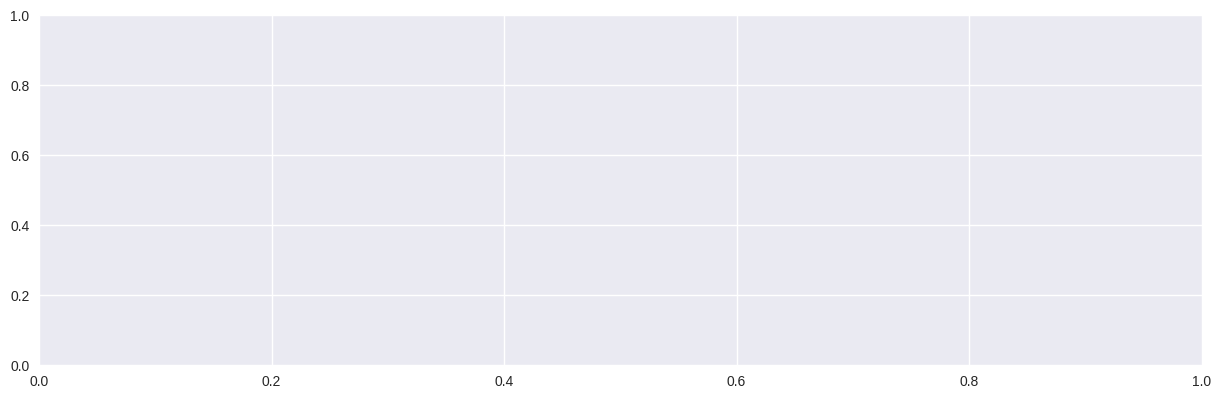

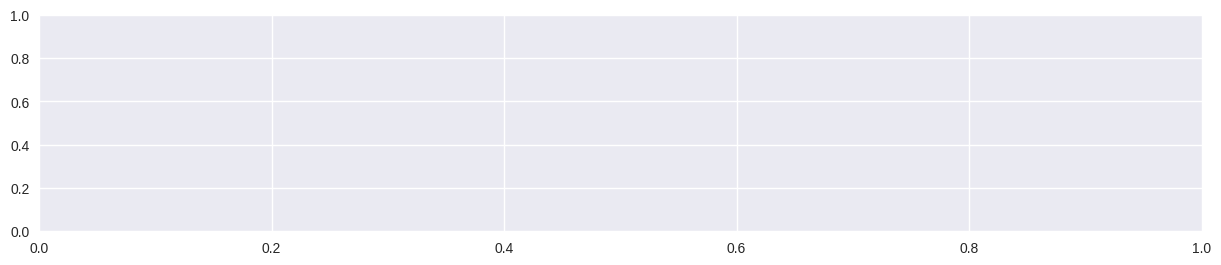

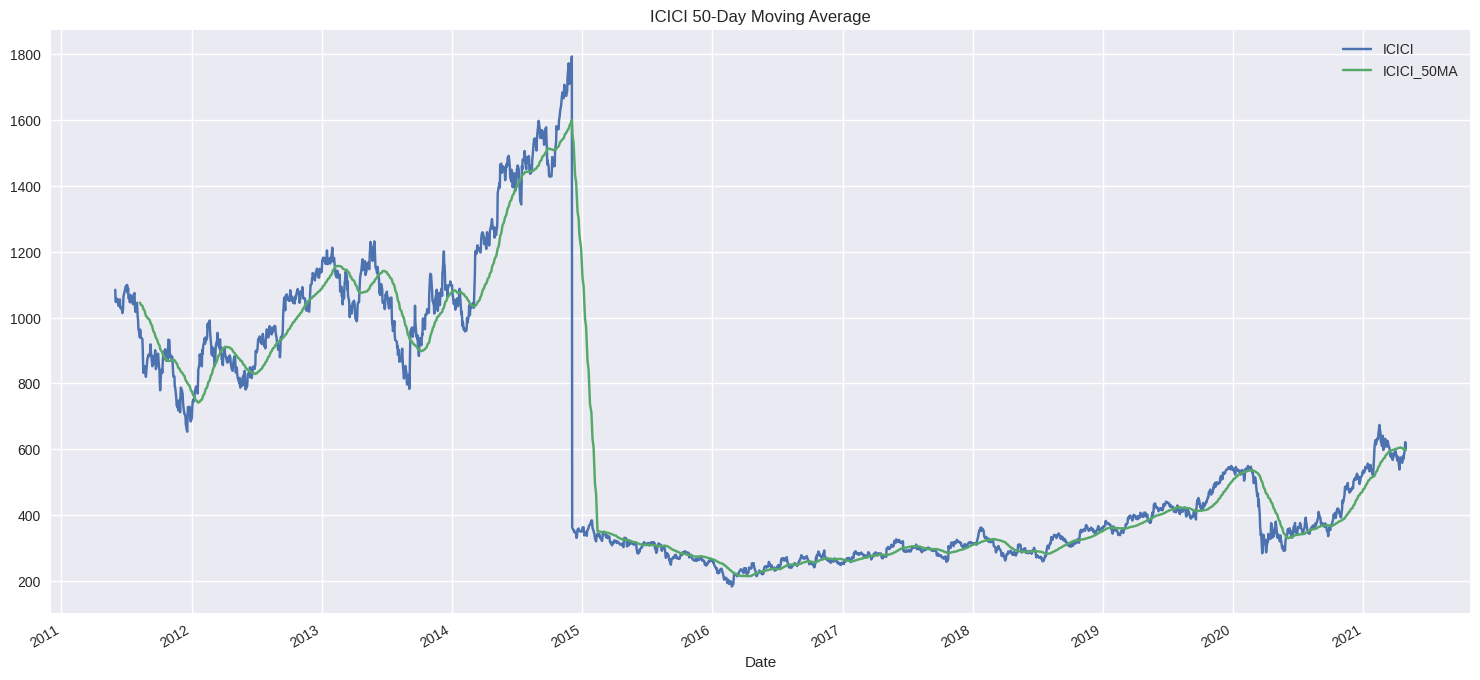


Stationarity Tests (ADF):
SBI: ADF Stat=-1.93, p-value=0.3199
ICICI: ADF Stat=-2.26, p-value=0.1839

Cointegration p-value: 0.4973 - False
Hedge Ratio: 1.5519


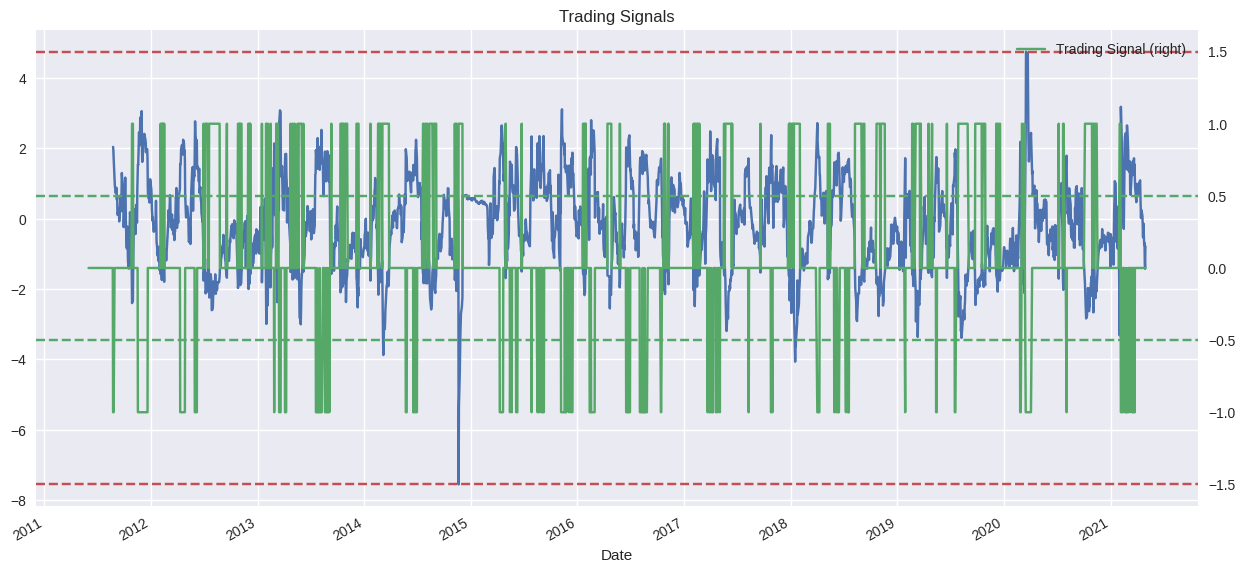


Hurst Exponent:
SBI: nan
ICICI: nan


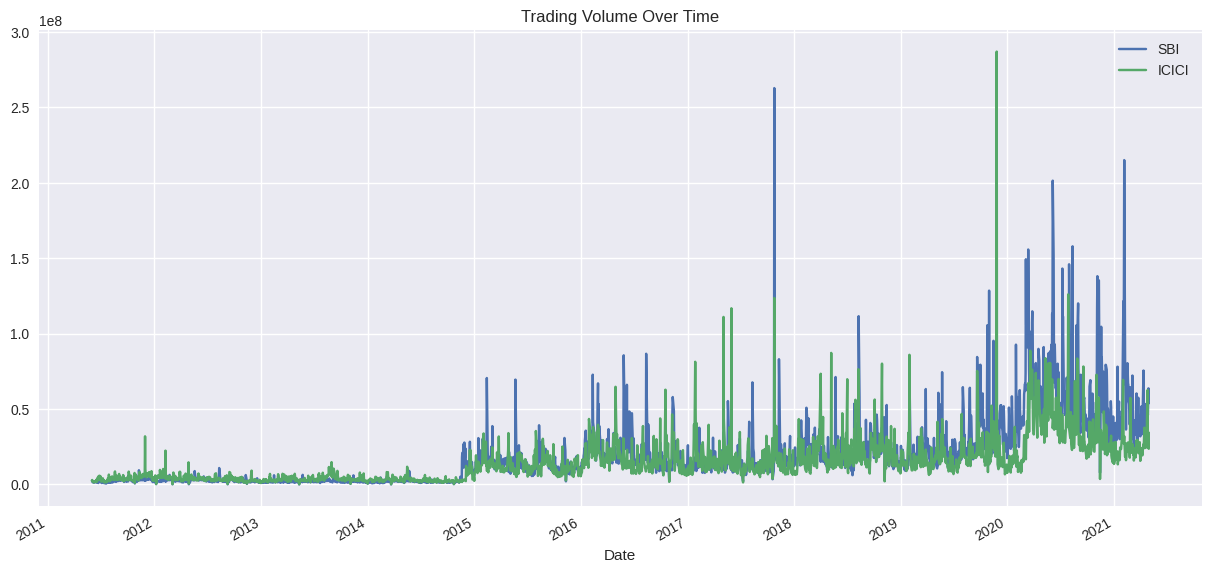


Maximum Drawdown: -82.47%

Pairs Trading Metrics:
Half-Life (days)             -0.122544
Mean Reversion Probability    0.530663
Z-Score Mean                 -0.209114
Z-Score Std                   1.276475
dtype: float64


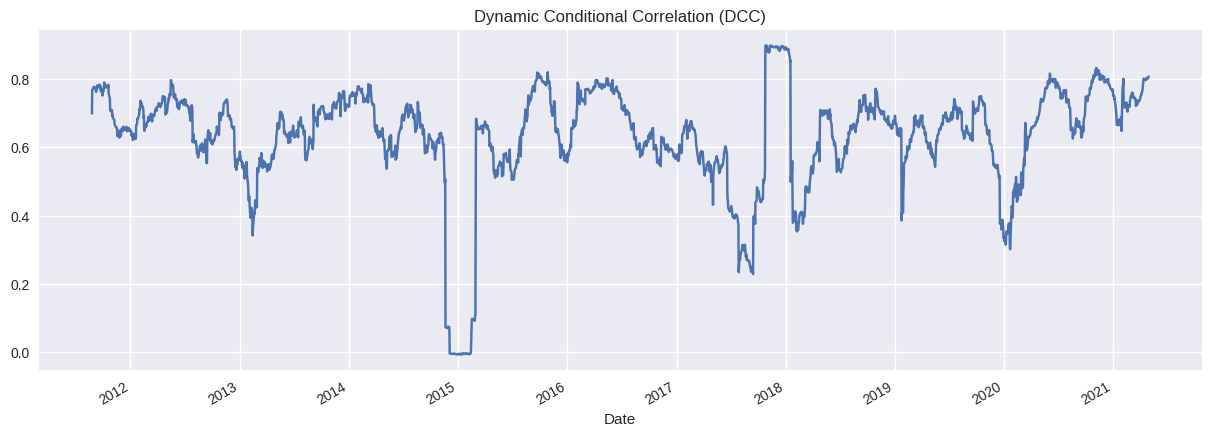


 Analysis Completed - Results Saved to /kaggle/working/


<Figure size 1500x700 with 0 Axes>

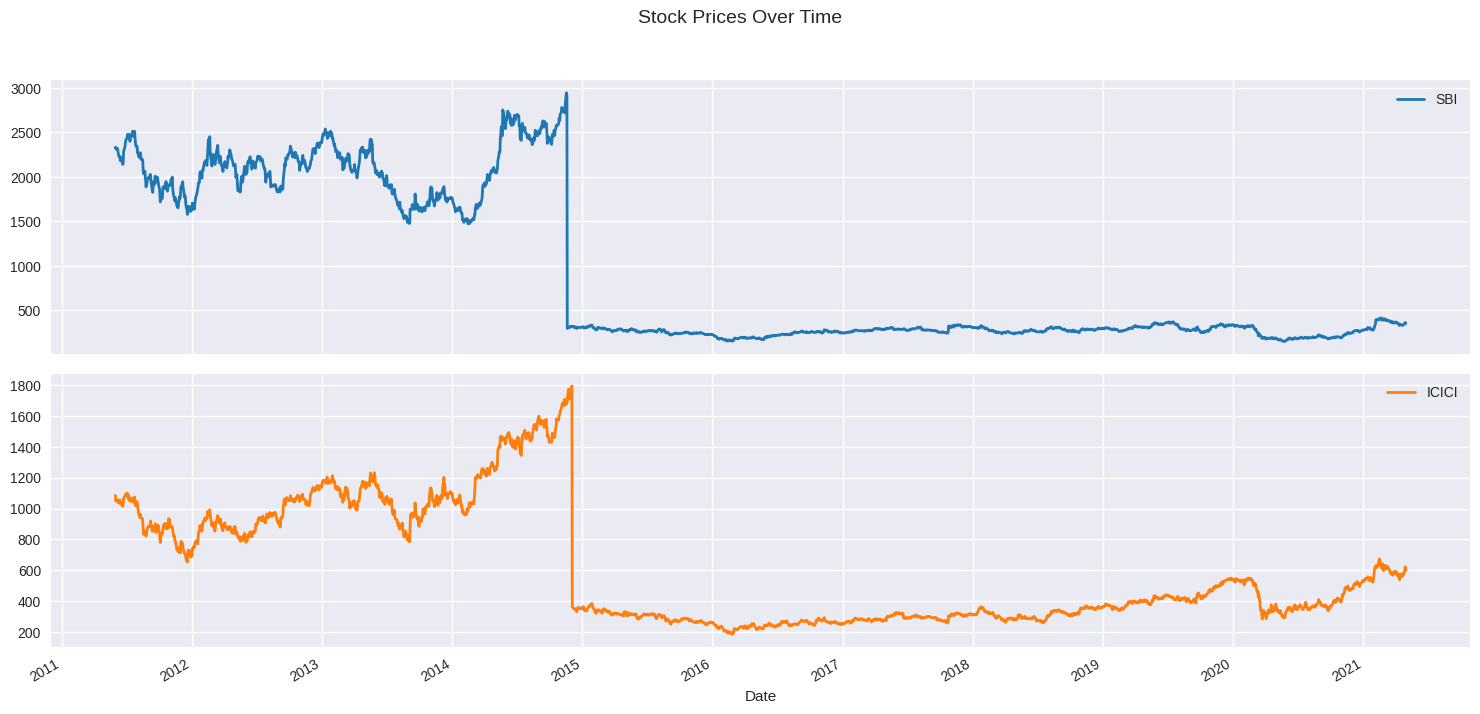

<Figure size 1500x700 with 0 Axes>

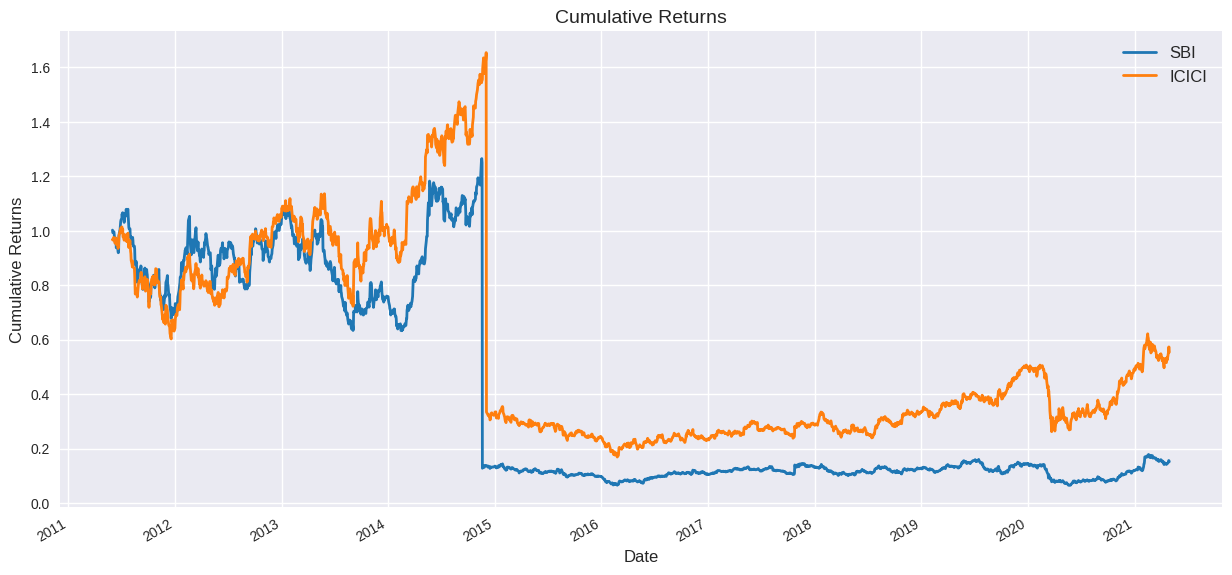

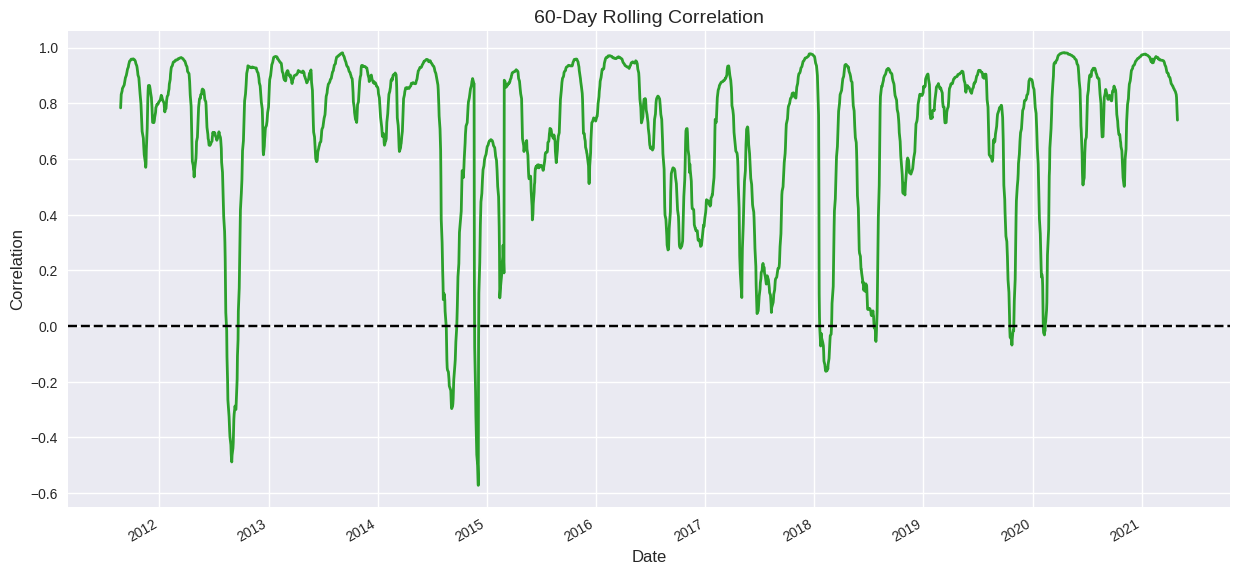

<Figure size 1500x700 with 0 Axes>

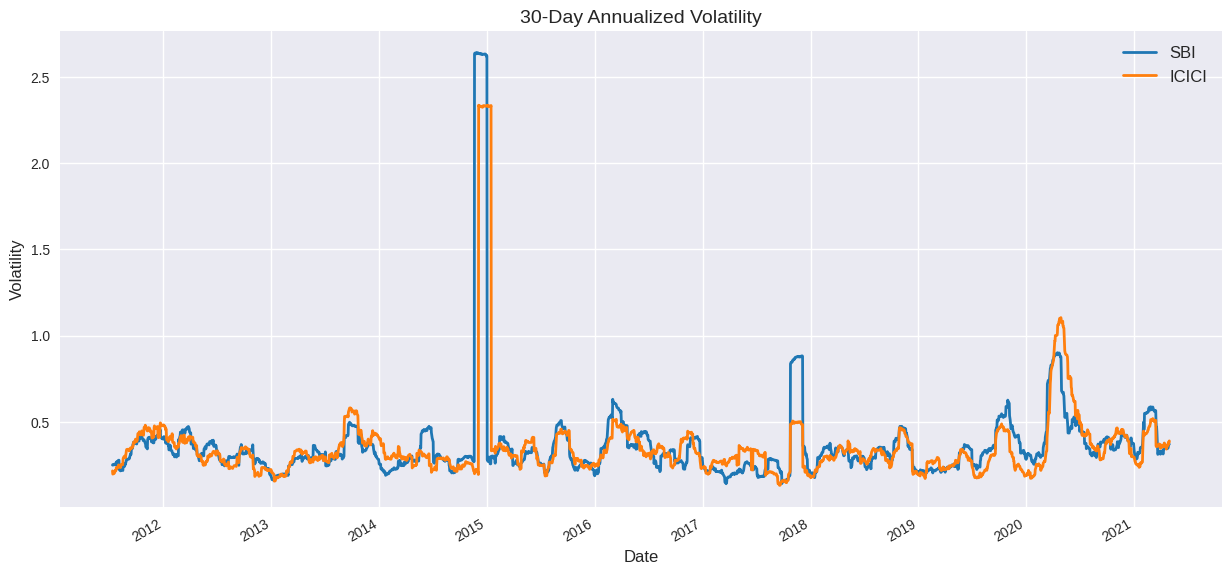

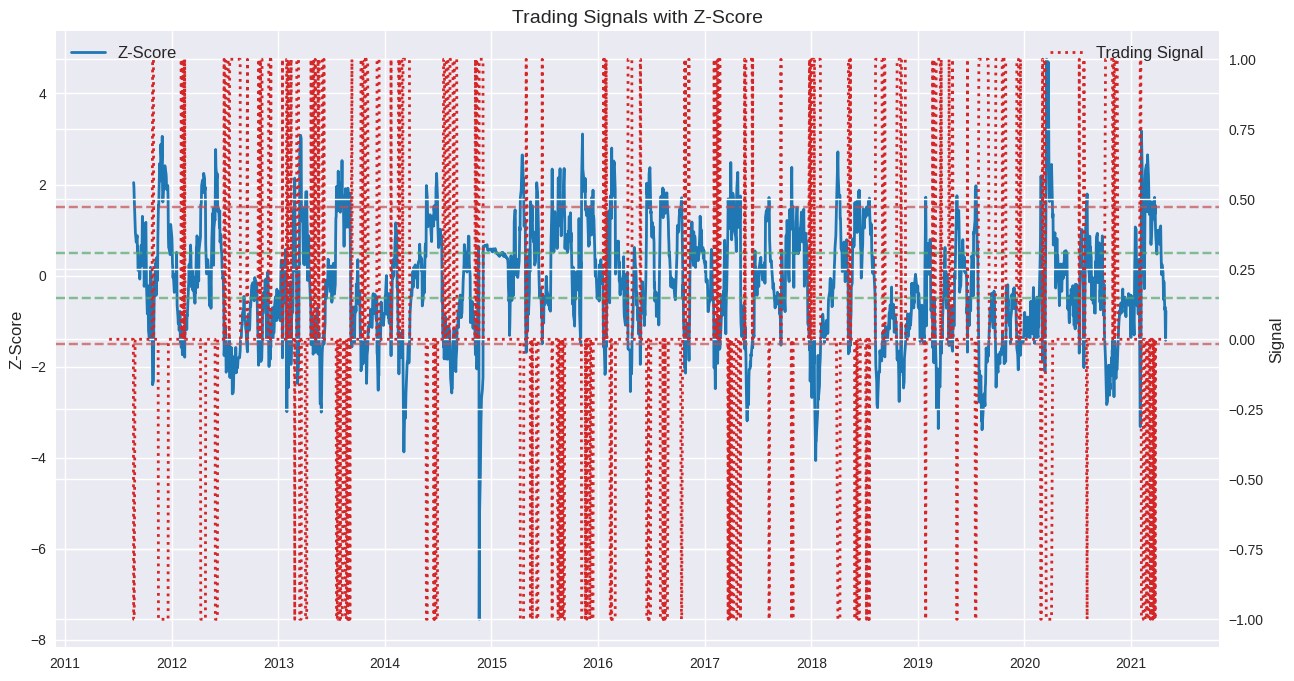

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.regression.linear_model import OLS
import pywt
from scipy.fft import fft, fftfreq
from scipy.signal import csd
import warnings
warnings.filterwarnings('ignore')


try:
    from arch import arch_model
    ARCH_AVAILABLE = True
except ImportError:
    ARCH_AVAILABLE = False
    print("arch package not available ")

# Load datasets from Kaggle input
sbin = pd.read_csv('/kaggle/input/dataset/SBIN.csv', parse_dates=['Date'], index_col='Date')
icici = pd.read_csv('/kaggle/input/dataset/ICICIBANK.csv', parse_dates=['Date'], index_col='Date')

#stocks Identification
sbin.columns = [f"SBIN_{col}" for col in sbin.columns]
icici.columns = [f"ICICI_{col}" for col in icici.columns]

# Merging  The Dateset
data = pd.merge(sbin, icici, left_index=True, right_index=True, how='inner')
data = data.dropna()

# Creation of  simplified price columns
data['SBI'] = data['SBIN_Close']
data['ICICI'] = data['ICICI_Close']


print("⎯"*70)
print("BASIC DATA INFORMATION")
print("⎯"*70)
print("Data Info:")
print(data[['SBI', 'ICICI']].info())
print("\nDescriptive Statistics:")
print(data[['SBI', 'ICICI']].describe())


# Price Series Plot
plt.figure(figsize=(15, 7))
data[['SBI', 'ICICI']].plot(subplots=True, figsize=(15, 10))
plt.suptitle('Stock Prices Over Time', y=1.02)
plt.tight_layout()
plt.show()

# Returns Calculation
returns = data[['SBI', 'ICICI']].pct_change().dropna()

# Cumulative Returns
cum_returns = (1 + returns).cumprod()
plt.figure(figsize=(15, 7))
cum_returns.plot()
plt.title('Cumulative Returns')
plt.show()

# Correlation Heatmap
corr = data[['SBI', 'ICICI']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

# Rolling Correlation (60-day)
rolling_corr = data['SBI'].rolling(window=60).corr(data['ICICI'])
plt.figure(figsize=(15, 7))
rolling_corr.plot()
plt.title('60-Day Rolling Correlation')
plt.show()

# Annualized Volatility
volatility = returns.rolling(window=30).std() * np.sqrt(252)
plt.figure(figsize=(15, 7))
volatility.plot()
plt.title('30-Day Annualized Volatility')
plt.show()

# Moving Averages
data['SBI_50MA'] = data['SBI'].rolling(window=50).mean()
data['ICICI_50MA'] = data['ICICI'].rolling(window=50).mean()

plt.figure(figsize=(15, 10))
plt.subplot(2,1,1)
data[['SBI', 'SBI_50MA']].plot()
plt.title('SBI 50-Day Moving Average')
plt.subplot(2,1,2)
data[['ICICI', 'ICICI_50MA']].plot()
plt.title('ICICI 50-Day Moving Average')
plt.tight_layout()
plt.show()


# Stationarity Tests
print("\nStationarity Tests (ADF):")
for col in ['SBI', 'ICICI']:
    result = adfuller(data[col].dropna())
    print(f"{col}: ADF Stat={result[0]:.2f}, p-value={result[1]:.4f}")

# Cointegration Test
data['log_SBI'] = np.log(data['SBI'])
data['log_ICICI'] = np.log(data['ICICI'])
score, pvalue, _ = coint(data['log_SBI'], data['log_ICICI'])
print(f"\nCointegration p-value: {pvalue:.4f} - {'True' if pvalue < 0.05 else 'False'}")


# Hedge Ratio Calculation
model = OLS(data['log_SBI'], sm.add_constant(data['log_ICICI']))
results = model.fit()
hedge_ratio = results.params[1]
print(f"Hedge Ratio: {hedge_ratio:.4f}")

# Spread Calculation
data['spread'] = data['log_SBI'] - hedge_ratio * data['log_ICICI']

# Z-Score Calculation
mean_spread = data['spread'].rolling(window=60).mean()
std_spread = data['spread'].rolling(window=60).std()
data['z_score'] = (data['spread'] - mean_spread) / std_spread


# Signal Generation
entry_threshold = 1.5
exit_threshold = 0.5

data['signal'] = 0
data['signal'] = np.where(data['z_score'] > entry_threshold, -1, data['signal'])  # Short spread
data['signal'] = np.where(data['z_score'] < -entry_threshold, 1, data['signal'])  # Long spread
data['signal'] = np.where((data['z_score'] < exit_threshold) & (data['z_score'] > -exit_threshold), 0, data['signal'])

# Plot signals
plt.figure(figsize=(15, 7))
data['z_score'].plot(label='Z-Score')
data['signal'].plot(label='Trading Signal', secondary_y=True)
plt.axhline(entry_threshold, color='r', linestyle='--')
plt.axhline(-entry_threshold, color='r', linestyle='--')
plt.axhline(exit_threshold, color='g', linestyle='--')
plt.axhline(-exit_threshold, color='g', linestyle='--')
plt.title('Trading Signals')
plt.legend()
plt.show()


# Hurst Exponent
def hurst_exponent(ts):
    ts = ts.dropna()
    lags = range(2, 100)
    tau = [np.std(np.subtract(ts[lag:], ts[:-lag])) for lag in lags]
    poly = np.polyfit(np.log(lags), np.log(tau), 1)
    return poly[0]

hurst_sbi = hurst_exponent(data['SBI'])
hurst_icici = hurst_exponent(data['ICICI'])
print(f"\nHurst Exponent:\nSBI: {hurst_sbi:.2f}\nICICI: {hurst_icici:.2f}")

# Volume Analysis 
if 'SBIN_Volume' in data.columns and 'ICICI_Volume' in data.columns:
    plt.figure(figsize=(15, 7))
    data['SBIN_Volume'].plot(label='SBI')
    data['ICICI_Volume'].plot(label='ICICI')
    plt.title('Trading Volume Over Time')
    plt.legend()
    plt.show()


# Drawdown Analysis
def calculate_drawdown(returns):
    cumulative = (1 + returns).cumprod()
    peak = cumulative.expanding(min_periods=1).max()
    drawdown = (cumulative - peak) / peak
    return drawdown

portfolio_returns = returns.mean(axis=1)
drawdown = calculate_drawdown(portfolio_returns)
max_drawdown = drawdown.min()
print(f"\nMaximum Drawdown: {max_drawdown:.2%}")

# Pairs Trading Metrics
def pairs_metrics(spread, z_score):
    spread = spread.dropna()
    z_score = z_score.dropna()
    half_life = np.log(2) / np.mean(np.log(spread.pct_change().abs()))
    mean_reversion = (z_score.abs() < 1).mean()
    return pd.Series({
        'Half-Life (days)': half_life,
        'Mean Reversion Probability': mean_reversion,
        'Z-Score Mean': z_score.mean(),
        'Z-Score Std': z_score.std()
    })

print("\nPairs Trading Metrics:")
print(pairs_metrics(data['spread'], data['z_score']))


if ARCH_AVAILABLE:
    #  DCC-GARCH Model
    def dcc_garch(returns):
        garch_sbi = arch_model(returns['SBI'], vol='Garch', p=1, q=1).fit(disp='off')
        garch_icici = arch_model(returns['ICICI'], vol='Garch', p=1, q=1).fit(disp='off')
        
        std_resid = pd.DataFrame({
            'SBI': garch_sbi.resid / garch_sbi.conditional_volatility,
            'ICICI': garch_icici.resid / garch_icici.conditional_volatility
        }).dropna()
        
        rolling_corr = std_resid['SBI'].rolling(60).corr(std_resid['ICICI'])
        
        plt.figure(figsize=(15, 5))
        rolling_corr.plot()
        plt.title('Dynamic Conditional Correlation (DCC)')
        plt.show()
        
        return rolling_corr
    
    dcc_corr = dcc_garch(returns)
else:
    # Fallback to simple rolling correlation
    print("\nUsing rolling correlation as fallback for DCC-GARCH")
    rolling_corr = returns['SBI'].rolling(60).corr(returns['ICICI'])
    plt.figure(figsize=(15, 5))
    rolling_corr.plot()
    plt.title('60-Day Rolling Correlation (DCC Fallback)')
    plt.show()


data.to_csv('/kaggle/working/pairs_trading_results.csv')
print("\n Analysis Completed - Results Saved to /kaggle/working/")




# Styles
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['axes.grid'] = True

# Price Series Plot
plt.figure()
data[['SBI', 'ICICI']].plot(subplots=True, layout=(2,1), 
                           color=['#1f77b4', '#ff7f0e'], 
                           linewidth=2)
plt.suptitle('Stock Prices Over Time', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

#Cumulative Returns Plot
plt.figure()
cum_returns.plot(color=['#1f77b4', '#ff7f0e'], linewidth=2)
plt.title('Cumulative Returns', fontsize=14)
plt.ylabel('Cumulative Returns', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend(fontsize=12)
plt.show()

#  Rolling Correlation Plot
plt.figure()
rolling_corr.plot(color='#2ca02c', linewidth=2)
plt.title('60-Day Rolling Correlation', fontsize=14)
plt.ylabel('Correlation', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

#  Volatility Plot
plt.figure()
volatility.plot(color=['#1f77b4', '#ff7f0e'], linewidth=2)
plt.title('30-Day Annualized Volatility', fontsize=14)
plt.ylabel('Volatility', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend(fontsize=12)
plt.show()

# Enhanced Trading Signals Plot
plt.figure(figsize=(15, 8))
ax1 = plt.gca()
ax2 = ax1.twinx()

# Z-Score
ax1.plot(data.index, data['z_score'], 
        label='Z-Score', 
        color='#1f77b4', 
        linewidth=2)

# Signals
ax2.plot(data.index, data['signal'], 
        label='Trading Signal', 
        color='#d62728', 
        linestyle=':', 
        linewidth=2)

# Threshold lines
ax1.axhline(entry_threshold, color='r', linestyle='--', alpha=0.7)
ax1.axhline(-entry_threshold, color='r', linestyle='--', alpha=0.7)
ax1.axhline(exit_threshold, color='g', linestyle='--', alpha=0.7)
ax1.axhline(-exit_threshold, color='g', linestyle='--', alpha=0.7)

ax1.set_title('Trading Signals with Z-Score', fontsize=14)
ax1.set_ylabel('Z-Score', fontsize=12)
ax2.set_ylabel('Signal', fontsize=12)
ax1.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)
plt.show()

Strategy Implementation


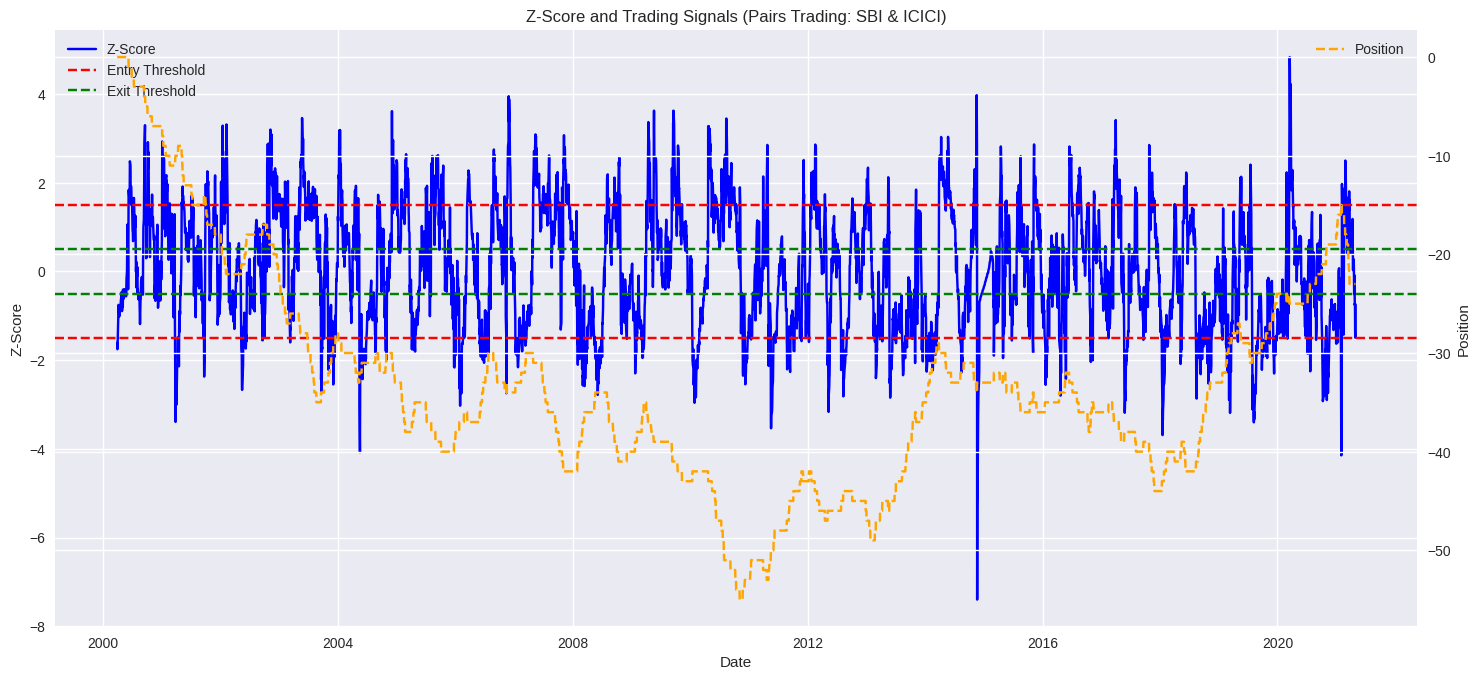

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sbin = pd.read_csv('/kaggle/input/dataset/SBIN.csv', parse_dates=['Date'], index_col='Date')
icici = pd.read_csv('/kaggle/input/dataset/ICICIBANK.csv', parse_dates=['Date'], index_col='Date')

data = pd.DataFrame()
data['SBI'] = sbin['Close']
data['ICICI'] = icici['Close']
data.dropna(inplace=True)  

# Calculating  the spread and z-score
lookback_period = 60
data['spread'] = data['SBI'] - data['ICICI']
data['spread_mean'] = data['spread'].rolling(window=lookback_period).mean()
data['spread_std'] = data['spread'].rolling(window=lookback_period).std()
data['z_score'] = (data['spread'] - data['spread_mean']) / data['spread_std']
data.dropna(inplace=True)

# Strategy Parameters
entry_threshold = 1.5
exit_threshold = 0.5
stop_loss = 2.5

# Initialization of the  signals and positions
data['signal'] = 0
data['position'] = 0

# Generation of the  signals
for i in range(1, len(data)):
    z_now = data['z_score'].iloc[i]
    z_prev = data['z_score'].iloc[i - 1]
    pos_prev = data['position'].iloc[i - 1]

    if z_now > entry_threshold and z_prev <= entry_threshold:
        data.at[data.index[i], 'signal'] = -1
    elif z_now < -entry_threshold and z_prev >= -entry_threshold:
        data.at[data.index[i], 'signal'] = 1
    elif z_now < exit_threshold and z_prev >= exit_threshold and pos_prev == -1:
        data.at[data.index[i], 'signal'] = 1
    elif z_now > -exit_threshold and z_prev <= -exit_threshold and pos_prev == 1:
        data.at[data.index[i], 'signal'] = -1
    elif pos_prev == -1 and abs(z_now) > stop_loss:
        data.at[data.index[i], 'signal'] = 1
    elif pos_prev == 1 and abs(z_now) > stop_loss:
        data.at[data.index[i], 'signal'] = -1

# Cumulative positions
data['position'] = data['signal'].cumsum()

# Plotting the  the z-score and positions
plt.figure(figsize=(15, 7))
plt.plot(data.index, data['z_score'], label='Z-Score', color='blue')
plt.axhline(entry_threshold, color='red', linestyle='--', label='Entry Threshold')
plt.axhline(-entry_threshold, color='red', linestyle='--')
plt.axhline(exit_threshold, color='green', linestyle='--', label='Exit Threshold')
plt.axhline(-exit_threshold, color='green', linestyle='--')
plt.title('Z-Score and Trading Signals (Pairs Trading: SBI & ICICI)')
plt.xlabel('Date')
plt.ylabel('Z-Score')
plt.legend(loc='upper left')

# Adding  position plot on secondary y-axis
plt.twinx()
plt.plot(data.index, data['position'], label='Position', color='orange', linestyle='--')
plt.ylabel('Position')
plt.legend(loc='upper right')

plt.grid(True)
plt.tight_layout()
plt.show()


Backtesting


Data Overview:
                SBI    ICICI
Date                        
2011-06-01  2329.20  1084.70
2011-06-02  2334.20  1048.90
2011-06-03  2312.50  1047.40
2011-06-06  2317.15  1058.05
2011-06-07  2320.10  1056.15

Data Summary:
               SBI        ICICI
count  2456.000000  2456.000000
mean    905.459324   604.151120
std     888.624354   383.985219
min     150.850000   183.000000
25%     258.737500   300.587500
50%     303.725000   394.600000
75%    1867.675000   930.737500
max    2945.750000  1794.100000
Hedge ratio calculated: 1.5519
Starting Pairs Trading Backtest
Initial Capital: ₹100,000.00
Lookback Period: 60 days
Entry Threshold: ±1.5
Exit Threshold: ±0.5
Stop Loss: ±2.5
--------------------------------------------------
2011-08-25: Entering SHORT SBI/LONG ICICI at z-score 1.95
2011-09-08: Closing position with PnL ₹3,120.68 (3.4%) after 14 days
2011-10-28: Entering LONG SBI/SHORT ICICI at z-score -2.40
2011-11-03: Closing position with PnL ₹3,254.09 (3.5%) after 6 day

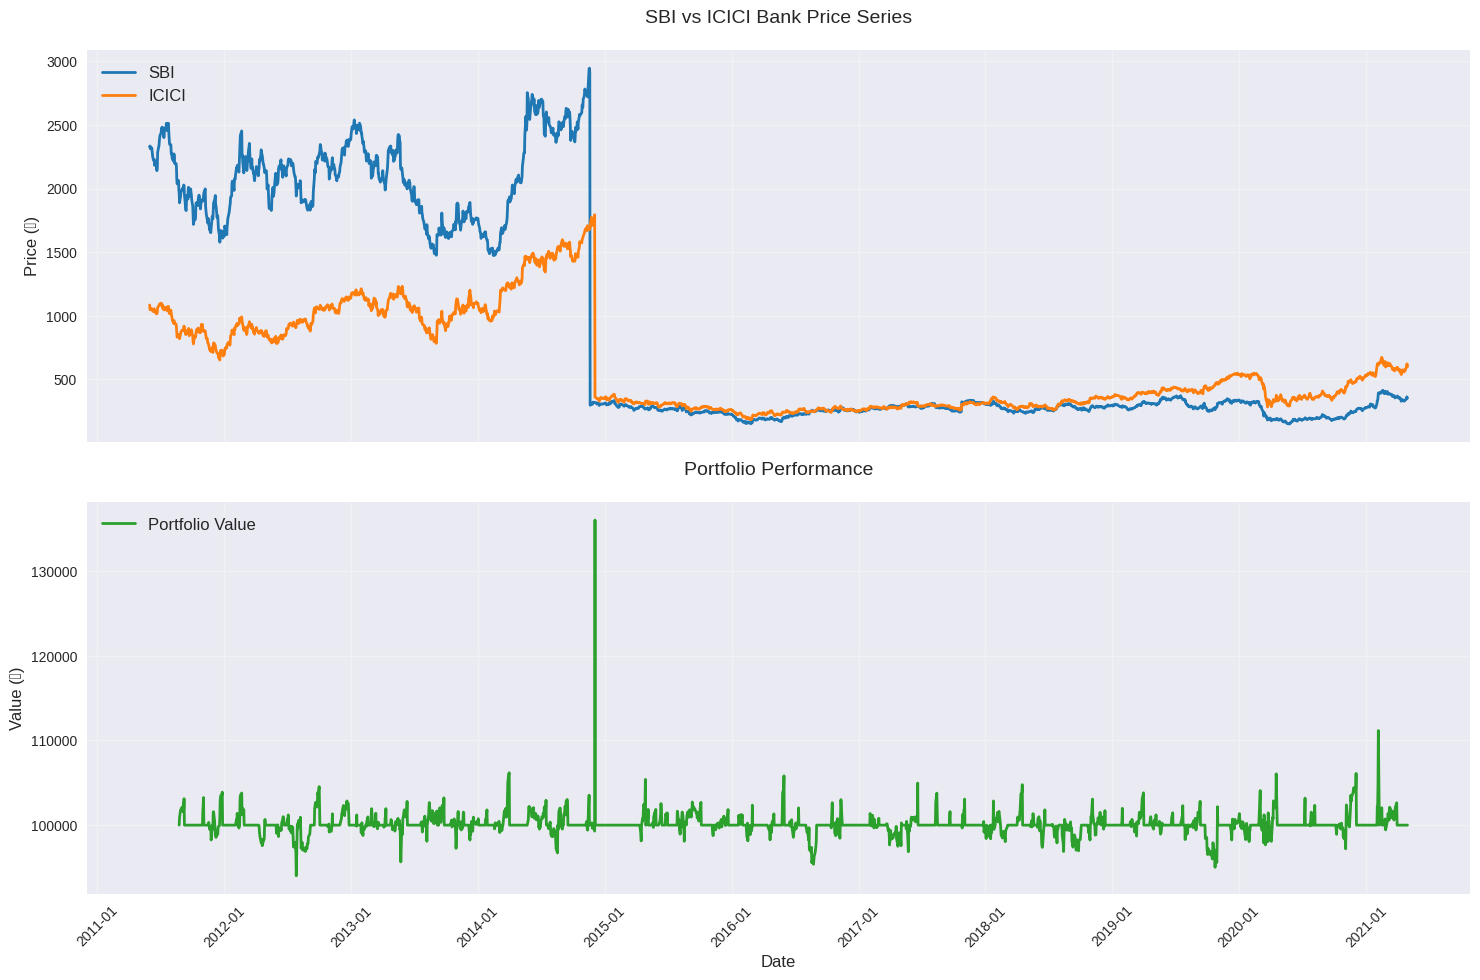

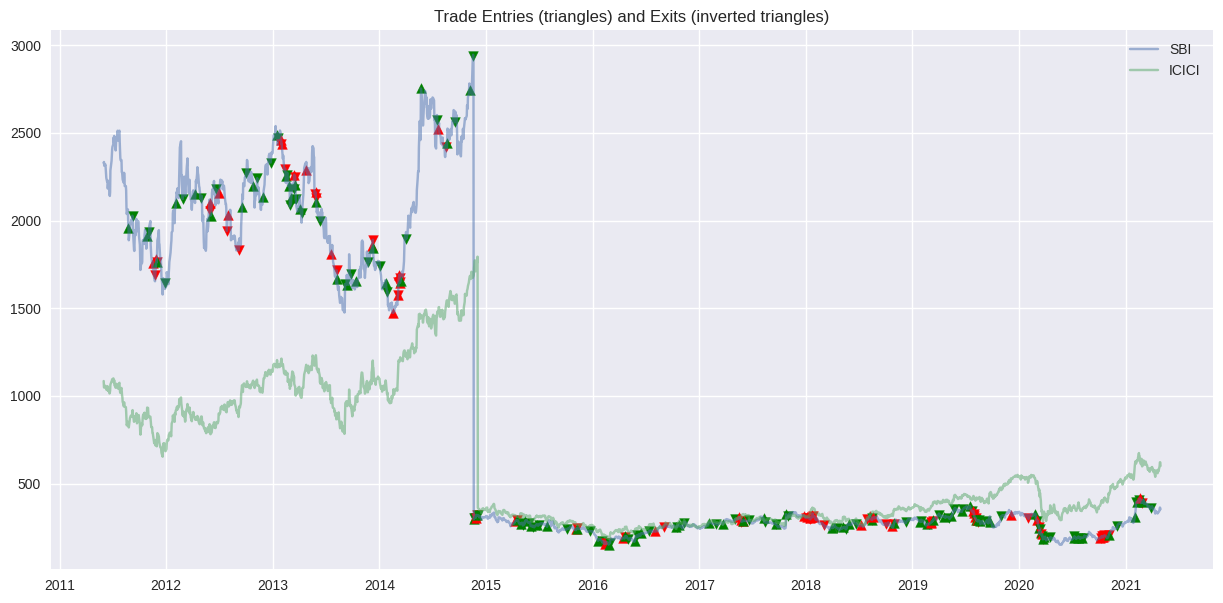

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.dates as mdates

class PairsTradingStrategy:
    
    def __init__(self, data, entry_threshold=1.5, exit_threshold=0.5, stop_loss=2.5, 
                 initial_capital=100000, lookback_period=60):
        self.data = data.copy()
        self.entry_threshold = entry_threshold
        self.exit_threshold = exit_threshold
        self.stop_loss = stop_loss
        self.initial_capital = initial_capital
        self.lookback_period = lookback_period
        
        # Verify of columns existence
        if not all(col in self.data.columns for col in ['SBI', 'ICICI']):
            raise ValueError("Data must contain 'SBI' and 'ICICI' columns")
            
        # Calculation spread if not provided
        if 'spread' not in self.data.columns:
            self._calculate_spread()
        
        # Initializationof  tracking variables
        self.portfolio_value = initial_capital
        self.cash = initial_capital
        self.position_sbi = 0
        self.position_icici = 0
        self.in_position = False
        self.entry_date = None
        self.entry_price_sbi = 0
        self.entry_price_icici = 0
        self.entry_z_score = 0
        
        # Results tracking
        self.trades = []
        self.portfolio_history = []
        self.signals = []
        
    def _calculate_spread(self):
        # Use log prices for cointegration
        log_sbi = np.log(self.data['SBI'])
        log_icici = np.log(self.data['ICICI'])
        
        # Calculationof  hedge ratio using OLS
        model = sm.OLS(log_sbi, sm.add_constant(log_icici))
        results = model.fit()
        hedge_ratio = results.params[1]
        
        self.data['spread'] = log_sbi - hedge_ratio * log_icici
        print(f"Hedge ratio calculated: {hedge_ratio:.4f}")
        
    def calculate_z_score(self):
        rolling_mean = self.data['spread'].rolling(window=self.lookback_period).mean()
        rolling_std = self.data['spread'].rolling(window=self.lookback_period).std()
        z_scores = (self.data['spread'] - rolling_mean) / rolling_std
        return z_scores
    
    def execute_trade(self, action, current_date, sbi_price, icici_price, z_score):
        trade_amount = self.portfolio_value * 0.45  
        if action == 'LONG_SBI_SHORT_ICICI':
            print(f"{current_date.date()}: Entering LONG SBI/SHORT ICICI at z-score {z_score:.2f}")
            self.position_sbi = trade_amount / sbi_price
            self.position_icici = -trade_amount / icici_price
            self.in_position = True
            self.entry_date = current_date
            self.entry_price_sbi = sbi_price
            self.entry_price_icici = icici_price
            self.entry_z_score = z_score
            
        elif action == 'SHORT_SBI_LONG_ICICI':
            print(f"{current_date.date()}: Entering SHORT SBI/LONG ICICI at z-score {z_score:.2f}")
            self.position_sbi = -trade_amount / sbi_price
            self.position_icici = trade_amount / icici_price
            self.in_position = True
            self.entry_date = current_date
            self.entry_price_sbi = sbi_price
            self.entry_price_icici = icici_price
            self.entry_z_score = z_score

                    # Calculating the  PnL

        elif action == 'CLOSE':
            sbi_pnl = self.position_sbi * (sbi_price - self.entry_price_sbi)
            icici_pnl = self.position_icici * (icici_price - self.entry_price_icici)
            total_pnl = sbi_pnl + icici_pnl
            trade_duration = (current_date - self.entry_date).days
            
            print(f"{current_date.date()}: Closing position with PnL ₹{total_pnl:,.2f} ({total_pnl/(2*trade_amount)*100:.1f}%) after {trade_duration} days")
            
            # Reset the  positions
            self.position_sbi = 0
            self.position_icici = 0
            self.in_position = False
            
            # Recording the  trade
            self.trades.append({
                'entry_date': self.entry_date,
                'exit_date': current_date,
                'entry_sbi': self.entry_price_sbi,
                'exit_sbi': sbi_price,
                'entry_icici': self.entry_price_icici,
                'exit_icici': icici_price,
                'pnl': total_pnl,
                'return_pct': total_pnl/(2*trade_amount)*100,
                'duration': trade_duration
            })
        
        # Recording the  signal
        self.signals.append({
            'date': current_date,
            'action': action,
            'z_score': z_score,
            'portfolio_value': self.portfolio_value
        })
    
    def update_portfolio_value(self, current_date, sbi_price, icici_price):
        current_sbi_value = self.position_sbi * sbi_price
        current_icici_value = self.position_icici * icici_price
        self.portfolio_value = self.cash + current_sbi_value + current_icici_value
        self.portfolio_history.append({
            'date': current_date,
            'value': self.portfolio_value
        })
    
    def run_backtest(self):
        print("="*50)
        print("Starting Pairs Trading Backtest")
        print("="*50)
        print(f"Initial Capital: ₹{self.initial_capital:,.2f}")
        print(f"Lookback Period: {self.lookback_period} days")
        print(f"Entry Threshold: ±{self.entry_threshold}")
        print(f"Exit Threshold: ±{self.exit_threshold}")
        print(f"Stop Loss: ±{self.stop_loss}")
        print("-"*50)
        
        # Calculation of  z-score
        z_scores = self.calculate_z_score()
        
        for i, (date, row) in enumerate(self.data.iterrows()):
            if i < self.lookback_period:  
                continue
                
            sbi_price = row['SBI']
            icici_price = row['ICICI']
            z_score = z_scores.iloc[i]
            
            # Updating the  portfolio value
            self.update_portfolio_value(date, sbi_price, icici_price)
            
            # Checking values for stop loss
            if self.in_position and abs(z_score) > self.stop_loss:
                self.execute_trade('CLOSE', date, sbi_price, icici_price, z_score)
                continue
                
            # Trading the  logic
            if not self.in_position:
                if z_score > self.entry_threshold:
                    self.execute_trade('SHORT_SBI_LONG_ICICI', date, sbi_price, icici_price, z_score)
                elif z_score < -self.entry_threshold:
                    self.execute_trade('LONG_SBI_SHORT_ICICI', date, sbi_price, icici_price, z_score)
            else:
                if (self.entry_z_score > 0 and z_score < self.exit_threshold) or \
                   (self.entry_z_score < 0 and z_score > -self.exit_threshold):
                    self.execute_trade('CLOSE', date, sbi_price, icici_price, z_score)
        
        # Finalisation of the  portfolio update
        self.update_portfolio_value(date, sbi_price, icici_price)
        
        print("\n" + "="*50)
        print("Backtest Complete!")
        print("="*50)
        print(f"Final Portfolio Value: ₹{self.portfolio_value:,.2f}")
        print(f"Total Return: {(self.portfolio_value/self.initial_capital-1)*100:.1f}%")
        print(f"Total Trades: {len(self.trades)}")
        
        if len(self.trades) > 0:
            trades_df = pd.DataFrame(self.trades)
            print("\nTrade Summary:")
            print(f"Average Return: {trades_df['return_pct'].mean():.1f}%")
            print(f"Win Rate: {len(trades_df[trades_df['pnl'] > 0])/len(trades_df)*100:.1f}%")
            print(f"Average Duration: {trades_df['duration'].mean():.1f} days")
        
        return pd.DataFrame(self.trades), pd.DataFrame(self.portfolio_history)

def plot_results(data, portfolio_history):
    """Enhanced visualization function with proper date handling"""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
    
    # Price Series Plot
    ax1.plot(data.index, data['SBI'], label='SBI', color='#1f77b4', linewidth=2)
    ax1.plot(data.index, data['ICICI'], label='ICICI', color='#ff7f0e', linewidth=2)
    ax1.set_ylabel('Price (₹)', fontsize=12)
    ax1.legend(fontsize=12, loc='upper left')
    ax1.set_title('SBI vs ICICI Bank Price Series', fontsize=14, pad=20)
    ax1.grid(True, alpha=0.3)
    
    # Portfolio Value Plot
    portfolio_df = pd.DataFrame(portfolio_history)
    portfolio_df['date'] = pd.to_datetime(portfolio_df['date'])  # Ensure datetime format
    portfolio_df = portfolio_df.set_index('date')
    
    ax2.plot(portfolio_df.index, portfolio_df['value'], 
             label='Portfolio Value', 
             color='#2ca02c', 
             linewidth=2)
    ax2.set_ylabel('Value (₹)', fontsize=12)
    ax2.set_xlabel('Date', fontsize=12)
    ax2.legend(fontsize=12, loc='upper left')
    ax2.set_title('Portfolio Performance', fontsize=14, pad=20)
    ax2.grid(True, alpha=0.3)
    
    # Format x-axis
    ax2.xaxis.set_major_locator(mdates.YearLocator())
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    
    # Rotate date labels
    plt.xticks(rotation=45)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()


# Loading the dataset
sbin = pd.read_csv('/kaggle/input/dataset/SBIN.csv', parse_dates=['Date'], index_col='Date')
icici = pd.read_csv('/kaggle/input/dataset/ICICIBANK.csv', parse_dates=['Date'], index_col='Date')

# Renaming  columns to identify stock
sbin.columns = [f"SBIN_{col}" for col in sbin.columns]
icici.columns = [f"ICICI_{col}" for col in icici.columns]

# Merge on Date and create SBI/ICICI columns
data = pd.merge(sbin, icici, left_index=True, right_index=True, how='inner')
data = data.dropna()

# Creation of  the required columns for the strategy
data['SBI'] = data['SBIN_Close']  
data['ICICI'] = data['ICICI_Close']  

# Verification  of  required data
print("Data Overview:")
print(data[['SBI', 'ICICI']].head())
print("\nData Summary:")
print(data[['SBI', 'ICICI']].describe())

#  backtest
strategy = PairsTradingStrategy(data)
trades, portfolio_history = strategy.run_backtest()

# Ploting  results with enhanced visualization
plot_results(data, portfolio_history)

if len(trades) > 0:
    plt.figure(figsize=(15, 7))
    plt.plot(data.index, data['SBI'], label='SBI', alpha=0.5)
    plt.plot(data.index, data['ICICI'], label='ICICI', alpha=0.5)
    
    # Plot entry and exit points
    trades_df = pd.DataFrame(strategy.trades)
    for _, trade in trades_df.iterrows():
        if trade['pnl'] > 0:
            color = 'green'
        else:
            color = 'red'
        plt.scatter(trade['entry_date'], data.loc[trade['entry_date']]['SBI'], color=color, marker='^')
        plt.scatter(trade['exit_date'], data.loc[trade['exit_date']]['SBI'], color=color, marker='v')
    
    plt.title('Trade Entries (triangles) and Exits (inverted triangles)')
    plt.legend()
    plt.show()

ML model 

Data shape before cleaning: (2456, 98)
Data shape after cleaning: (2378, 98)

Target variable distribution:
target
0    2065
1     313
Name: count, dtype: int64
Class proportion: 13.16%
Analyzing column types...
Data types:
float64    86
int64       8
object      4
Name: count, dtype: int64
Categorical columns (≤10 unique values): ['SBIN_Symbol', 'SBIN_Series', 'ICICI_Symbol', 'ICICI_Series']
String columns (>10 unique values, will be dropped): []
Encoded categorical column: SBIN_Symbol
Encoded categorical column: SBIN_Series
Encoded categorical column: ICICI_Symbol
Encoded categorical column: ICICI_Series
Checking for infinite/NaN values...

Final feature matrix shape: (2378, 87)
Final features: ['SBIN_Symbol', 'SBIN_Series', 'SBIN_Prev Close', 'SBIN_Open', 'SBIN_High', 'SBIN_Low', 'SBIN_Last', 'SBIN_VWAP', 'SBI_Volume', 'SBIN_Turnover']...
All features are numeric: True

Train set shape: (1902, 87)
Test set shape: (476, 87)
Train target distribution: target
0    1645
1     257
Name: 

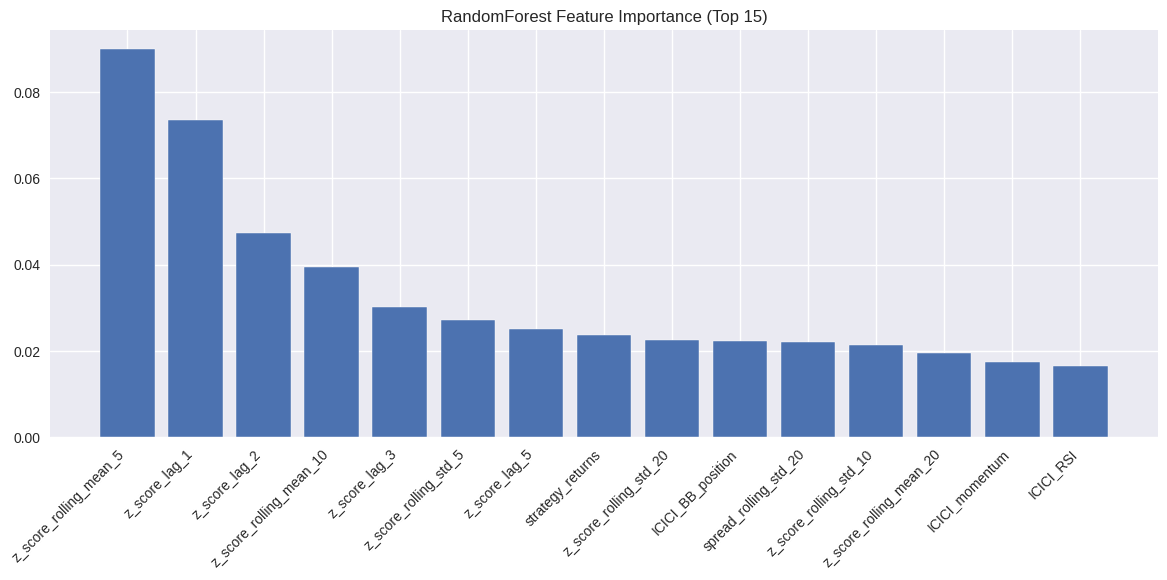


XGBoost - Top 10 Important Features:
1. z_score_lag_1: 0.0720
2. z_score_rolling_mean_5: 0.0443
3. strategy_returns: 0.0348
4. SBI_BB_middle: 0.0270
5. SBI_MA_50: 0.0265
6. returns_ICICI: 0.0260
7. ICICI_Prev Close: 0.0257
8. ICICI_Open: 0.0247
9. z_score_lag_3: 0.0234
10. ICICI_BB_lower: 0.0221


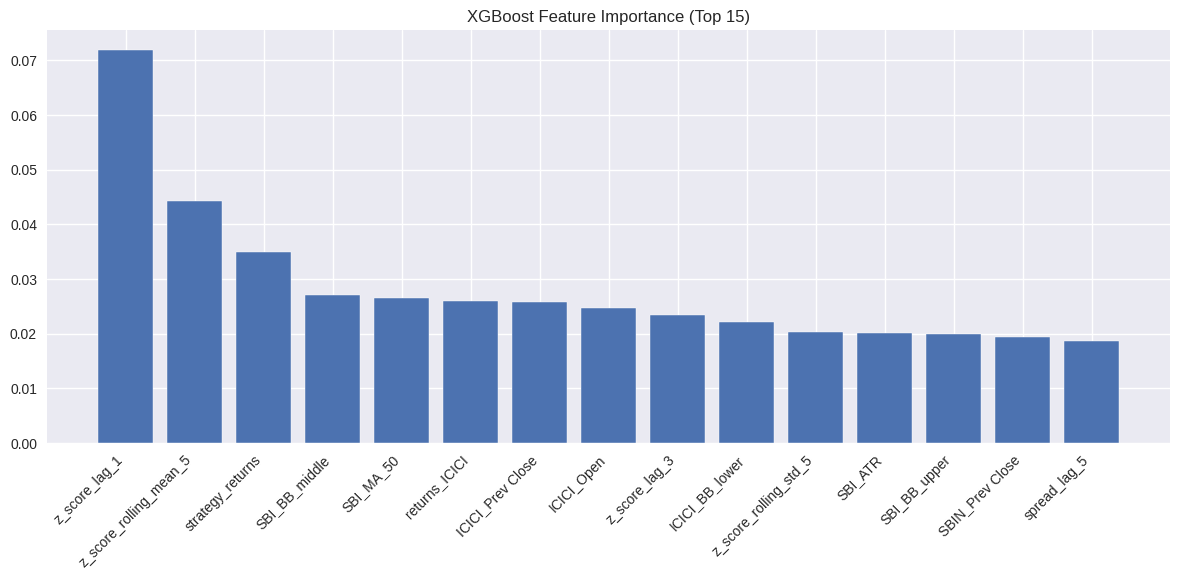


LightGBM - Top 10 Important Features:
1. z_score_lag_1: 199.0000
2. strategy_returns: 185.0000
3. z_score_rolling_mean_5: 111.0000
4. returns_ICICI: 86.0000
5. returns_SBI_lag_1: 71.0000
6. z_score_rolling_std_5: 69.0000
7. z_score_rolling_std_20: 68.0000
8. SBI_BB_position: 67.0000
9. z_score_rolling_std_10: 62.0000
10. returns_ICICI_lag_1: 60.0000


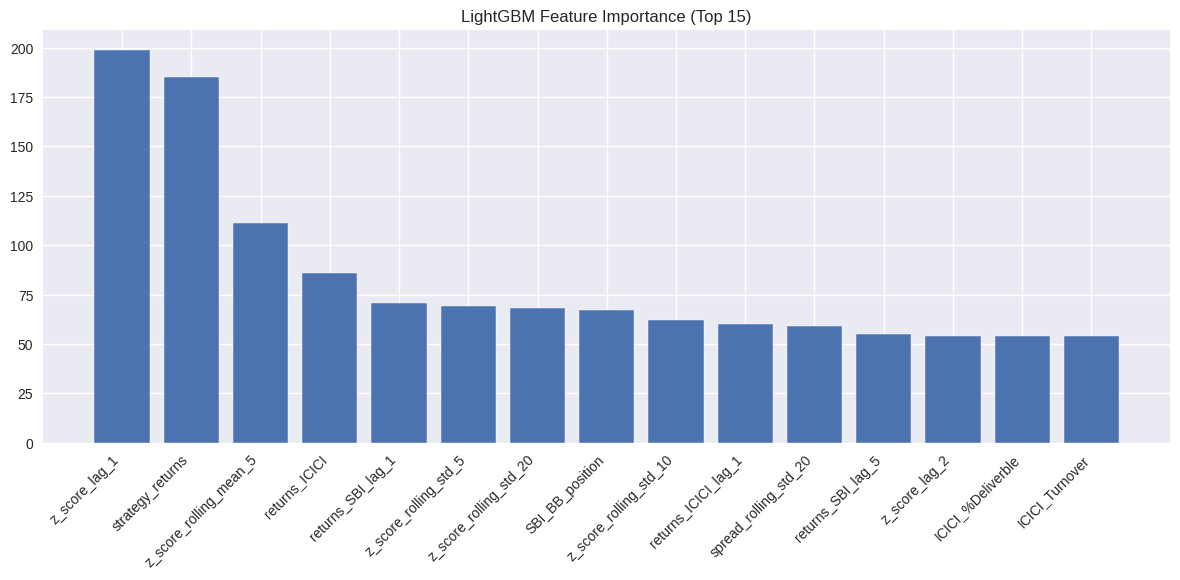


CatBoost_Simple - Top 10 Important Features:
1. z_score_lag_1: 26.3085
2. z_score_rolling_mean_5: 11.1654
3. z_score_lag_2: 8.5650
4. strategy_returns: 7.8406
5. returns_ICICI: 4.3351
6. z_score_rolling_mean_10: 4.0127
7. z_score_rolling_std_10: 3.6364
8. ICICI_BB_position: 3.5893
9. z_score_rolling_std_20: 2.5529
10. z_score_rolling_std_5: 2.1533


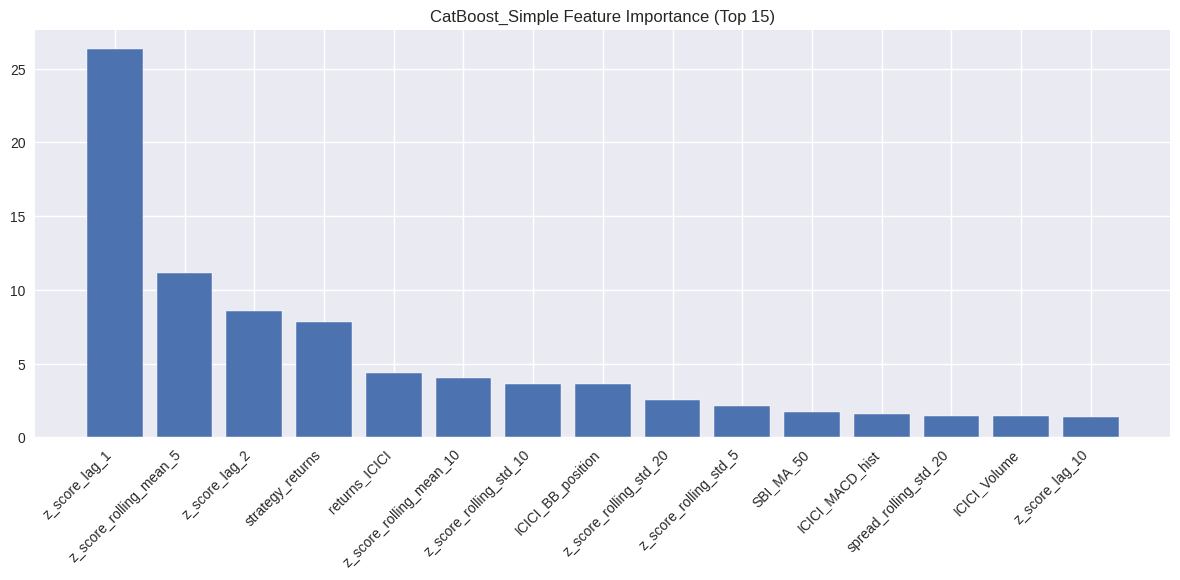


ENSEMBLE MODEL PERFORMANCE
Ensemble Performance:
Accuracy: 0.8697
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       420
           1       0.43      0.36      0.39        56

    accuracy                           0.87       476
   macro avg       0.68      0.65      0.66       476
weighted avg       0.86      0.87      0.86       476



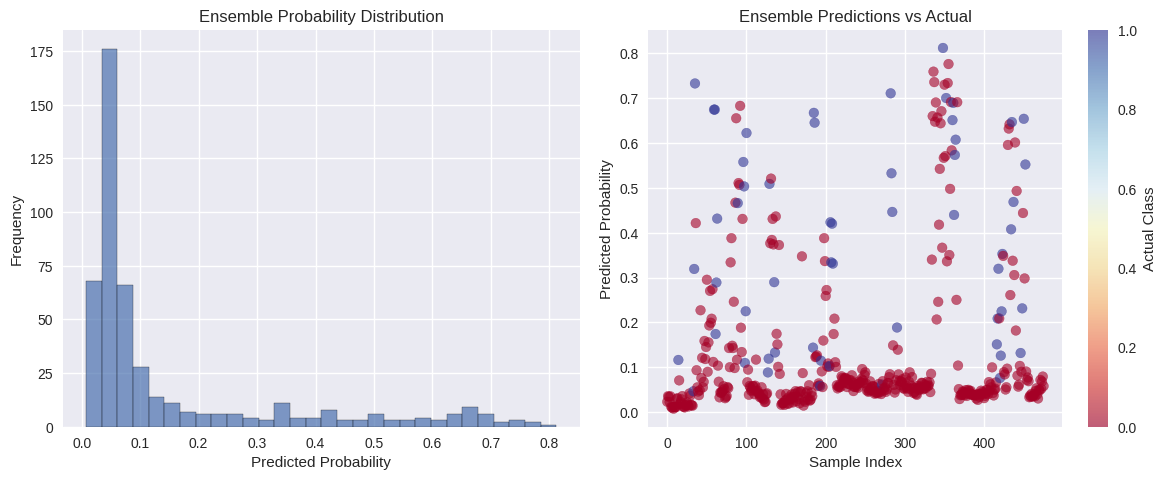


MODEL COMPARISON
          Model  Accuracy
   RandomForest  0.882353
        XGBoost  0.848739
       LightGBM  0.867647
CatBoost_Simple  0.878151
       Ensemble  0.869748


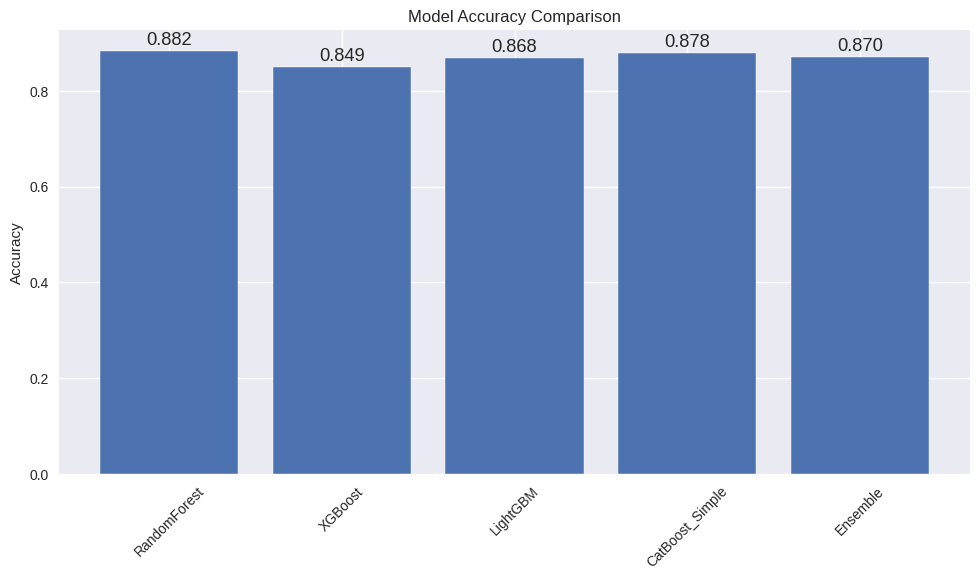


 Machine Learning analysis Completed 


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')

#RSI model 
def calculate_rsi(prices, window=14):
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

#MACD Model
def calculate_macd(prices, fast=12, slow=26, signal=9):
    ema_fast = prices.ewm(span=fast).mean()
    ema_slow = prices.ewm(span=slow).mean()
    macd = ema_fast - ema_slow
    macd_signal = macd.ewm(span=signal).mean()
    macd_hist = macd - macd_signal
    return macd, macd_signal, macd_hist

#Bollinger Bands
def calculate_bollinger_bands(prices, window=20, num_std=2):
    rolling_mean = prices.rolling(window).mean()
    rolling_std = prices.rolling(window).std()
    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)
    return upper_band, rolling_mean, lower_band

#ATR 
def calculate_atr(high, low, close, window=14):
    tr1 = high - low
    tr2 = abs(high - close.shift())
    tr3 = abs(low - close.shift())
    true_range = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)
    atr = true_range.rolling(window=window).mean()
    return atr

#  features and target
ml_data = data.copy()
ml_data['returns_SBI'] = ml_data['SBI'].pct_change()
ml_data['returns_ICICI'] = ml_data['ICICI'].pct_change()

# Technical indicators
ml_data['SBI_MA_10'] = ml_data['SBI'].rolling(10).mean()
ml_data['SBI_MA_50'] = ml_data['SBI'].rolling(50).mean()
ml_data['ICICI_MA_10'] = ml_data['ICICI'].rolling(10).mean()
ml_data['ICICI_MA_50'] = ml_data['ICICI'].rolling(50).mean()

# RSI indicators using custom function
ml_data['SBI_RSI'] = calculate_rsi(ml_data['SBI'], window=14)
ml_data['ICICI_RSI'] = calculate_rsi(ml_data['ICICI'], window=14)

# MACD indicators using custom function
ml_data['SBI_MACD'], ml_data['SBI_MACD_signal'], ml_data['SBI_MACD_hist'] = calculate_macd(ml_data['SBI'])
ml_data['ICICI_MACD'], ml_data['ICICI_MACD_signal'], ml_data['ICICI_MACD_hist'] = calculate_macd(ml_data['ICICI'])

# Bollinger Bands using custom function
ml_data['SBI_BB_upper'], ml_data['SBI_BB_middle'], ml_data['SBI_BB_lower'] = calculate_bollinger_bands(ml_data['SBI'])
ml_data['ICICI_BB_upper'], ml_data['ICICI_BB_middle'], ml_data['ICICI_BB_lower'] = calculate_bollinger_bands(ml_data['ICICI'])

# ATR indicators using custom function by using Close price as proxy for High/Low Identification 
ml_data['SBI_ATR'] = calculate_atr(ml_data['SBI'], ml_data['SBI'], ml_data['SBI'], window=14)
ml_data['ICICI_ATR'] = calculate_atr(ml_data['ICICI'], ml_data['ICICI'], ml_data['ICICI'], window=14)

# Additional momentum indicators
ml_data['SBI_momentum'] = ml_data['SBI'].pct_change(periods=10)
ml_data['ICICI_momentum'] = ml_data['ICICI'].pct_change(periods=10)

# Price position relative to Bollinger Bands
ml_data['SBI_BB_position'] = (ml_data['SBI'] - ml_data['SBI_BB_lower']) / (ml_data['SBI_BB_upper'] - ml_data['SBI_BB_lower'])
ml_data['ICICI_BB_position'] = (ml_data['ICICI'] - ml_data['ICICI_BB_lower']) / (ml_data['ICICI_BB_upper'] - ml_data['ICICI_BB_lower'])

# Moving average convergence/divergence signals
ml_data['SBI_MA_signal'] = np.where(ml_data['SBI_MA_10'] > ml_data['SBI_MA_50'], 1, -1)
ml_data['ICICI_MA_signal'] = np.where(ml_data['ICICI_MA_10'] > ml_data['ICICI_MA_50'], 1, -1)

# Lagged features
for lag in [1, 2, 3, 5, 10]:
    ml_data[f'z_score_lag_{lag}'] = ml_data['z_score'].shift(lag)
    ml_data[f'returns_SBI_lag_{lag}'] = ml_data['returns_SBI'].shift(lag)
    ml_data[f'returns_ICICI_lag_{lag}'] = ml_data['returns_ICICI'].shift(lag)
    ml_data[f'spread_lag_{lag}'] = ml_data['spread'].shift(lag)

# Rolling statistics features
for window in [5, 10, 20]:
    ml_data[f'z_score_rolling_mean_{window}'] = ml_data['z_score'].rolling(window).mean()
    ml_data[f'z_score_rolling_std_{window}'] = ml_data['z_score'].rolling(window).std()
    ml_data[f'spread_rolling_mean_{window}'] = ml_data['spread'].rolling(window).mean()
    ml_data[f'spread_rolling_std_{window}'] = ml_data['spread'].rolling(window).std()


ml_data['target'] = np.where(
    ((ml_data['z_score'] > 1.5) & (ml_data['z_score'].shift(-5) < 1.5)) | 
    ((ml_data['z_score'] < -1.5) & (ml_data['z_score'].shift(-5) > -1.5)),
    1, 0
)

#  target variations for different strategies
ml_data['target_3_days'] = np.where(
    ((ml_data['z_score'] > 1.5) & (ml_data['z_score'].shift(-3) < 1.5)) | 
    ((ml_data['z_score'] < -1.5) & (ml_data['z_score'].shift(-3) > -1.5)),
    1, 0
)

ml_data['target_10_days'] = np.where(
    ((ml_data['z_score'] > 1.5) & (ml_data['z_score'].shift(-10) < 1.5)) | 
    ((ml_data['z_score'] < -1.5) & (ml_data['z_score'].shift(-10) > -1.5)),
    1, 0
)

# Creation of the  signal and position columns 
if 'signal' not in ml_data.columns:
    ml_data['signal'] = np.where(ml_data['z_score'] > 1.5, -1, 
                        np.where(ml_data['z_score'] < -1.5, 1, 0))

if 'position' not in ml_data.columns:
    ml_data['position'] = ml_data['signal'].shift(1)

# Dropping the  NA values
print(f"Data shape before cleaning: {ml_data.shape}")
ml_data = ml_data.dropna()
print(f"Data shape after cleaning: {ml_data.shape}")

# Checking  class distribution
print(f"\nTarget variable distribution:")
print(ml_data['target'].value_counts())
print(f"Class proportion: {ml_data['target'].mean():.2%}")

# Identification and handle different column types
print("Analyzing column types...")
print(f"Data types:\n{ml_data.dtypes.value_counts()}")

# Identify categorical/string columns that need to be handled
categorical_columns = []
string_columns = []
for col in ml_data.columns:
    if ml_data[col].dtype == 'object':
        unique_values = ml_data[col].nunique()
        if unique_values <= 10:  # Treat as categorical
            categorical_columns.append(col)
        else:  # Treat as string to be dropped
            string_columns.append(col)

print(f"Categorical columns (≤10 unique values): {categorical_columns}")
print(f"String columns (>10 unique values, will be dropped): {string_columns}")

# Preparation of the  features for modeling
columns_to_drop = ['SBI', 'ICICI', 'log_SBI', 'log_ICICI', 'spread', 'z_score', 
                   'signal', 'position', 'target', 'target_3_days', 'target_10_days'] + string_columns

existing_columns_to_drop = [col for col in columns_to_drop if col in ml_data.columns]
X_raw = ml_data.drop(existing_columns_to_drop, axis=1)

# Handling categorical columns by encoding them
X = X_raw.copy()
if categorical_columns:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    for col in categorical_columns:
        if col in X.columns:
            X[col] = le.fit_transform(X[col].astype(str))
            print(f"Encoded categorical column: {col}")

# All columns are numeric
numeric_columns = []
for col in X.columns:
    if pd.api.types.is_numeric_dtype(X[col]):
        numeric_columns.append(col)
    else:
        print(f"Warning: Non-numeric column {col} with dtype {X[col].dtype} will be dropped")

X = X[numeric_columns]

# Handle any remaining non-finite values
print(f"Checking for infinite/NaN values...")
inf_cols = []
for col in X.columns:
    if not np.isfinite(X[col]).all():
        inf_cols.append(col)
        X[col] = X[col].replace([np.inf, -np.inf], np.nan)
        X[col] = X[col].fillna(X[col].median())

if inf_cols:
    print(f"Fixed infinite values in columns: {inf_cols}")

y = ml_data['target']

print(f"\nFinal feature matrix shape: {X.shape}")
print(f"Final features: {list(X.columns[:10])}{'...' if len(X.columns) > 10 else ''}")
print(f"All features are numeric: {all(pd.api.types.is_numeric_dtype(X[col]) for col in X.columns)}")

# Splitting the  data by using time series split to maintain temporal order
split_index = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

print(f"\nTrain set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Train target distribution: {y_train.value_counts()}")
print(f"Test target distribution: {y_test.value_counts()}")

# Training models with proper error handling and data validation
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss', verbosity=0),
    'LightGBM': LGBMClassifier(random_state=42, verbose=-1, class_weight='balanced'),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42, class_weights='Balanced')
}

results = {}
print("\n" + "="*50)
print("TRAINING MACHINE LEARNING MODELS")
print("="*50)

for name, model in models.items():
    print(f"\nTraining {name}...")
    try:
        # Additional data validation for specific models
        X_train_model = X_train.copy()
        X_test_model = X_test.copy()
        
        # Ensuring  no infinite or NaN values
        if not np.isfinite(X_train_model.values).all():
            print(f"Warning: Found non-finite values in training data for {name}")
            X_train_model = X_train_model.fillna(0).replace([np.inf, -np.inf], 0)
        
        if not np.isfinite(X_test_model.values).all():
            print(f"Warning: Found non-finite values in test data for {name}")
            X_test_model = X_test_model.fillna(0).replace([np.inf, -np.inf], 0)
        
        # Training  the model
        model.fit(X_train_model, y_train)
        preds = model.predict(X_test_model)
        proba = model.predict_proba(X_test_model)[:, 1]
        
        results[name] = {
            'model': model,
            'accuracy': accuracy_score(y_test, preds),
            'report': classification_report(y_test, preds),
            'proba': proba,
            'predictions': preds
        }
        
        print(f" {name} trained successfully!")
        print(f"{name} Accuracy: {accuracy_score(y_test, preds):.4f}")
        print(f"{name} Classification Report:")
        print(classification_report(y_test, preds))
        
    except Exception as e:
        print(f" Error training {name}: {str(e)}")
        # simplified model parameters
        try:
            print(f"Trying {name} with simplified parameters...")
            if name == 'XGBoost':
                simple_model = XGBClassifier(random_state=42, eval_metric='logloss', verbosity=0, 
                                           n_estimators=50, max_depth=3)
            elif name == 'LightGBM':
                simple_model = LGBMClassifier(random_state=42, verbose=-1, n_estimators=50, max_depth=3)
            elif name == 'CatBoost':
                simple_model = CatBoostClassifier(verbose=0, random_state=42, iterations=50, depth=3)
            else:
                simple_model = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=5)
            
            simple_model.fit(X_train_model, y_train)
            preds = simple_model.predict(X_test_model)
            proba = simple_model.predict_proba(X_test_model)[:, 1]
            
            results[f"{name}_Simple"] = {
                'model': simple_model,
                'accuracy': accuracy_score(y_test, preds),
                'report': classification_report(y_test, preds),
                'proba': proba,
                'predictions': preds
            }
            
            print(f" {name}_Simple trained successfully!")
            print(f"{name}_Simple Accuracy: {accuracy_score(y_test, preds):.4f}")
            
        except Exception as e2:
            print(f" Even simplified {name} failed: {str(e2)}")
            continue

# Feature importance analysis
print("\n" + "="*50)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*50)

for name, result in results.items():
    model = result['model']
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        
        # Showcasing the  top  features
        print(f"\n{name} - Top 10 Important Features:")
        for i in range(min(10, len(indices))):
            print(f"{i+1}. {X_train.columns[indices[i]]}: {importances[indices[i]]:.4f}")
        
        # Plotting the  feature importance
        plt.figure(figsize=(12, 6))
        plt.title(f"{name} Feature Importance (Top 15)")
        top_features = min(15, len(indices))
        plt.bar(range(top_features), importances[indices[:top_features]], align='center')
        plt.xticks(range(top_features), X_train.columns[indices[:top_features]], rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# Ensemble predictions
if len(results) > 1:
    print("\n" + "="*50)
    print("ENSEMBLE MODEL PERFORMANCE")
    print("="*50)
    
    ensemble_proba = np.mean([results[model]['proba'] for model in results], axis=0)
    ensemble_preds = (ensemble_proba > 0.5).astype(int)
    
    print("Ensemble Performance:")
    print(f"Accuracy: {accuracy_score(y_test, ensemble_preds):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, ensemble_preds))
    
    # Plot ensemble probability distribution
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(ensemble_proba, bins=30, alpha=0.7, edgecolor='black')
    plt.title('Ensemble Probability Distribution')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    plt.scatter(range(len(ensemble_proba)), ensemble_proba, alpha=0.6, c=y_test, cmap='RdYlBu')
    plt.title('Ensemble Predictions vs Actual')
    plt.xlabel('Sample Index')
    plt.ylabel('Predicted Probability')
    plt.colorbar(label='Actual Class')
    
    plt.tight_layout()
    plt.show()

# Model comparison
if len(results) > 1:
    print("\n" + "="*50)
    print("MODEL COMPARISON")
    print("="*50)
    
    comparison_df = pd.DataFrame({
        'Model': list(results.keys()) + ['Ensemble'],
        'Accuracy': [results[model]['accuracy'] for model in results] + [accuracy_score(y_test, ensemble_preds)]
    })
    
    print(comparison_df.to_string(index=False))
    
    # Plot model comparison
    plt.figure(figsize=(10, 6))
    plt.bar(comparison_df['Model'], comparison_df['Accuracy'])
    plt.title('Model Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    for i, v in enumerate(comparison_df['Accuracy']):
        plt.text(i, v + 0.005, f'{v:.3f}', ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

print("\n Machine Learning analysis Completed ")

Performance Analysis 

In [2]:
!pip install quantstats


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.1 MB/s eta 0:00:00


Cointegration p-value: 0.4973
Hedge Ratio: 1.5519
ADF Statistic: -2.0561
p-value: 0.2625
Critical Values:
	1%: -3.4330
	5%: -2.8627
	10%: -2.5674


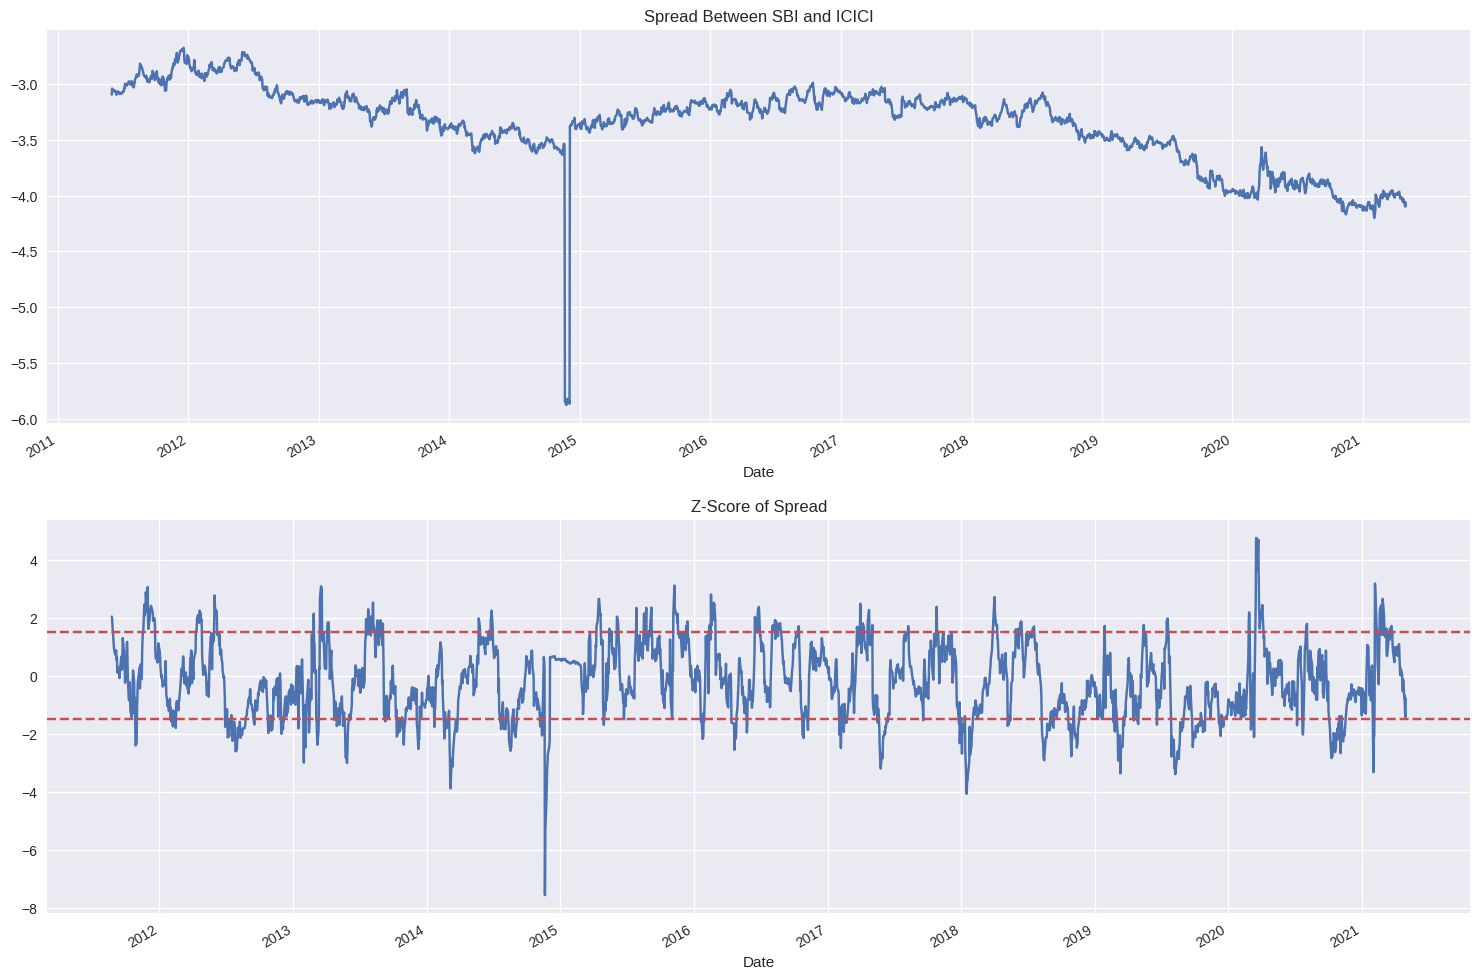


 PERFORMANCE METRICS
Total Return: -97.74%
Annualized Return: -11.05%
Volatility: 63.53%
Sharpe Ratio: -0.17
Max Drawdown: -98.58%
Win Rate: 49.74%
Profit Factor: 0.95
Calmar Ratio: -0.11


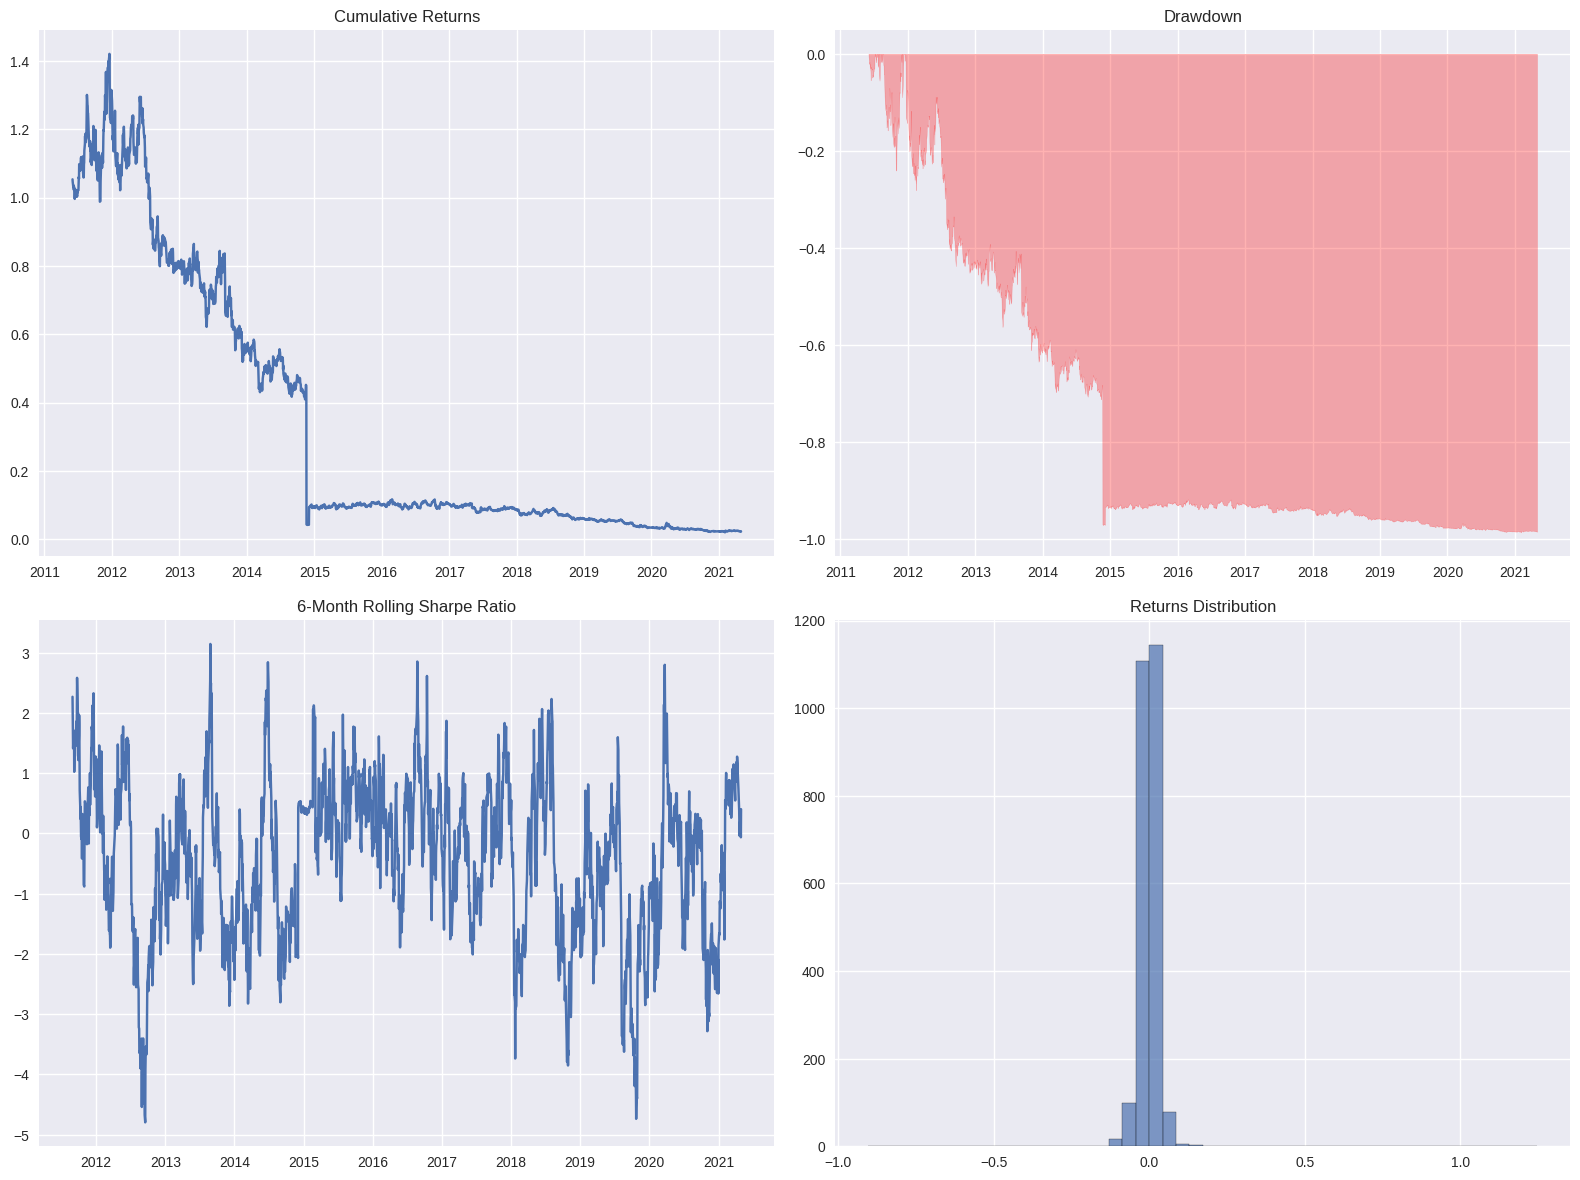

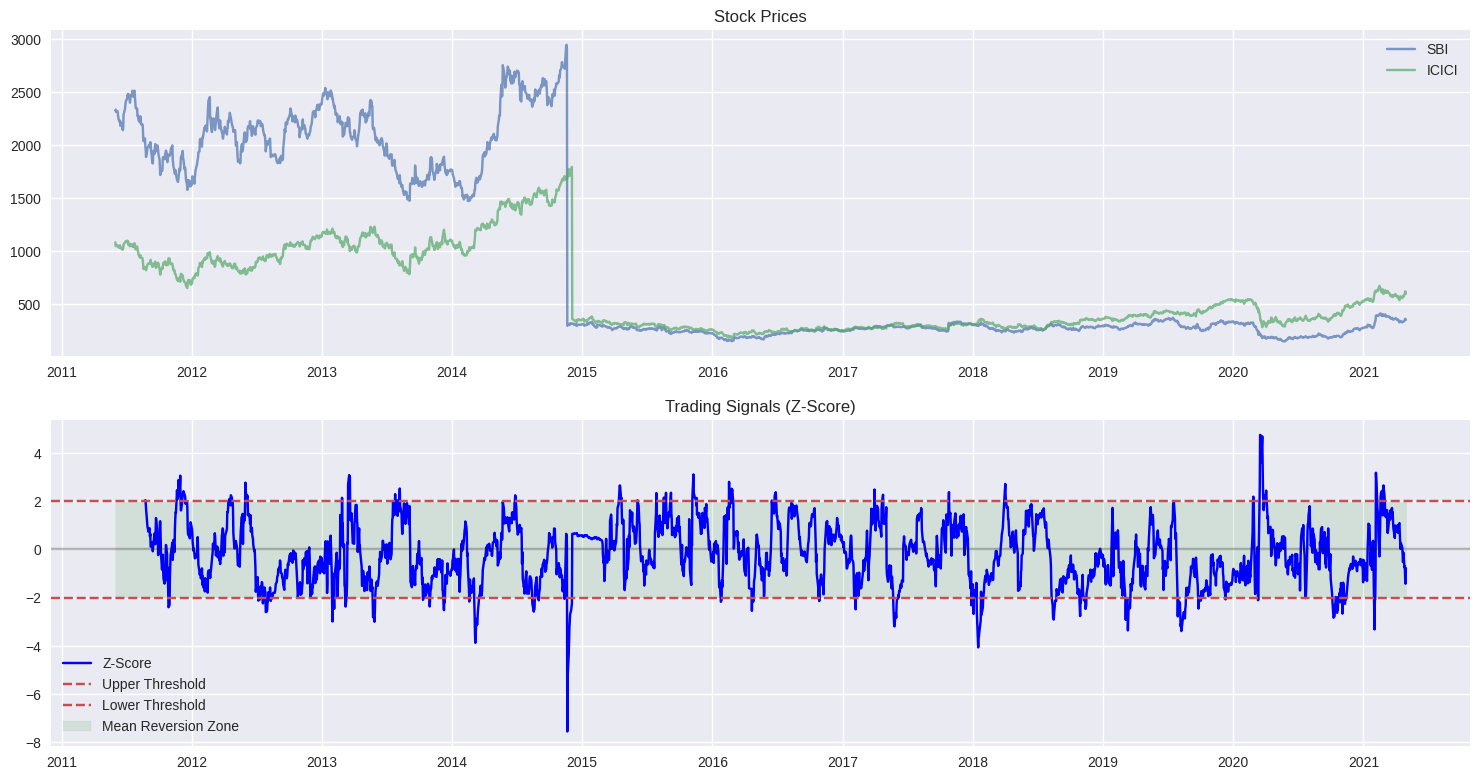

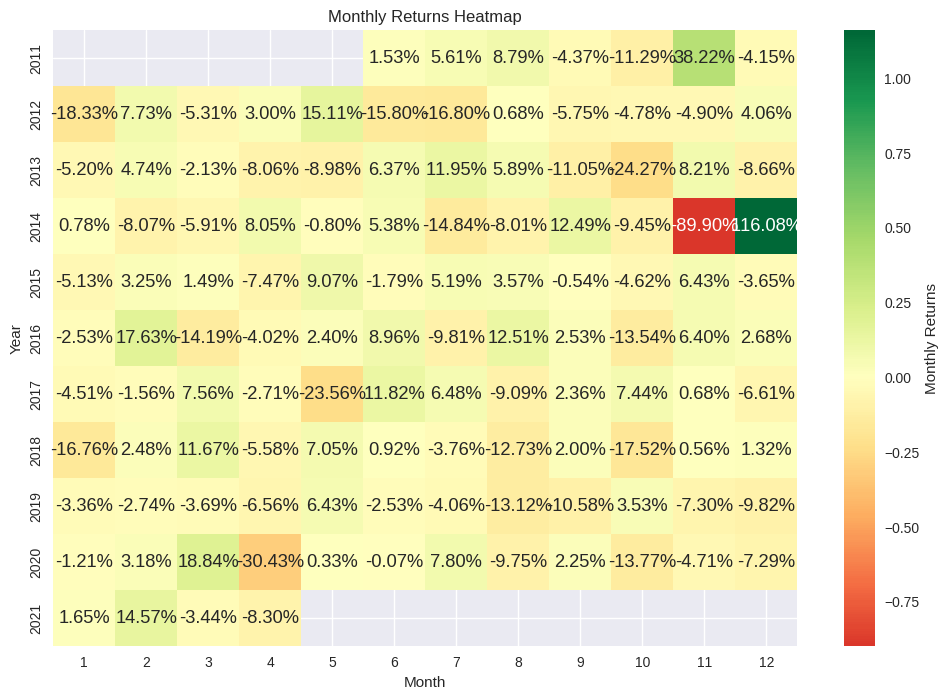


 RISK METRICS
VaR (95%): -4.20%
CVaR (95%): -6.60%
Sortino Ratio: -0.23

Analysis completed successfully!


In [43]:

from statsmodels.tsa.stattools import coint, adfuller
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#laoding the data 
sbin = pd.read_csv('/kaggle/input/dataset/SBIN.csv', parse_dates=['Date'], index_col='Date')
icici = pd.read_csv('/kaggle/input/dataset/ICICIBANK.csv', parse_dates=['Date'], index_col='Date')

sbin.columns = [f"SBIN_{col}" for col in sbin.columns]
icici.columns = [f"ICICI_{col}" for col in icici.columns]

data = pd.merge(sbin, icici, left_index=True, right_index=True, how='inner')
data = data.dropna()

data.to_csv('/kaggle/working/nse_pairs_merged.csv')

#  Column Mapping to Your Dataset
column_map = {
    'SBIN_Close': 'SBI',
    'ICICI_Close': 'ICICI',
    'SBIN_Volume': 'SBI_Volume',
    'ICICI_Volume': 'ICICI_Volume'
}
data.rename(columns=column_map, inplace=True)

required_cols = ['SBI', 'ICICI']
missing_cols = [col for col in required_cols if col not in data.columns]
if missing_cols:
    raise KeyError(f"Missing columns in dataset: {missing_cols}")

#  Log Prices
data['log_SBI'] = np.log(data['SBI'])
data['log_ICICI'] = np.log(data['ICICI'])

# Cointegration Test
score, pvalue, _ = coint(data['log_SBI'], data['log_ICICI'])
print(f"Cointegration p-value: {pvalue:.4f}")

# Estimate Hedge Ratio (OLS) using statsmodels.regression.linear_model
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
model = OLS(data['log_SBI'], sm.add_constant(data['log_ICICI']))
results = model.fit()
hedge_ratio = results.params[1]
print(f"Hedge Ratio: {hedge_ratio:.4f}")

#  Calculate Spread
data['spread'] = data['log_SBI'] - hedge_ratio * data['log_ICICI']

#  ADF Test on Spread
adf_result = adfuller(data['spread'].dropna())
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"\t{key}: {value:.4f}")

#  Z-Score Normalization
mean_spread = data['spread'].rolling(window=60).mean()
std_spread = data['spread'].rolling(window=60).std()
data['z_score'] = (data['spread'] - mean_spread) / std_spread

#  Plot Spread and Z-Score
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
data['spread'].plot()
plt.title('Spread Between SBI and ICICI')
plt.subplot(2, 1, 2)
data['z_score'].plot()
plt.axhline(1.5, color='r', linestyle='--')
plt.axhline(-1.5, color='r', linestyle='--')
plt.title('Z-Score of Spread')
plt.tight_layout()
plt.show()

#  Define Strategy Returns
data['strategy_returns'] = data['SBI'].pct_change() - hedge_ratio * data['ICICI'].pct_change()
returns = data['strategy_returns'].dropna()



def calculate_performance_metrics(returns):
    returns_clean = returns.dropna()
    
    # Basic metrics
    total_return = (1 + returns_clean).cumprod().iloc[-1] - 1
    annualized_return = (1 + returns_clean.mean()) ** 252 - 1
    volatility = returns_clean.std() * np.sqrt(252)
    sharpe_ratio = annualized_return / volatility if volatility != 0 else 0
    
    # Drawdown calculation
    cumulative = (1 + returns_clean).cumprod()
    peak = cumulative.expanding().max()
    drawdown = (cumulative - peak) / peak
    max_drawdown = drawdown.min()
    
    # Win rate and profit factor
    win_rate = (returns_clean > 0).mean()
    positive_returns = returns_clean[returns_clean > 0]
    negative_returns = returns_clean[returns_clean < 0]
    profit_factor = positive_returns.sum() / abs(negative_returns.sum()) if len(negative_returns) > 0 else np.inf
    
    # Calmar ratio
    calmar_ratio = annualized_return / abs(max_drawdown) if max_drawdown != 0 else 0
    
    return {
        'Total Return': total_return,
        'Annualized Return': annualized_return,
        'Volatility': volatility,
        'Sharpe Ratio': sharpe_ratio,
        'Max Drawdown': max_drawdown,
        'Win Rate': win_rate,
        'Profit Factor': profit_factor,
        'Calmar Ratio': calmar_ratio
    }

# Calculating  and displaying the  metrics
metrics = calculate_performance_metrics(returns)
print("\n" + "="*50)
print(" PERFORMANCE METRICS")
print("="*50)
for metric, value in metrics.items():
    if metric in ['Total Return', 'Annualized Return', 'Volatility', 'Max Drawdown', 'Win Rate']:
        print(f"{metric}: {value:.2%}")
    else:
        print(f"{metric}: {value:.2f}")

# Enhanced Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Cumulative returns
cumulative_returns = (1 + returns).cumprod()
axes[0,0].plot(cumulative_returns.index, cumulative_returns.values)
axes[0,0].set_title('Cumulative Returns')
axes[0,0].grid(True)

# Drawdown plot
cumulative = (1 + returns.dropna()).cumprod()
peak = cumulative.expanding().max()
drawdown = (cumulative - peak) / peak
axes[0,1].fill_between(drawdown.index, drawdown.values, 0, alpha=0.3, color='red')
axes[0,1].set_title('Drawdown')
axes[0,1].grid(True)

# Rolling Sharpe Ratio
rolling_sharpe = (returns.rolling(63).mean() / returns.rolling(63).std() * np.sqrt(252))
axes[1,0].plot(rolling_sharpe.index, rolling_sharpe.values)
axes[1,0].set_title('6-Month Rolling Sharpe Ratio')
axes[1,0].grid(True)

# Returns distribution
axes[1,1].hist(returns.dropna(), bins=50, alpha=0.7, edgecolor='black')
axes[1,1].set_title('Returns Distribution')
axes[1,1].grid(True)

plt.tight_layout()
plt.show()

# Trading Signals Visualization
plt.figure(figsize=(15, 8))

# Plot prices
plt.subplot(2, 1, 1)
plt.plot(data.index, data['SBI'], label='SBI', alpha=0.7)
plt.plot(data.index, data['ICICI'], label='ICICI', alpha=0.7)
plt.title('Stock Prices')
plt.legend()
plt.grid(True)

# Ploting the  z-score with trading signals
plt.subplot(2, 1, 2)
plt.plot(data.index, data['z_score'], label='Z-Score', color='blue')
plt.axhline(2, color='r', linestyle='--', label='Upper Threshold')
plt.axhline(-2, color='r', linestyle='--', label='Lower Threshold')
plt.axhline(0, color='k', linestyle='-', alpha=0.3)
plt.fill_between(data.index, -2, 2, alpha=0.1, color='green', label='Mean Reversion Zone')
plt.title('Trading Signals (Z-Score)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Monthly Returns Heatmap
def create_monthly_returns_heatmap(returns):
    monthly_returns = returns.resample('M').apply(lambda x: (1 + x).prod() - 1)
    monthly_returns.index = pd.to_datetime(monthly_returns.index)
    
    # Creating  year-month pivot table
    monthly_returns_df = pd.DataFrame({
        'Year': monthly_returns.index.year,
        'Month': monthly_returns.index.month,
        'Returns': monthly_returns.values
    })
    
    pivot_table = monthly_returns_df.pivot(index='Year', columns='Month', values='Returns')
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, fmt='.2%', cmap='RdYlGn', center=0, 
                cbar_kws={'label': 'Monthly Returns'})
    plt.title('Monthly Returns Heatmap')
    plt.xlabel('Month')
    plt.ylabel('Year')
    plt.show()

# Create monthly returns heatmap 
if len(returns) > 30:
    create_monthly_returns_heatmap(returns)

# 13. Risk Metrics
def calculate_risk_metrics(returns):
    returns_clean = returns.dropna()
    
    # VaR and CVaR
    var_95 = np.percentile(returns_clean, 5)
    cvar_95 = returns_clean[returns_clean <= var_95].mean()
    
    # Sortino ratio
    downside_returns = returns_clean[returns_clean < 0]
    downside_std = downside_returns.std() * np.sqrt(252)
    annualized_return = (1 + returns_clean.mean()) ** 252 - 1
    sortino_ratio = annualized_return / downside_std if downside_std != 0 else 0
    
    return {
        'VaR (95%)': var_95,
        'CVaR (95%)': cvar_95,
        'Sortino Ratio': sortino_ratio
    }

risk_metrics = calculate_risk_metrics(returns)
print("\n" + "="*50)
print(" RISK METRICS")
print("="*50)
for metric, value in risk_metrics.items():
    if 'VaR' in metric or 'CVaR' in metric:
        print(f"{metric}: {value:.2%}")
    else:
        print(f"{metric}: {value:.2f}")

print("\nAnalysis completed successfully!")
